In [1]:
# from sklearn.datasets import fetch_california_housing
# from tqdm import tqdm

# data = fetch_california_housing()
# print(data.feature_names)
 
# X, y = data.data, data.target

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [12]:
import torch.nn as nn

# Define the model
model = nn.Sequential(
    nn.Linear(15, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

In [13]:
import torch.nn as nn
import torch.optim as optim

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [14]:
import copy
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split

# # train-test split of the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
# X_train = torch.tensor(X_train, dtype=torch.float32)
# y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
# X_test = torch.tensor(X_test, dtype=torch.float32)
# y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

train_data = np.load('data/Dhaka/train.npy')
test_data = np.load('data/Dhaka/test.npy')

selected_idx = np.array(list(set(range(19)) - set(list(range(3))+[12])))


X_train = train_data[:,selected_idx]
X_test = test_data[:,selected_idx]
y_train = train_data[:,12]
y_test = test_data[:,12]



X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [15]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

torch.Size([5845, 15]) torch.Size([5845, 1]) torch.Size([1461, 15]) torch.Size([1461, 1])


In [16]:


# training parameters
n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

# training loop
for epoch in range(n_epochs):
    print(epoch)
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            print(loss)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# restore model and return best accuracy
model.load_state_dict(best_weights)

0
tensor(63.4853, grad_fn=<MseLossBackward0>)
tensor(55.0648, grad_fn=<MseLossBackward0>)
tensor(93.5645, grad_fn=<MseLossBackward0>)
tensor(64.9712, grad_fn=<MseLossBackward0>)
tensor(51.9832, grad_fn=<MseLossBackward0>)
tensor(205.7961, grad_fn=<MseLossBackward0>)
tensor(190.3361, grad_fn=<MseLossBackward0>)
tensor(205.1014, grad_fn=<MseLossBackward0>)
tensor(133.5697, grad_fn=<MseLossBackward0>)
tensor(238.7234, grad_fn=<MseLossBackward0>)
tensor(55.2507, grad_fn=<MseLossBackward0>)
tensor(168.7086, grad_fn=<MseLossBackward0>)
tensor(1113.7925, grad_fn=<MseLossBackward0>)
tensor(886.7944, grad_fn=<MseLossBackward0>)
tensor(148.7956, grad_fn=<MseLossBackward0>)
tensor(107.2320, grad_fn=<MseLossBackward0>)
tensor(239.4142, grad_fn=<MseLossBackward0>)
tensor(196.0917, grad_fn=<MseLossBackward0>)
tensor(144.9056, grad_fn=<MseLossBackward0>)
tensor(138.2476, grad_fn=<MseLossBackward0>)
tensor(156.6999, grad_fn=<MseLossBackward0>)
tensor(282.2619, grad_fn=<MseLossBackward0>)
tensor(376.51

tensor(61.5701, grad_fn=<MseLossBackward0>)
tensor(81.6381, grad_fn=<MseLossBackward0>)
tensor(68.1354, grad_fn=<MseLossBackward0>)
tensor(1518.4978, grad_fn=<MseLossBackward0>)
tensor(7.5991, grad_fn=<MseLossBackward0>)
tensor(5.8437, grad_fn=<MseLossBackward0>)
tensor(0.3978, grad_fn=<MseLossBackward0>)
tensor(2.6190, grad_fn=<MseLossBackward0>)
tensor(252.2677, grad_fn=<MseLossBackward0>)
tensor(0.1902, grad_fn=<MseLossBackward0>)
tensor(0.2124, grad_fn=<MseLossBackward0>)
tensor(0.1362, grad_fn=<MseLossBackward0>)
tensor(0.1566, grad_fn=<MseLossBackward0>)
tensor(0.1704, grad_fn=<MseLossBackward0>)
tensor(0.2376, grad_fn=<MseLossBackward0>)
tensor(0.1436, grad_fn=<MseLossBackward0>)
tensor(0.2307, grad_fn=<MseLossBackward0>)
tensor(62.1439, grad_fn=<MseLossBackward0>)
tensor(6.8576, grad_fn=<MseLossBackward0>)
tensor(106.1022, grad_fn=<MseLossBackward0>)
tensor(51.3366, grad_fn=<MseLossBackward0>)
tensor(173.9731, grad_fn=<MseLossBackward0>)
tensor(107.7958, grad_fn=<MseLossBackwar

tensor(5.9598, grad_fn=<MseLossBackward0>)
tensor(1.0160, grad_fn=<MseLossBackward0>)
tensor(24.8714, grad_fn=<MseLossBackward0>)
tensor(0.5845, grad_fn=<MseLossBackward0>)
tensor(0.7147, grad_fn=<MseLossBackward0>)
tensor(54.5961, grad_fn=<MseLossBackward0>)
tensor(0.7432, grad_fn=<MseLossBackward0>)
tensor(0.8090, grad_fn=<MseLossBackward0>)
tensor(0.4903, grad_fn=<MseLossBackward0>)
tensor(0.6488, grad_fn=<MseLossBackward0>)
tensor(71.3605, grad_fn=<MseLossBackward0>)
tensor(53.0276, grad_fn=<MseLossBackward0>)
tensor(2.7579, grad_fn=<MseLossBackward0>)
tensor(132.5007, grad_fn=<MseLossBackward0>)
tensor(58.5533, grad_fn=<MseLossBackward0>)
tensor(492.2531, grad_fn=<MseLossBackward0>)
tensor(98.2324, grad_fn=<MseLossBackward0>)
tensor(429.3927, grad_fn=<MseLossBackward0>)
tensor(654.5433, grad_fn=<MseLossBackward0>)
tensor(105.0761, grad_fn=<MseLossBackward0>)
tensor(269.3492, grad_fn=<MseLossBackward0>)
tensor(2366.4341, grad_fn=<MseLossBackward0>)
tensor(444.1099, grad_fn=<MseLoss

tensor(2.1448, grad_fn=<MseLossBackward0>)
tensor(1.9814, grad_fn=<MseLossBackward0>)
tensor(1.8222, grad_fn=<MseLossBackward0>)
tensor(1.8723, grad_fn=<MseLossBackward0>)
tensor(108.1857, grad_fn=<MseLossBackward0>)
tensor(197.4930, grad_fn=<MseLossBackward0>)
tensor(33.2627, grad_fn=<MseLossBackward0>)
tensor(179.3497, grad_fn=<MseLossBackward0>)
tensor(40.5879, grad_fn=<MseLossBackward0>)
tensor(1226.9390, grad_fn=<MseLossBackward0>)
tensor(139.3708, grad_fn=<MseLossBackward0>)
tensor(84.9649, grad_fn=<MseLossBackward0>)
tensor(665.5018, grad_fn=<MseLossBackward0>)
tensor(1553.5652, grad_fn=<MseLossBackward0>)
tensor(73.1525, grad_fn=<MseLossBackward0>)
tensor(166.9901, grad_fn=<MseLossBackward0>)
tensor(113.1512, grad_fn=<MseLossBackward0>)
tensor(272.6880, grad_fn=<MseLossBackward0>)
tensor(17.7755, grad_fn=<MseLossBackward0>)
tensor(3.8772, grad_fn=<MseLossBackward0>)
tensor(1373.9254, grad_fn=<MseLossBackward0>)
tensor(2.6971, grad_fn=<MseLossBackward0>)
tensor(1.8724, grad_fn=<

tensor(129.1104, grad_fn=<MseLossBackward0>)
tensor(17.1050, grad_fn=<MseLossBackward0>)
tensor(28.3592, grad_fn=<MseLossBackward0>)
tensor(97.3672, grad_fn=<MseLossBackward0>)
tensor(37.1353, grad_fn=<MseLossBackward0>)
tensor(2.4376, grad_fn=<MseLossBackward0>)
tensor(368.1552, grad_fn=<MseLossBackward0>)
tensor(511.5784, grad_fn=<MseLossBackward0>)
tensor(1480.2544, grad_fn=<MseLossBackward0>)
tensor(767.3530, grad_fn=<MseLossBackward0>)
tensor(424.9965, grad_fn=<MseLossBackward0>)
tensor(234.7868, grad_fn=<MseLossBackward0>)
tensor(239.8165, grad_fn=<MseLossBackward0>)
tensor(7.7487, grad_fn=<MseLossBackward0>)
tensor(307.3834, grad_fn=<MseLossBackward0>)
tensor(88.5394, grad_fn=<MseLossBackward0>)
tensor(7.4588, grad_fn=<MseLossBackward0>)
tensor(4.5027, grad_fn=<MseLossBackward0>)
tensor(5.7890, grad_fn=<MseLossBackward0>)
tensor(5.0723, grad_fn=<MseLossBackward0>)
tensor(5.0877, grad_fn=<MseLossBackward0>)
tensor(4.7924, grad_fn=<MseLossBackward0>)
tensor(4.8101, grad_fn=<MseLos

tensor(26.0654, grad_fn=<MseLossBackward0>)
tensor(247.6105, grad_fn=<MseLossBackward0>)
tensor(2267.2114, grad_fn=<MseLossBackward0>)
tensor(13.5306, grad_fn=<MseLossBackward0>)
tensor(11.9654, grad_fn=<MseLossBackward0>)
tensor(13.6585, grad_fn=<MseLossBackward0>)
tensor(15.9918, grad_fn=<MseLossBackward0>)
tensor(14.0743, grad_fn=<MseLossBackward0>)
tensor(11.1341, grad_fn=<MseLossBackward0>)
2
tensor(14.4652, grad_fn=<MseLossBackward0>)
tensor(12.0345, grad_fn=<MseLossBackward0>)
tensor(28.6746, grad_fn=<MseLossBackward0>)
tensor(10.7053, grad_fn=<MseLossBackward0>)
tensor(12.3135, grad_fn=<MseLossBackward0>)
tensor(52.8358, grad_fn=<MseLossBackward0>)
tensor(51.6013, grad_fn=<MseLossBackward0>)
tensor(67.4400, grad_fn=<MseLossBackward0>)
tensor(21.6926, grad_fn=<MseLossBackward0>)
tensor(70.0864, grad_fn=<MseLossBackward0>)
tensor(6.6957, grad_fn=<MseLossBackward0>)
tensor(22.5629, grad_fn=<MseLossBackward0>)
tensor(655.8016, grad_fn=<MseLossBackward0>)
tensor(455.7472, grad_fn=<M

tensor(199.2437, grad_fn=<MseLossBackward0>)
tensor(3.8711, grad_fn=<MseLossBackward0>)
tensor(266.5898, grad_fn=<MseLossBackward0>)
tensor(74.7862, grad_fn=<MseLossBackward0>)
tensor(13.5870, grad_fn=<MseLossBackward0>)
tensor(17.0422, grad_fn=<MseLossBackward0>)
tensor(18.3729, grad_fn=<MseLossBackward0>)
tensor(18.0652, grad_fn=<MseLossBackward0>)
tensor(17.7050, grad_fn=<MseLossBackward0>)
tensor(16.3646, grad_fn=<MseLossBackward0>)
tensor(14.7791, grad_fn=<MseLossBackward0>)
tensor(15.5888, grad_fn=<MseLossBackward0>)
tensor(11.9005, grad_fn=<MseLossBackward0>)
tensor(15.9005, grad_fn=<MseLossBackward0>)
tensor(13.4302, grad_fn=<MseLossBackward0>)
tensor(46.5422, grad_fn=<MseLossBackward0>)
tensor(15.0292, grad_fn=<MseLossBackward0>)
tensor(17.1567, grad_fn=<MseLossBackward0>)
tensor(23.6867, grad_fn=<MseLossBackward0>)
tensor(17.2688, grad_fn=<MseLossBackward0>)
tensor(116.5875, grad_fn=<MseLossBackward0>)
tensor(2211.0051, grad_fn=<MseLossBackward0>)
tensor(487.0151, grad_fn=<Ms

tensor(585.2169, grad_fn=<MseLossBackward0>)
tensor(386.2856, grad_fn=<MseLossBackward0>)
tensor(9.9653, grad_fn=<MseLossBackward0>)
tensor(11.9571, grad_fn=<MseLossBackward0>)
tensor(41.6194, grad_fn=<MseLossBackward0>)
tensor(31.6497, grad_fn=<MseLossBackward0>)
tensor(6.2936, grad_fn=<MseLossBackward0>)
tensor(11.8245, grad_fn=<MseLossBackward0>)
tensor(21.1871, grad_fn=<MseLossBackward0>)
tensor(60.9404, grad_fn=<MseLossBackward0>)
tensor(155.9616, grad_fn=<MseLossBackward0>)
tensor(8.0463, grad_fn=<MseLossBackward0>)
tensor(19.3841, grad_fn=<MseLossBackward0>)
tensor(17.0292, grad_fn=<MseLossBackward0>)
tensor(19.8734, grad_fn=<MseLossBackward0>)
tensor(25.8848, grad_fn=<MseLossBackward0>)
tensor(53.4320, grad_fn=<MseLossBackward0>)
tensor(7.7541, grad_fn=<MseLossBackward0>)
tensor(19.2965, grad_fn=<MseLossBackward0>)
tensor(9.5623, grad_fn=<MseLossBackward0>)
tensor(14.6156, grad_fn=<MseLossBackward0>)
tensor(16.8277, grad_fn=<MseLossBackward0>)
tensor(14.7225, grad_fn=<MseLossBa

tensor(38.0788, grad_fn=<MseLossBackward0>)
tensor(178.8139, grad_fn=<MseLossBackward0>)
tensor(9.4371, grad_fn=<MseLossBackward0>)
tensor(20.3812, grad_fn=<MseLossBackward0>)
tensor(20.6722, grad_fn=<MseLossBackward0>)
tensor(24.7081, grad_fn=<MseLossBackward0>)
tensor(29.1031, grad_fn=<MseLossBackward0>)
tensor(13.0989, grad_fn=<MseLossBackward0>)
tensor(11.5808, grad_fn=<MseLossBackward0>)
tensor(8.1612, grad_fn=<MseLossBackward0>)
tensor(10.7150, grad_fn=<MseLossBackward0>)
tensor(7.7510, grad_fn=<MseLossBackward0>)
tensor(4.7925, grad_fn=<MseLossBackward0>)
tensor(8.9956, grad_fn=<MseLossBackward0>)
tensor(8.9687, grad_fn=<MseLossBackward0>)
tensor(11.9268, grad_fn=<MseLossBackward0>)
tensor(15.6433, grad_fn=<MseLossBackward0>)
tensor(96.9393, grad_fn=<MseLossBackward0>)
tensor(18.8707, grad_fn=<MseLossBackward0>)
tensor(53.7229, grad_fn=<MseLossBackward0>)
tensor(9.9180, grad_fn=<MseLossBackward0>)
tensor(21.2698, grad_fn=<MseLossBackward0>)
tensor(20.3997, grad_fn=<MseLossBackwa

tensor(9.4897, grad_fn=<MseLossBackward0>)
tensor(21.1141, grad_fn=<MseLossBackward0>)
tensor(12.0093, grad_fn=<MseLossBackward0>)
tensor(51.9138, grad_fn=<MseLossBackward0>)
tensor(37.0452, grad_fn=<MseLossBackward0>)
tensor(12.9767, grad_fn=<MseLossBackward0>)
tensor(93.1424, grad_fn=<MseLossBackward0>)
tensor(41.1346, grad_fn=<MseLossBackward0>)
tensor(411.9776, grad_fn=<MseLossBackward0>)
tensor(70.0863, grad_fn=<MseLossBackward0>)
tensor(289.9167, grad_fn=<MseLossBackward0>)
tensor(460.7659, grad_fn=<MseLossBackward0>)
tensor(32.7134, grad_fn=<MseLossBackward0>)
tensor(159.1506, grad_fn=<MseLossBackward0>)
tensor(1797.4285, grad_fn=<MseLossBackward0>)
tensor(249.1841, grad_fn=<MseLossBackward0>)
tensor(368.4161, grad_fn=<MseLossBackward0>)
tensor(1327.5620, grad_fn=<MseLossBackward0>)
tensor(34.4265, grad_fn=<MseLossBackward0>)
tensor(81.9711, grad_fn=<MseLossBackward0>)
tensor(86.1647, grad_fn=<MseLossBackward0>)
tensor(96.1379, grad_fn=<MseLossBackward0>)
tensor(171.3540, grad_f

tensor(21.2436, grad_fn=<MseLossBackward0>)
tensor(21.2150, grad_fn=<MseLossBackward0>)
tensor(14.5930, grad_fn=<MseLossBackward0>)
tensor(16.4281, grad_fn=<MseLossBackward0>)
tensor(13.4545, grad_fn=<MseLossBackward0>)
tensor(28.1539, grad_fn=<MseLossBackward0>)
tensor(5.9794, grad_fn=<MseLossBackward0>)
tensor(12.2890, grad_fn=<MseLossBackward0>)
tensor(16.0972, grad_fn=<MseLossBackward0>)
tensor(21.1248, grad_fn=<MseLossBackward0>)
tensor(9.5790, grad_fn=<MseLossBackward0>)
tensor(10.6439, grad_fn=<MseLossBackward0>)
tensor(16.1989, grad_fn=<MseLossBackward0>)
tensor(18.6034, grad_fn=<MseLossBackward0>)
tensor(82.4130, grad_fn=<MseLossBackward0>)
tensor(129.9518, grad_fn=<MseLossBackward0>)
tensor(41.3815, grad_fn=<MseLossBackward0>)
tensor(93.5298, grad_fn=<MseLossBackward0>)
tensor(28.2159, grad_fn=<MseLossBackward0>)
tensor(958.9826, grad_fn=<MseLossBackward0>)
tensor(68.7831, grad_fn=<MseLossBackward0>)
tensor(31.4275, grad_fn=<MseLossBackward0>)
tensor(479.2486, grad_fn=<MseLos

tensor(8.3798, grad_fn=<MseLossBackward0>)
tensor(11.1592, grad_fn=<MseLossBackward0>)
tensor(20.1433, grad_fn=<MseLossBackward0>)
tensor(55.7441, grad_fn=<MseLossBackward0>)
tensor(372.7867, grad_fn=<MseLossBackward0>)
tensor(107.5978, grad_fn=<MseLossBackward0>)
tensor(54.1815, grad_fn=<MseLossBackward0>)
tensor(28.9691, grad_fn=<MseLossBackward0>)
tensor(327.8959, grad_fn=<MseLossBackward0>)
tensor(23.7699, grad_fn=<MseLossBackward0>)
tensor(36.6125, grad_fn=<MseLossBackward0>)
tensor(145.7375, grad_fn=<MseLossBackward0>)
tensor(25.5061, grad_fn=<MseLossBackward0>)
tensor(16.5128, grad_fn=<MseLossBackward0>)
tensor(58.6209, grad_fn=<MseLossBackward0>)
tensor(69.4909, grad_fn=<MseLossBackward0>)
tensor(28.5943, grad_fn=<MseLossBackward0>)
tensor(28.4422, grad_fn=<MseLossBackward0>)
tensor(27.9159, grad_fn=<MseLossBackward0>)
tensor(9.1542, grad_fn=<MseLossBackward0>)
tensor(9.1678, grad_fn=<MseLossBackward0>)
tensor(7.5467, grad_fn=<MseLossBackward0>)
tensor(16.7654, grad_fn=<MseLoss

tensor(284.0999, grad_fn=<MseLossBackward0>)
tensor(154.6917, grad_fn=<MseLossBackward0>)
tensor(337.5494, grad_fn=<MseLossBackward0>)
tensor(126.4333, grad_fn=<MseLossBackward0>)
tensor(92.6093, grad_fn=<MseLossBackward0>)
tensor(103.1711, grad_fn=<MseLossBackward0>)
tensor(75.7666, grad_fn=<MseLossBackward0>)
tensor(36.1576, grad_fn=<MseLossBackward0>)
tensor(27.6361, grad_fn=<MseLossBackward0>)
tensor(103.7772, grad_fn=<MseLossBackward0>)
tensor(19.1370, grad_fn=<MseLossBackward0>)
tensor(17.6160, grad_fn=<MseLossBackward0>)
tensor(173.4066, grad_fn=<MseLossBackward0>)
tensor(47.6737, grad_fn=<MseLossBackward0>)
tensor(56.1143, grad_fn=<MseLossBackward0>)
tensor(112.3460, grad_fn=<MseLossBackward0>)
tensor(26.9347, grad_fn=<MseLossBackward0>)
tensor(20.7551, grad_fn=<MseLossBackward0>)
tensor(15.4882, grad_fn=<MseLossBackward0>)
tensor(19.3354, grad_fn=<MseLossBackward0>)
tensor(35.1312, grad_fn=<MseLossBackward0>)
tensor(35.8386, grad_fn=<MseLossBackward0>)
tensor(12.5543, grad_fn=

tensor(26.5555, grad_fn=<MseLossBackward0>)
tensor(938.3043, grad_fn=<MseLossBackward0>)
tensor(333.1384, grad_fn=<MseLossBackward0>)
tensor(166.6723, grad_fn=<MseLossBackward0>)
tensor(137.3656, grad_fn=<MseLossBackward0>)
tensor(23.0717, grad_fn=<MseLossBackward0>)
tensor(22.7461, grad_fn=<MseLossBackward0>)
tensor(32.3286, grad_fn=<MseLossBackward0>)
tensor(7.7018, grad_fn=<MseLossBackward0>)
tensor(26.1053, grad_fn=<MseLossBackward0>)
tensor(45.9960, grad_fn=<MseLossBackward0>)
tensor(10.7470, grad_fn=<MseLossBackward0>)
tensor(33.5159, grad_fn=<MseLossBackward0>)
tensor(26.5284, grad_fn=<MseLossBackward0>)
tensor(4.7767, grad_fn=<MseLossBackward0>)
tensor(7.7596, grad_fn=<MseLossBackward0>)
tensor(6.7321, grad_fn=<MseLossBackward0>)
tensor(9.4522, grad_fn=<MseLossBackward0>)
tensor(13.5002, grad_fn=<MseLossBackward0>)
tensor(10.5252, grad_fn=<MseLossBackward0>)
tensor(12.6997, grad_fn=<MseLossBackward0>)
tensor(28.4835, grad_fn=<MseLossBackward0>)
tensor(25.0584, grad_fn=<MseLossB

tensor(21.8397, grad_fn=<MseLossBackward0>)
tensor(3.1906, grad_fn=<MseLossBackward0>)
tensor(14.9089, grad_fn=<MseLossBackward0>)
tensor(8.5394, grad_fn=<MseLossBackward0>)
tensor(6.2954, grad_fn=<MseLossBackward0>)
tensor(15.8505, grad_fn=<MseLossBackward0>)
tensor(21.1681, grad_fn=<MseLossBackward0>)
tensor(16.1818, grad_fn=<MseLossBackward0>)
tensor(322.3900, grad_fn=<MseLossBackward0>)
tensor(49.7399, grad_fn=<MseLossBackward0>)
tensor(125.5626, grad_fn=<MseLossBackward0>)
tensor(1102.6030, grad_fn=<MseLossBackward0>)
tensor(64.6487, grad_fn=<MseLossBackward0>)
tensor(157.7564, grad_fn=<MseLossBackward0>)
tensor(68.0173, grad_fn=<MseLossBackward0>)
tensor(566.5135, grad_fn=<MseLossBackward0>)
tensor(1218.2672, grad_fn=<MseLossBackward0>)
tensor(496.4099, grad_fn=<MseLossBackward0>)
tensor(757.1078, grad_fn=<MseLossBackward0>)
tensor(405.9520, grad_fn=<MseLossBackward0>)
tensor(2111.4475, grad_fn=<MseLossBackward0>)
tensor(234.2089, grad_fn=<MseLossBackward0>)
tensor(623.0896, grad

tensor(3.6920, grad_fn=<MseLossBackward0>)
tensor(19.5821, grad_fn=<MseLossBackward0>)
tensor(17.5705, grad_fn=<MseLossBackward0>)
tensor(30.8842, grad_fn=<MseLossBackward0>)
tensor(22.5946, grad_fn=<MseLossBackward0>)
tensor(38.4500, grad_fn=<MseLossBackward0>)
tensor(28.1569, grad_fn=<MseLossBackward0>)
tensor(16.0735, grad_fn=<MseLossBackward0>)
tensor(17.4677, grad_fn=<MseLossBackward0>)
tensor(17.8140, grad_fn=<MseLossBackward0>)
tensor(14.1256, grad_fn=<MseLossBackward0>)
tensor(7.2082, grad_fn=<MseLossBackward0>)
tensor(9.3887, grad_fn=<MseLossBackward0>)
tensor(20.8109, grad_fn=<MseLossBackward0>)
tensor(166.6459, grad_fn=<MseLossBackward0>)
tensor(38.9950, grad_fn=<MseLossBackward0>)
tensor(26.7255, grad_fn=<MseLossBackward0>)
tensor(45.0102, grad_fn=<MseLossBackward0>)
tensor(99.5171, grad_fn=<MseLossBackward0>)
tensor(43.4018, grad_fn=<MseLossBackward0>)
tensor(36.0609, grad_fn=<MseLossBackward0>)
tensor(223.8074, grad_fn=<MseLossBackward0>)
tensor(333.8230, grad_fn=<MseLoss

tensor(26.9376, grad_fn=<MseLossBackward0>)
tensor(131.1064, grad_fn=<MseLossBackward0>)
tensor(12.4066, grad_fn=<MseLossBackward0>)
tensor(85.2818, grad_fn=<MseLossBackward0>)
tensor(91.5127, grad_fn=<MseLossBackward0>)
tensor(11.4126, grad_fn=<MseLossBackward0>)
tensor(21.6433, grad_fn=<MseLossBackward0>)
tensor(14.7282, grad_fn=<MseLossBackward0>)
tensor(0.7716, grad_fn=<MseLossBackward0>)
tensor(18.4132, grad_fn=<MseLossBackward0>)
tensor(52.8549, grad_fn=<MseLossBackward0>)
tensor(9.7306, grad_fn=<MseLossBackward0>)
tensor(3.7210, grad_fn=<MseLossBackward0>)
tensor(4.1360, grad_fn=<MseLossBackward0>)
tensor(9.6654, grad_fn=<MseLossBackward0>)
tensor(9.8820, grad_fn=<MseLossBackward0>)
tensor(15.4091, grad_fn=<MseLossBackward0>)
tensor(13.4853, grad_fn=<MseLossBackward0>)
tensor(14.0429, grad_fn=<MseLossBackward0>)
tensor(12.5792, grad_fn=<MseLossBackward0>)
tensor(9.0148, grad_fn=<MseLossBackward0>)
tensor(6.1820, grad_fn=<MseLossBackward0>)
tensor(9.8591, grad_fn=<MseLossBackward

tensor(56.0470, grad_fn=<MseLossBackward0>)
tensor(33.7151, grad_fn=<MseLossBackward0>)
tensor(182.5999, grad_fn=<MseLossBackward0>)
tensor(21.2150, grad_fn=<MseLossBackward0>)
tensor(40.8257, grad_fn=<MseLossBackward0>)
tensor(34.7101, grad_fn=<MseLossBackward0>)
tensor(24.8086, grad_fn=<MseLossBackward0>)
tensor(62.4579, grad_fn=<MseLossBackward0>)
tensor(29.7682, grad_fn=<MseLossBackward0>)
tensor(26.3276, grad_fn=<MseLossBackward0>)
tensor(32.9309, grad_fn=<MseLossBackward0>)
tensor(148.6799, grad_fn=<MseLossBackward0>)
tensor(88.7908, grad_fn=<MseLossBackward0>)
tensor(42.1573, grad_fn=<MseLossBackward0>)
tensor(663.8885, grad_fn=<MseLossBackward0>)
tensor(183.4145, grad_fn=<MseLossBackward0>)
tensor(49.0575, grad_fn=<MseLossBackward0>)
tensor(124.2769, grad_fn=<MseLossBackward0>)
tensor(230.0051, grad_fn=<MseLossBackward0>)
tensor(60.9966, grad_fn=<MseLossBackward0>)
tensor(51.6687, grad_fn=<MseLossBackward0>)
tensor(39.4090, grad_fn=<MseLossBackward0>)
tensor(53.9613, grad_fn=<M

tensor(28.6909, grad_fn=<MseLossBackward0>)
tensor(30.8136, grad_fn=<MseLossBackward0>)
tensor(33.8009, grad_fn=<MseLossBackward0>)
tensor(15.6187, grad_fn=<MseLossBackward0>)
tensor(72.5878, grad_fn=<MseLossBackward0>)
tensor(25.8283, grad_fn=<MseLossBackward0>)
tensor(169.4468, grad_fn=<MseLossBackward0>)
tensor(77.7834, grad_fn=<MseLossBackward0>)
tensor(155.8801, grad_fn=<MseLossBackward0>)
tensor(44.9694, grad_fn=<MseLossBackward0>)
tensor(97.2339, grad_fn=<MseLossBackward0>)
tensor(35.5805, grad_fn=<MseLossBackward0>)
tensor(33.9089, grad_fn=<MseLossBackward0>)
tensor(13.5360, grad_fn=<MseLossBackward0>)
tensor(35.6686, grad_fn=<MseLossBackward0>)
tensor(20.9917, grad_fn=<MseLossBackward0>)
tensor(636.8792, grad_fn=<MseLossBackward0>)
tensor(33.7875, grad_fn=<MseLossBackward0>)
tensor(24.8435, grad_fn=<MseLossBackward0>)
tensor(42.8237, grad_fn=<MseLossBackward0>)
tensor(41.1059, grad_fn=<MseLossBackward0>)
tensor(40.8244, grad_fn=<MseLossBackward0>)
tensor(20.9567, grad_fn=<MseL

tensor(8.0855, grad_fn=<MseLossBackward0>)
tensor(308.2252, grad_fn=<MseLossBackward0>)
tensor(475.9423, grad_fn=<MseLossBackward0>)
tensor(19.4984, grad_fn=<MseLossBackward0>)
tensor(22.5743, grad_fn=<MseLossBackward0>)
tensor(3.3396, grad_fn=<MseLossBackward0>)
tensor(14.2397, grad_fn=<MseLossBackward0>)
tensor(8.9697, grad_fn=<MseLossBackward0>)
tensor(5.5295, grad_fn=<MseLossBackward0>)
tensor(13.3165, grad_fn=<MseLossBackward0>)
tensor(18.8176, grad_fn=<MseLossBackward0>)
tensor(13.7691, grad_fn=<MseLossBackward0>)
tensor(317.9500, grad_fn=<MseLossBackward0>)
tensor(51.8657, grad_fn=<MseLossBackward0>)
tensor(123.8354, grad_fn=<MseLossBackward0>)
tensor(1081.3947, grad_fn=<MseLossBackward0>)
tensor(67.4538, grad_fn=<MseLossBackward0>)
tensor(153.9808, grad_fn=<MseLossBackward0>)
tensor(70.7985, grad_fn=<MseLossBackward0>)
tensor(545.3497, grad_fn=<MseLossBackward0>)
tensor(1186.5056, grad_fn=<MseLossBackward0>)
tensor(487.4146, grad_fn=<MseLossBackward0>)
tensor(727.2229, grad_fn=

tensor(15.2642, grad_fn=<MseLossBackward0>)
tensor(3896.5337, grad_fn=<MseLossBackward0>)
tensor(45.7760, grad_fn=<MseLossBackward0>)
tensor(337.6378, grad_fn=<MseLossBackward0>)
tensor(3.6387, grad_fn=<MseLossBackward0>)
tensor(19.8972, grad_fn=<MseLossBackward0>)
tensor(16.7536, grad_fn=<MseLossBackward0>)
tensor(31.4060, grad_fn=<MseLossBackward0>)
tensor(21.6669, grad_fn=<MseLossBackward0>)
tensor(38.1392, grad_fn=<MseLossBackward0>)
tensor(27.6129, grad_fn=<MseLossBackward0>)
tensor(15.4944, grad_fn=<MseLossBackward0>)
tensor(16.7509, grad_fn=<MseLossBackward0>)
tensor(19.9382, grad_fn=<MseLossBackward0>)
tensor(11.9904, grad_fn=<MseLossBackward0>)
tensor(6.8081, grad_fn=<MseLossBackward0>)
tensor(7.4256, grad_fn=<MseLossBackward0>)
tensor(18.9417, grad_fn=<MseLossBackward0>)
tensor(166.6224, grad_fn=<MseLossBackward0>)
tensor(38.9104, grad_fn=<MseLossBackward0>)
tensor(26.7837, grad_fn=<MseLossBackward0>)
tensor(43.4672, grad_fn=<MseLossBackward0>)
tensor(99.8507, grad_fn=<MseLos

tensor(34.8126, grad_fn=<MseLossBackward0>)
tensor(70.3572, grad_fn=<MseLossBackward0>)
tensor(28.9039, grad_fn=<MseLossBackward0>)
tensor(126.3616, grad_fn=<MseLossBackward0>)
tensor(14.6407, grad_fn=<MseLossBackward0>)
tensor(83.5597, grad_fn=<MseLossBackward0>)
tensor(89.9197, grad_fn=<MseLossBackward0>)
tensor(12.4029, grad_fn=<MseLossBackward0>)
tensor(22.5711, grad_fn=<MseLossBackward0>)
tensor(15.8922, grad_fn=<MseLossBackward0>)
tensor(0.6621, grad_fn=<MseLossBackward0>)
tensor(19.1475, grad_fn=<MseLossBackward0>)
tensor(52.1838, grad_fn=<MseLossBackward0>)
tensor(10.0077, grad_fn=<MseLossBackward0>)
tensor(4.5562, grad_fn=<MseLossBackward0>)
tensor(4.3328, grad_fn=<MseLossBackward0>)
tensor(12.1210, grad_fn=<MseLossBackward0>)
tensor(11.4220, grad_fn=<MseLossBackward0>)
tensor(19.7712, grad_fn=<MseLossBackward0>)
tensor(17.9000, grad_fn=<MseLossBackward0>)
tensor(18.0242, grad_fn=<MseLossBackward0>)
tensor(17.4136, grad_fn=<MseLossBackward0>)
tensor(9.0120, grad_fn=<MseLossBac

tensor(91.7457, grad_fn=<MseLossBackward0>)
tensor(153.8997, grad_fn=<MseLossBackward0>)
tensor(438.8578, grad_fn=<MseLossBackward0>)
tensor(60.1724, grad_fn=<MseLossBackward0>)
tensor(34.4867, grad_fn=<MseLossBackward0>)
tensor(179.4519, grad_fn=<MseLossBackward0>)
tensor(21.9667, grad_fn=<MseLossBackward0>)
tensor(40.8053, grad_fn=<MseLossBackward0>)
tensor(34.1856, grad_fn=<MseLossBackward0>)
tensor(22.5721, grad_fn=<MseLossBackward0>)
tensor(61.9032, grad_fn=<MseLossBackward0>)
tensor(28.4169, grad_fn=<MseLossBackward0>)
tensor(23.2297, grad_fn=<MseLossBackward0>)
tensor(32.3077, grad_fn=<MseLossBackward0>)
tensor(144.1299, grad_fn=<MseLossBackward0>)
tensor(86.1321, grad_fn=<MseLossBackward0>)
tensor(42.6432, grad_fn=<MseLossBackward0>)
tensor(650.2877, grad_fn=<MseLossBackward0>)
tensor(173.8955, grad_fn=<MseLossBackward0>)
tensor(50.7939, grad_fn=<MseLossBackward0>)
tensor(122.5104, grad_fn=<MseLossBackward0>)
tensor(226.8396, grad_fn=<MseLossBackward0>)
tensor(60.1113, grad_fn=

tensor(7.7135, grad_fn=<MseLossBackward0>)
tensor(21.2601, grad_fn=<MseLossBackward0>)
tensor(13.5891, grad_fn=<MseLossBackward0>)
tensor(20.6044, grad_fn=<MseLossBackward0>)
tensor(12.6546, grad_fn=<MseLossBackward0>)
tensor(29.4725, grad_fn=<MseLossBackward0>)
tensor(16.6146, grad_fn=<MseLossBackward0>)
tensor(49.1135, grad_fn=<MseLossBackward0>)
tensor(26.6690, grad_fn=<MseLossBackward0>)
tensor(27.7002, grad_fn=<MseLossBackward0>)
tensor(31.9545, grad_fn=<MseLossBackward0>)
tensor(14.0632, grad_fn=<MseLossBackward0>)
tensor(71.7952, grad_fn=<MseLossBackward0>)
tensor(26.5953, grad_fn=<MseLossBackward0>)
tensor(168.2728, grad_fn=<MseLossBackward0>)
tensor(73.9703, grad_fn=<MseLossBackward0>)
tensor(154.8060, grad_fn=<MseLossBackward0>)
tensor(49.6754, grad_fn=<MseLossBackward0>)
tensor(95.8827, grad_fn=<MseLossBackward0>)
tensor(36.5346, grad_fn=<MseLossBackward0>)
tensor(36.3101, grad_fn=<MseLossBackward0>)
tensor(13.6089, grad_fn=<MseLossBackward0>)
tensor(35.4369, grad_fn=<MseLos

tensor(78.4418, grad_fn=<MseLossBackward0>)
tensor(1983.4615, grad_fn=<MseLossBackward0>)
tensor(378.4975, grad_fn=<MseLossBackward0>)
tensor(37.5101, grad_fn=<MseLossBackward0>)
tensor(826.3125, grad_fn=<MseLossBackward0>)
tensor(440.7227, grad_fn=<MseLossBackward0>)
tensor(139.1057, grad_fn=<MseLossBackward0>)
tensor(85.6074, grad_fn=<MseLossBackward0>)
tensor(28.8783, grad_fn=<MseLossBackward0>)
tensor(257.5384, grad_fn=<MseLossBackward0>)
tensor(15.8784, grad_fn=<MseLossBackward0>)
tensor(207.5382, grad_fn=<MseLossBackward0>)
tensor(148.8355, grad_fn=<MseLossBackward0>)
tensor(9.8127, grad_fn=<MseLossBackward0>)
tensor(303.4519, grad_fn=<MseLossBackward0>)
tensor(470.2733, grad_fn=<MseLossBackward0>)
tensor(19.7659, grad_fn=<MseLossBackward0>)
tensor(23.1466, grad_fn=<MseLossBackward0>)
tensor(3.9743, grad_fn=<MseLossBackward0>)
tensor(14.1305, grad_fn=<MseLossBackward0>)
tensor(8.8955, grad_fn=<MseLossBackward0>)
tensor(4.8530, grad_fn=<MseLossBackward0>)
tensor(11.6161, grad_fn=<

tensor(82.5843, grad_fn=<MseLossBackward0>)
tensor(37.7828, grad_fn=<MseLossBackward0>)
tensor(55.3381, grad_fn=<MseLossBackward0>)
tensor(15.0423, grad_fn=<MseLossBackward0>)
tensor(3855.7239, grad_fn=<MseLossBackward0>)
tensor(45.1181, grad_fn=<MseLossBackward0>)
tensor(329.8212, grad_fn=<MseLossBackward0>)
tensor(3.1655, grad_fn=<MseLossBackward0>)
tensor(19.4900, grad_fn=<MseLossBackward0>)
tensor(16.0173, grad_fn=<MseLossBackward0>)
tensor(30.8190, grad_fn=<MseLossBackward0>)
tensor(20.1798, grad_fn=<MseLossBackward0>)
tensor(36.5780, grad_fn=<MseLossBackward0>)
tensor(25.9615, grad_fn=<MseLossBackward0>)
tensor(14.1681, grad_fn=<MseLossBackward0>)
tensor(14.9653, grad_fn=<MseLossBackward0>)
tensor(19.7993, grad_fn=<MseLossBackward0>)
tensor(10.3105, grad_fn=<MseLossBackward0>)
tensor(6.8766, grad_fn=<MseLossBackward0>)
tensor(6.2002, grad_fn=<MseLossBackward0>)
tensor(17.4488, grad_fn=<MseLossBackward0>)
tensor(166.2644, grad_fn=<MseLossBackward0>)
tensor(37.4613, grad_fn=<MseLos

tensor(35.8938, grad_fn=<MseLossBackward0>)
tensor(66.6181, grad_fn=<MseLossBackward0>)
tensor(29.9248, grad_fn=<MseLossBackward0>)
tensor(121.7400, grad_fn=<MseLossBackward0>)
tensor(16.0624, grad_fn=<MseLossBackward0>)
tensor(82.1611, grad_fn=<MseLossBackward0>)
tensor(88.1526, grad_fn=<MseLossBackward0>)
tensor(13.1492, grad_fn=<MseLossBackward0>)
tensor(23.6712, grad_fn=<MseLossBackward0>)
tensor(17.0951, grad_fn=<MseLossBackward0>)
tensor(0.3088, grad_fn=<MseLossBackward0>)
tensor(18.3430, grad_fn=<MseLossBackward0>)
tensor(50.9512, grad_fn=<MseLossBackward0>)
tensor(9.2092, grad_fn=<MseLossBackward0>)
tensor(4.4038, grad_fn=<MseLossBackward0>)
tensor(4.1112, grad_fn=<MseLossBackward0>)
tensor(12.6612, grad_fn=<MseLossBackward0>)
tensor(12.0539, grad_fn=<MseLossBackward0>)
tensor(21.7680, grad_fn=<MseLossBackward0>)
tensor(20.1454, grad_fn=<MseLossBackward0>)
tensor(20.0108, grad_fn=<MseLossBackward0>)
tensor(20.4634, grad_fn=<MseLossBackward0>)
tensor(9.0321, grad_fn=<MseLossBack

tensor(287.8496, grad_fn=<MseLossBackward0>)
tensor(1156.7418, grad_fn=<MseLossBackward0>)
tensor(66.0059, grad_fn=<MseLossBackward0>)
tensor(79.6936, grad_fn=<MseLossBackward0>)
tensor(70.0106, grad_fn=<MseLossBackward0>)
tensor(91.1617, grad_fn=<MseLossBackward0>)
tensor(152.3346, grad_fn=<MseLossBackward0>)
tensor(432.2568, grad_fn=<MseLossBackward0>)
tensor(60.1068, grad_fn=<MseLossBackward0>)
tensor(33.7279, grad_fn=<MseLossBackward0>)
tensor(178.3906, grad_fn=<MseLossBackward0>)
tensor(21.7366, grad_fn=<MseLossBackward0>)
tensor(39.0535, grad_fn=<MseLossBackward0>)
tensor(32.0816, grad_fn=<MseLossBackward0>)
tensor(19.7730, grad_fn=<MseLossBackward0>)
tensor(61.8400, grad_fn=<MseLossBackward0>)
tensor(26.0848, grad_fn=<MseLossBackward0>)
tensor(19.6111, grad_fn=<MseLossBackward0>)
tensor(30.1465, grad_fn=<MseLossBackward0>)
tensor(142.3248, grad_fn=<MseLossBackward0>)
tensor(85.1065, grad_fn=<MseLossBackward0>)
tensor(43.4015, grad_fn=<MseLossBackward0>)
tensor(642.7587, grad_fn=

tensor(192.4659, grad_fn=<MseLossBackward0>)
tensor(31.8339, grad_fn=<MseLossBackward0>)
tensor(16.4126, grad_fn=<MseLossBackward0>)
tensor(12.7945, grad_fn=<MseLossBackward0>)
tensor(7.0383, grad_fn=<MseLossBackward0>)
tensor(19.9141, grad_fn=<MseLossBackward0>)
tensor(12.6945, grad_fn=<MseLossBackward0>)
tensor(19.3386, grad_fn=<MseLossBackward0>)
tensor(12.1714, grad_fn=<MseLossBackward0>)
tensor(26.4168, grad_fn=<MseLossBackward0>)
tensor(15.1841, grad_fn=<MseLossBackward0>)
tensor(47.7883, grad_fn=<MseLossBackward0>)
tensor(24.5938, grad_fn=<MseLossBackward0>)
tensor(24.8819, grad_fn=<MseLossBackward0>)
tensor(29.3340, grad_fn=<MseLossBackward0>)
tensor(12.6056, grad_fn=<MseLossBackward0>)
tensor(71.5435, grad_fn=<MseLossBackward0>)
tensor(27.1506, grad_fn=<MseLossBackward0>)
tensor(167.0196, grad_fn=<MseLossBackward0>)
tensor(70.1245, grad_fn=<MseLossBackward0>)
tensor(153.1869, grad_fn=<MseLossBackward0>)
tensor(52.2475, grad_fn=<MseLossBackward0>)
tensor(94.5680, grad_fn=<MseLo

tensor(20.8837, grad_fn=<MseLossBackward0>)
tensor(32.2285, grad_fn=<MseLossBackward0>)
tensor(28.7160, grad_fn=<MseLossBackward0>)
tensor(18.9862, grad_fn=<MseLossBackward0>)
tensor(8.0011, grad_fn=<MseLossBackward0>)
tensor(5.8380, grad_fn=<MseLossBackward0>)
tensor(6.8268, grad_fn=<MseLossBackward0>)
tensor(13.5952, grad_fn=<MseLossBackward0>)
tensor(8.0895, grad_fn=<MseLossBackward0>)
tensor(38.4860, grad_fn=<MseLossBackward0>)
tensor(3.4941, grad_fn=<MseLossBackward0>)
tensor(10.8494, grad_fn=<MseLossBackward0>)
tensor(40.0220, grad_fn=<MseLossBackward0>)
tensor(52.1847, grad_fn=<MseLossBackward0>)
tensor(77.4992, grad_fn=<MseLossBackward0>)
tensor(1973.2584, grad_fn=<MseLossBackward0>)
tensor(375.0275, grad_fn=<MseLossBackward0>)
tensor(38.8324, grad_fn=<MseLossBackward0>)
tensor(814.7320, grad_fn=<MseLossBackward0>)
tensor(429.9125, grad_fn=<MseLossBackward0>)
tensor(136.5605, grad_fn=<MseLossBackward0>)
tensor(81.7081, grad_fn=<MseLossBackward0>)
tensor(29.4256, grad_fn=<MseLos

tensor(21.3863, grad_fn=<MseLossBackward0>)
tensor(20.4021, grad_fn=<MseLossBackward0>)
tensor(23.1271, grad_fn=<MseLossBackward0>)
tensor(12.3234, grad_fn=<MseLossBackward0>)
tensor(30.3610, grad_fn=<MseLossBackward0>)
tensor(45.9729, grad_fn=<MseLossBackward0>)
tensor(8.5185, grad_fn=<MseLossBackward0>)
tensor(19.5255, grad_fn=<MseLossBackward0>)
tensor(13.0292, grad_fn=<MseLossBackward0>)
tensor(5.2400, grad_fn=<MseLossBackward0>)
tensor(6.9583, grad_fn=<MseLossBackward0>)
tensor(10.4616, grad_fn=<MseLossBackward0>)
tensor(22.3502, grad_fn=<MseLossBackward0>)
tensor(25.9413, grad_fn=<MseLossBackward0>)
tensor(48.1200, grad_fn=<MseLossBackward0>)
tensor(45.0539, grad_fn=<MseLossBackward0>)
tensor(26.4030, grad_fn=<MseLossBackward0>)
tensor(53.2833, grad_fn=<MseLossBackward0>)
tensor(28.3770, grad_fn=<MseLossBackward0>)
tensor(322.5130, grad_fn=<MseLossBackward0>)
tensor(71.0314, grad_fn=<MseLossBackward0>)
tensor(157.6772, grad_fn=<MseLossBackward0>)
tensor(81.1782, grad_fn=<MseLossB

tensor(40.5258, grad_fn=<MseLossBackward0>)
tensor(146.5223, grad_fn=<MseLossBackward0>)
tensor(130.7290, grad_fn=<MseLossBackward0>)
tensor(711.4825, grad_fn=<MseLossBackward0>)
tensor(21.4216, grad_fn=<MseLossBackward0>)
tensor(63.5647, grad_fn=<MseLossBackward0>)
tensor(163.4859, grad_fn=<MseLossBackward0>)
tensor(24.3105, grad_fn=<MseLossBackward0>)
tensor(38.2059, grad_fn=<MseLossBackward0>)
tensor(37.3520, grad_fn=<MseLossBackward0>)
tensor(24.5707, grad_fn=<MseLossBackward0>)
tensor(35.5440, grad_fn=<MseLossBackward0>)
tensor(9.5640, grad_fn=<MseLossBackward0>)
tensor(8.0842, grad_fn=<MseLossBackward0>)
tensor(13.1144, grad_fn=<MseLossBackward0>)
tensor(8.2905, grad_fn=<MseLossBackward0>)
tensor(13.8587, grad_fn=<MseLossBackward0>)
tensor(22.4270, grad_fn=<MseLossBackward0>)
tensor(10.4472, grad_fn=<MseLossBackward0>)
tensor(12.4252, grad_fn=<MseLossBackward0>)
tensor(8.7461, grad_fn=<MseLossBackward0>)
tensor(7.4598, grad_fn=<MseLossBackward0>)
tensor(85.4549, grad_fn=<MseLossB

tensor(76.0860, grad_fn=<MseLossBackward0>)
tensor(65.4860, grad_fn=<MseLossBackward0>)
tensor(75.9560, grad_fn=<MseLossBackward0>)
tensor(47.0577, grad_fn=<MseLossBackward0>)
tensor(26.1147, grad_fn=<MseLossBackward0>)
tensor(26.2130, grad_fn=<MseLossBackward0>)
tensor(6.7920, grad_fn=<MseLossBackward0>)
tensor(26.0240, grad_fn=<MseLossBackward0>)
tensor(8.5827, grad_fn=<MseLossBackward0>)
tensor(46.3232, grad_fn=<MseLossBackward0>)
tensor(32.4685, grad_fn=<MseLossBackward0>)
tensor(21.5289, grad_fn=<MseLossBackward0>)
tensor(97.7458, grad_fn=<MseLossBackward0>)
tensor(46.8035, grad_fn=<MseLossBackward0>)
tensor(376.9049, grad_fn=<MseLossBackward0>)
tensor(91.0594, grad_fn=<MseLossBackward0>)
tensor(252.6581, grad_fn=<MseLossBackward0>)
tensor(402.4787, grad_fn=<MseLossBackward0>)
tensor(37.9031, grad_fn=<MseLossBackward0>)
tensor(145.5926, grad_fn=<MseLossBackward0>)
tensor(1506.0946, grad_fn=<MseLossBackward0>)
tensor(176.6040, grad_fn=<MseLossBackward0>)
tensor(281.4638, grad_fn=<M

tensor(253.4249, grad_fn=<MseLossBackward0>)
tensor(997.1561, grad_fn=<MseLossBackward0>)
tensor(34.4201, grad_fn=<MseLossBackward0>)
tensor(26.0953, grad_fn=<MseLossBackward0>)
tensor(22.6358, grad_fn=<MseLossBackward0>)
tensor(14.6730, grad_fn=<MseLossBackward0>)
tensor(10.6233, grad_fn=<MseLossBackward0>)
tensor(8.4267, grad_fn=<MseLossBackward0>)
tensor(22.6445, grad_fn=<MseLossBackward0>)
tensor(6.5937, grad_fn=<MseLossBackward0>)
tensor(8.3648, grad_fn=<MseLossBackward0>)
tensor(10.4420, grad_fn=<MseLossBackward0>)
tensor(17.3629, grad_fn=<MseLossBackward0>)
tensor(2.9096, grad_fn=<MseLossBackward0>)
tensor(4.5800, grad_fn=<MseLossBackward0>)
tensor(11.7363, grad_fn=<MseLossBackward0>)
tensor(10.1388, grad_fn=<MseLossBackward0>)
tensor(76.3100, grad_fn=<MseLossBackward0>)
tensor(114.9330, grad_fn=<MseLossBackward0>)
tensor(43.7613, grad_fn=<MseLossBackward0>)
tensor(81.7173, grad_fn=<MseLossBackward0>)
tensor(34.9511, grad_fn=<MseLossBackward0>)
tensor(885.7523, grad_fn=<MseLossB

tensor(55.2248, grad_fn=<MseLossBackward0>)
tensor(348.8636, grad_fn=<MseLossBackward0>)
tensor(28.2249, grad_fn=<MseLossBackward0>)
tensor(11.5609, grad_fn=<MseLossBackward0>)
tensor(8.9973, grad_fn=<MseLossBackward0>)
tensor(5.6102, grad_fn=<MseLossBackward0>)
tensor(6.5984, grad_fn=<MseLossBackward0>)
tensor(3.5863, grad_fn=<MseLossBackward0>)
tensor(3.8246, grad_fn=<MseLossBackward0>)
tensor(11.7069, grad_fn=<MseLossBackward0>)
tensor(7.0492, grad_fn=<MseLossBackward0>)
tensor(10.7402, grad_fn=<MseLossBackward0>)
tensor(7.3145, grad_fn=<MseLossBackward0>)
tensor(21.6022, grad_fn=<MseLossBackward0>)
tensor(29.1126, grad_fn=<MseLossBackward0>)
tensor(9.7667, grad_fn=<MseLossBackward0>)
tensor(72.6599, grad_fn=<MseLossBackward0>)
tensor(5.7989, grad_fn=<MseLossBackward0>)
tensor(17.2820, grad_fn=<MseLossBackward0>)
tensor(63.7438, grad_fn=<MseLossBackward0>)
tensor(35.0126, grad_fn=<MseLossBackward0>)
tensor(56.8184, grad_fn=<MseLossBackward0>)
tensor(213.3417, grad_fn=<MseLossBackwar

tensor(187.5319, grad_fn=<MseLossBackward0>)
tensor(53.6220, grad_fn=<MseLossBackward0>)
tensor(152.5132, grad_fn=<MseLossBackward0>)
tensor(2072.8174, grad_fn=<MseLossBackward0>)
tensor(19.2585, grad_fn=<MseLossBackward0>)
tensor(42.7871, grad_fn=<MseLossBackward0>)
tensor(19.6997, grad_fn=<MseLossBackward0>)
tensor(3.2172, grad_fn=<MseLossBackward0>)
tensor(6.5044, grad_fn=<MseLossBackward0>)
tensor(22.2598, grad_fn=<MseLossBackward0>)
14
tensor(6.2682, grad_fn=<MseLossBackward0>)
tensor(16.3522, grad_fn=<MseLossBackward0>)
tensor(28.4380, grad_fn=<MseLossBackward0>)
tensor(15.9811, grad_fn=<MseLossBackward0>)
tensor(7.4205, grad_fn=<MseLossBackward0>)
tensor(34.8917, grad_fn=<MseLossBackward0>)
tensor(36.4486, grad_fn=<MseLossBackward0>)
tensor(55.9033, grad_fn=<MseLossBackward0>)
tensor(33.8897, grad_fn=<MseLossBackward0>)
tensor(62.6058, grad_fn=<MseLossBackward0>)
tensor(44.0419, grad_fn=<MseLossBackward0>)
tensor(19.7349, grad_fn=<MseLossBackward0>)
tensor(503.3161, grad_fn=<Mse

tensor(11.2754, grad_fn=<MseLossBackward0>)
tensor(17.5170, grad_fn=<MseLossBackward0>)
tensor(3.3996, grad_fn=<MseLossBackward0>)
tensor(5.6098, grad_fn=<MseLossBackward0>)
tensor(10.7161, grad_fn=<MseLossBackward0>)
tensor(20.2941, grad_fn=<MseLossBackward0>)
tensor(22.1492, grad_fn=<MseLossBackward0>)
tensor(31.6136, grad_fn=<MseLossBackward0>)
tensor(13.6881, grad_fn=<MseLossBackward0>)
tensor(18.5517, grad_fn=<MseLossBackward0>)
tensor(292.9261, grad_fn=<MseLossBackward0>)
tensor(201.4208, grad_fn=<MseLossBackward0>)
tensor(166.2835, grad_fn=<MseLossBackward0>)
tensor(103.9488, grad_fn=<MseLossBackward0>)
tensor(33.0358, grad_fn=<MseLossBackward0>)
tensor(72.1901, grad_fn=<MseLossBackward0>)
tensor(39.7673, grad_fn=<MseLossBackward0>)
tensor(86.3841, grad_fn=<MseLossBackward0>)
tensor(44.2071, grad_fn=<MseLossBackward0>)
tensor(31.8568, grad_fn=<MseLossBackward0>)
tensor(25.7976, grad_fn=<MseLossBackward0>)
tensor(1165.9569, grad_fn=<MseLossBackward0>)
tensor(47.8623, grad_fn=<Mse

tensor(56.6907, grad_fn=<MseLossBackward0>)
tensor(49.2396, grad_fn=<MseLossBackward0>)
tensor(56.1251, grad_fn=<MseLossBackward0>)
tensor(118.6004, grad_fn=<MseLossBackward0>)
tensor(156.1347, grad_fn=<MseLossBackward0>)
tensor(346.5233, grad_fn=<MseLossBackward0>)
tensor(105.2913, grad_fn=<MseLossBackward0>)
tensor(235.4752, grad_fn=<MseLossBackward0>)
tensor(477.5303, grad_fn=<MseLossBackward0>)
tensor(68.9525, grad_fn=<MseLossBackward0>)
tensor(973.0441, grad_fn=<MseLossBackward0>)
tensor(88.4463, grad_fn=<MseLossBackward0>)
tensor(106.6857, grad_fn=<MseLossBackward0>)
tensor(53.2195, grad_fn=<MseLossBackward0>)
tensor(64.5253, grad_fn=<MseLossBackward0>)
tensor(67.2264, grad_fn=<MseLossBackward0>)
tensor(81.9718, grad_fn=<MseLossBackward0>)
tensor(64.7092, grad_fn=<MseLossBackward0>)
tensor(79.3940, grad_fn=<MseLossBackward0>)
tensor(63.9621, grad_fn=<MseLossBackward0>)
tensor(74.1084, grad_fn=<MseLossBackward0>)
tensor(45.7569, grad_fn=<MseLossBackward0>)
tensor(26.1054, grad_fn=

tensor(18.1089, grad_fn=<MseLossBackward0>)
tensor(145.8257, grad_fn=<MseLossBackward0>)
tensor(23.6448, grad_fn=<MseLossBackward0>)
tensor(83.1315, grad_fn=<MseLossBackward0>)
tensor(245.7153, grad_fn=<MseLossBackward0>)
tensor(30.8139, grad_fn=<MseLossBackward0>)
tensor(81.4907, grad_fn=<MseLossBackward0>)
tensor(112.8003, grad_fn=<MseLossBackward0>)
tensor(40.5388, grad_fn=<MseLossBackward0>)
tensor(44.7734, grad_fn=<MseLossBackward0>)
tensor(34.8352, grad_fn=<MseLossBackward0>)
tensor(37.7471, grad_fn=<MseLossBackward0>)
tensor(251.5349, grad_fn=<MseLossBackward0>)
tensor(981.9188, grad_fn=<MseLossBackward0>)
tensor(34.6554, grad_fn=<MseLossBackward0>)
tensor(26.0035, grad_fn=<MseLossBackward0>)
tensor(22.6045, grad_fn=<MseLossBackward0>)
tensor(14.9244, grad_fn=<MseLossBackward0>)
tensor(9.2149, grad_fn=<MseLossBackward0>)
tensor(7.4646, grad_fn=<MseLossBackward0>)
tensor(20.0571, grad_fn=<MseLossBackward0>)
tensor(6.1266, grad_fn=<MseLossBackward0>)
tensor(7.3784, grad_fn=<MseLos

tensor(130.9283, grad_fn=<MseLossBackward0>)
tensor(31.9998, grad_fn=<MseLossBackward0>)
tensor(16.9367, grad_fn=<MseLossBackward0>)
tensor(57.3201, grad_fn=<MseLossBackward0>)
tensor(56.8062, grad_fn=<MseLossBackward0>)
tensor(29.8521, grad_fn=<MseLossBackward0>)
tensor(39.9787, grad_fn=<MseLossBackward0>)
tensor(24.1726, grad_fn=<MseLossBackward0>)
tensor(10.0031, grad_fn=<MseLossBackward0>)
tensor(9.5979, grad_fn=<MseLossBackward0>)
tensor(6.8560, grad_fn=<MseLossBackward0>)
tensor(9.4005, grad_fn=<MseLossBackward0>)
tensor(1.6341, grad_fn=<MseLossBackward0>)
tensor(4.9969, grad_fn=<MseLossBackward0>)
tensor(5.1685, grad_fn=<MseLossBackward0>)
tensor(7.3539, grad_fn=<MseLossBackward0>)
tensor(8.3165, grad_fn=<MseLossBackward0>)
tensor(10.7478, grad_fn=<MseLossBackward0>)
tensor(8.7535, grad_fn=<MseLossBackward0>)
tensor(5.9014, grad_fn=<MseLossBackward0>)
tensor(14.1568, grad_fn=<MseLossBackward0>)
tensor(2.3937, grad_fn=<MseLossBackward0>)
tensor(12.8447, grad_fn=<MseLossBackward0>

tensor(13.9744, grad_fn=<MseLossBackward0>)
tensor(43.5468, grad_fn=<MseLossBackward0>)
tensor(43.9105, grad_fn=<MseLossBackward0>)
tensor(57.2776, grad_fn=<MseLossBackward0>)
tensor(99.8064, grad_fn=<MseLossBackward0>)
tensor(22.9255, grad_fn=<MseLossBackward0>)
tensor(97.8814, grad_fn=<MseLossBackward0>)
tensor(215.8586, grad_fn=<MseLossBackward0>)
tensor(70.0767, grad_fn=<MseLossBackward0>)
tensor(56.0367, grad_fn=<MseLossBackward0>)
tensor(67.5036, grad_fn=<MseLossBackward0>)
tensor(24.5616, grad_fn=<MseLossBackward0>)
tensor(38.6379, grad_fn=<MseLossBackward0>)
tensor(72.9402, grad_fn=<MseLossBackward0>)
tensor(36.0998, grad_fn=<MseLossBackward0>)
tensor(184.4055, grad_fn=<MseLossBackward0>)
tensor(53.6213, grad_fn=<MseLossBackward0>)
tensor(150.5671, grad_fn=<MseLossBackward0>)
tensor(2063.7668, grad_fn=<MseLossBackward0>)
tensor(18.4427, grad_fn=<MseLossBackward0>)
tensor(39.0720, grad_fn=<MseLossBackward0>)
tensor(17.8900, grad_fn=<MseLossBackward0>)
tensor(2.8960, grad_fn=<Mse

tensor(33.0504, grad_fn=<MseLossBackward0>)
tensor(47.3095, grad_fn=<MseLossBackward0>)
tensor(10.2288, grad_fn=<MseLossBackward0>)
tensor(24.8400, grad_fn=<MseLossBackward0>)
tensor(18.9080, grad_fn=<MseLossBackward0>)
tensor(4.7089, grad_fn=<MseLossBackward0>)
tensor(8.0894, grad_fn=<MseLossBackward0>)
tensor(10.7535, grad_fn=<MseLossBackward0>)
tensor(18.2901, grad_fn=<MseLossBackward0>)
tensor(2.4604, grad_fn=<MseLossBackward0>)
tensor(6.0969, grad_fn=<MseLossBackward0>)
tensor(12.3217, grad_fn=<MseLossBackward0>)
tensor(19.3726, grad_fn=<MseLossBackward0>)
tensor(21.5722, grad_fn=<MseLossBackward0>)
tensor(31.4054, grad_fn=<MseLossBackward0>)
tensor(13.4877, grad_fn=<MseLossBackward0>)
tensor(18.4585, grad_fn=<MseLossBackward0>)
tensor(287.0511, grad_fn=<MseLossBackward0>)
tensor(197.5879, grad_fn=<MseLossBackward0>)
tensor(163.9012, grad_fn=<MseLossBackward0>)
tensor(101.3838, grad_fn=<MseLossBackward0>)
tensor(34.9059, grad_fn=<MseLossBackward0>)
tensor(72.0055, grad_fn=<MseLoss

tensor(20.9470, grad_fn=<MseLossBackward0>)
tensor(25.9469, grad_fn=<MseLossBackward0>)
tensor(8.2282, grad_fn=<MseLossBackward0>)
tensor(15.1169, grad_fn=<MseLossBackward0>)
tensor(8.4652, grad_fn=<MseLossBackward0>)
tensor(2.8218, grad_fn=<MseLossBackward0>)
tensor(7.0496, grad_fn=<MseLossBackward0>)
tensor(12.6064, grad_fn=<MseLossBackward0>)
tensor(10.3343, grad_fn=<MseLossBackward0>)
tensor(299.5233, grad_fn=<MseLossBackward0>)
tensor(55.9594, grad_fn=<MseLossBackward0>)
tensor(122.6744, grad_fn=<MseLossBackward0>)
tensor(1024.8577, grad_fn=<MseLossBackward0>)
tensor(74.8235, grad_fn=<MseLossBackward0>)
tensor(147.3832, grad_fn=<MseLossBackward0>)
tensor(75.8469, grad_fn=<MseLossBackward0>)
tensor(485.9262, grad_fn=<MseLossBackward0>)
tensor(1094.0375, grad_fn=<MseLossBackward0>)
tensor(455.5017, grad_fn=<MseLossBackward0>)
tensor(679.6085, grad_fn=<MseLossBackward0>)
tensor(355.3729, grad_fn=<MseLossBackward0>)
tensor(1962.4633, grad_fn=<MseLossBackward0>)
tensor(199.1387, grad_f

tensor(308.1594, grad_fn=<MseLossBackward0>)
tensor(2.2406, grad_fn=<MseLossBackward0>)
tensor(16.4865, grad_fn=<MseLossBackward0>)
tensor(13.2012, grad_fn=<MseLossBackward0>)
tensor(25.4757, grad_fn=<MseLossBackward0>)
tensor(13.6612, grad_fn=<MseLossBackward0>)
tensor(27.0885, grad_fn=<MseLossBackward0>)
tensor(18.4823, grad_fn=<MseLossBackward0>)
tensor(9.0444, grad_fn=<MseLossBackward0>)
tensor(7.8765, grad_fn=<MseLossBackward0>)
tensor(16.6171, grad_fn=<MseLossBackward0>)
tensor(6.5240, grad_fn=<MseLossBackward0>)
tensor(10.6520, grad_fn=<MseLossBackward0>)
tensor(4.3597, grad_fn=<MseLossBackward0>)
tensor(13.5545, grad_fn=<MseLossBackward0>)
tensor(162.9539, grad_fn=<MseLossBackward0>)
tensor(30.7528, grad_fn=<MseLossBackward0>)
tensor(21.7538, grad_fn=<MseLossBackward0>)
tensor(44.0932, grad_fn=<MseLossBackward0>)
tensor(98.0159, grad_fn=<MseLossBackward0>)
tensor(41.4584, grad_fn=<MseLossBackward0>)
tensor(42.8406, grad_fn=<MseLossBackward0>)
tensor(198.5790, grad_fn=<MseLossBa

tensor(16.3493, grad_fn=<MseLossBackward0>)
tensor(28.5631, grad_fn=<MseLossBackward0>)
tensor(21.5562, grad_fn=<MseLossBackward0>)
tensor(0.9657, grad_fn=<MseLossBackward0>)
tensor(15.6202, grad_fn=<MseLossBackward0>)
tensor(46.9291, grad_fn=<MseLossBackward0>)
tensor(6.1364, grad_fn=<MseLossBackward0>)
tensor(3.1488, grad_fn=<MseLossBackward0>)
tensor(3.0959, grad_fn=<MseLossBackward0>)
tensor(13.1886, grad_fn=<MseLossBackward0>)
tensor(14.2981, grad_fn=<MseLossBackward0>)
tensor(27.4093, grad_fn=<MseLossBackward0>)
tensor(27.1987, grad_fn=<MseLossBackward0>)
tensor(26.2827, grad_fn=<MseLossBackward0>)
tensor(32.3589, grad_fn=<MseLossBackward0>)
tensor(10.6425, grad_fn=<MseLossBackward0>)
tensor(1.5054, grad_fn=<MseLossBackward0>)
tensor(5.2347, grad_fn=<MseLossBackward0>)
tensor(14.3097, grad_fn=<MseLossBackward0>)
tensor(50.4184, grad_fn=<MseLossBackward0>)
tensor(331.7691, grad_fn=<MseLossBackward0>)
tensor(77.6223, grad_fn=<MseLossBackward0>)
tensor(64.2161, grad_fn=<MseLossBackw

tensor(61.6000, grad_fn=<MseLossBackward0>)
tensor(55.7215, grad_fn=<MseLossBackward0>)
tensor(239.5694, grad_fn=<MseLossBackward0>)
tensor(129.5249, grad_fn=<MseLossBackward0>)
tensor(297.1652, grad_fn=<MseLossBackward0>)
tensor(109.4331, grad_fn=<MseLossBackward0>)
tensor(81.4904, grad_fn=<MseLossBackward0>)
tensor(78.4588, grad_fn=<MseLossBackward0>)
tensor(57.7527, grad_fn=<MseLossBackward0>)
tensor(48.8910, grad_fn=<MseLossBackward0>)
tensor(43.7287, grad_fn=<MseLossBackward0>)
tensor(114.1489, grad_fn=<MseLossBackward0>)
tensor(19.3813, grad_fn=<MseLossBackward0>)
tensor(21.2193, grad_fn=<MseLossBackward0>)
tensor(146.3539, grad_fn=<MseLossBackward0>)
tensor(46.5310, grad_fn=<MseLossBackward0>)
tensor(55.6084, grad_fn=<MseLossBackward0>)
tensor(102.1535, grad_fn=<MseLossBackward0>)
tensor(24.9927, grad_fn=<MseLossBackward0>)
tensor(18.6949, grad_fn=<MseLossBackward0>)
tensor(11.7347, grad_fn=<MseLossBackward0>)
tensor(12.2753, grad_fn=<MseLossBackward0>)
tensor(30.2037, grad_fn=<

tensor(21.4234, grad_fn=<MseLossBackward0>)
tensor(27.7413, grad_fn=<MseLossBackward0>)
tensor(27.2432, grad_fn=<MseLossBackward0>)
tensor(41.9733, grad_fn=<MseLossBackward0>)
tensor(9.2948, grad_fn=<MseLossBackward0>)
tensor(6.2515, grad_fn=<MseLossBackward0>)
tensor(2.7181, grad_fn=<MseLossBackward0>)
tensor(36.3755, grad_fn=<MseLossBackward0>)
tensor(8.4771, grad_fn=<MseLossBackward0>)
tensor(6.6854, grad_fn=<MseLossBackward0>)
tensor(6.4485, grad_fn=<MseLossBackward0>)
tensor(10.8626, grad_fn=<MseLossBackward0>)
tensor(13.9636, grad_fn=<MseLossBackward0>)
tensor(25.3624, grad_fn=<MseLossBackward0>)
tensor(85.8793, grad_fn=<MseLossBackward0>)
tensor(106.4344, grad_fn=<MseLossBackward0>)
tensor(33.1640, grad_fn=<MseLossBackward0>)
tensor(45.6853, grad_fn=<MseLossBackward0>)
tensor(556.7212, grad_fn=<MseLossBackward0>)
tensor(39.9757, grad_fn=<MseLossBackward0>)
tensor(899.1547, grad_fn=<MseLossBackward0>)
tensor(311.9152, grad_fn=<MseLossBackward0>)
tensor(147.1093, grad_fn=<MseLossB

tensor(775.6404, grad_fn=<MseLossBackward0>)
tensor(394.3805, grad_fn=<MseLossBackward0>)
tensor(131.1484, grad_fn=<MseLossBackward0>)
tensor(67.9412, grad_fn=<MseLossBackward0>)
tensor(32.5505, grad_fn=<MseLossBackward0>)
tensor(241.0420, grad_fn=<MseLossBackward0>)
tensor(20.3294, grad_fn=<MseLossBackward0>)
tensor(195.3332, grad_fn=<MseLossBackward0>)
tensor(135.0195, grad_fn=<MseLossBackward0>)
tensor(23.3691, grad_fn=<MseLossBackward0>)
tensor(292.0836, grad_fn=<MseLossBackward0>)
tensor(445.5291, grad_fn=<MseLossBackward0>)
tensor(21.4744, grad_fn=<MseLossBackward0>)
tensor(27.0332, grad_fn=<MseLossBackward0>)
tensor(9.9128, grad_fn=<MseLossBackward0>)
tensor(15.7392, grad_fn=<MseLossBackward0>)
tensor(8.4084, grad_fn=<MseLossBackward0>)
tensor(2.4143, grad_fn=<MseLossBackward0>)
tensor(6.1408, grad_fn=<MseLossBackward0>)
tensor(11.8682, grad_fn=<MseLossBackward0>)
tensor(10.6057, grad_fn=<MseLossBackward0>)
tensor(295.4329, grad_fn=<MseLossBackward0>)
tensor(56.8269, grad_fn=<Ms

tensor(6.2801, grad_fn=<MseLossBackward0>)
tensor(15.5330, grad_fn=<MseLossBackward0>)
tensor(6.1899, grad_fn=<MseLossBackward0>)
tensor(12.3089, grad_fn=<MseLossBackward0>)
tensor(4.4280, grad_fn=<MseLossBackward0>)
tensor(12.7529, grad_fn=<MseLossBackward0>)
tensor(161.7260, grad_fn=<MseLossBackward0>)
tensor(29.6131, grad_fn=<MseLossBackward0>)
tensor(20.6577, grad_fn=<MseLossBackward0>)
tensor(44.2135, grad_fn=<MseLossBackward0>)
tensor(97.8991, grad_fn=<MseLossBackward0>)
tensor(40.6110, grad_fn=<MseLossBackward0>)
tensor(44.3336, grad_fn=<MseLossBackward0>)
tensor(193.2096, grad_fn=<MseLossBackward0>)
tensor(305.4580, grad_fn=<MseLossBackward0>)
tensor(36.7794, grad_fn=<MseLossBackward0>)
tensor(63.2269, grad_fn=<MseLossBackward0>)
tensor(166.9429, grad_fn=<MseLossBackward0>)
tensor(15.0276, grad_fn=<MseLossBackward0>)
tensor(231.0212, grad_fn=<MseLossBackward0>)
tensor(314.0386, grad_fn=<MseLossBackward0>)
tensor(86.5521, grad_fn=<MseLossBackward0>)
tensor(236.6214, grad_fn=<Mse

tensor(47.0742, grad_fn=<MseLossBackward0>)
tensor(260.0393, grad_fn=<MseLossBackward0>)
tensor(55.4937, grad_fn=<MseLossBackward0>)
tensor(51.8310, grad_fn=<MseLossBackward0>)
tensor(128.0164, grad_fn=<MseLossBackward0>)
tensor(33.7722, grad_fn=<MseLossBackward0>)
tensor(19.0296, grad_fn=<MseLossBackward0>)
tensor(57.0599, grad_fn=<MseLossBackward0>)
tensor(53.9439, grad_fn=<MseLossBackward0>)
tensor(29.0577, grad_fn=<MseLossBackward0>)
tensor(41.2975, grad_fn=<MseLossBackward0>)
tensor(22.6958, grad_fn=<MseLossBackward0>)
tensor(11.0892, grad_fn=<MseLossBackward0>)
tensor(10.2531, grad_fn=<MseLossBackward0>)
tensor(7.0982, grad_fn=<MseLossBackward0>)
tensor(6.7497, grad_fn=<MseLossBackward0>)
tensor(1.0157, grad_fn=<MseLossBackward0>)
tensor(4.0381, grad_fn=<MseLossBackward0>)
tensor(4.9627, grad_fn=<MseLossBackward0>)
tensor(8.3754, grad_fn=<MseLossBackward0>)
tensor(10.0811, grad_fn=<MseLossBackward0>)
tensor(14.6828, grad_fn=<MseLossBackward0>)
tensor(12.4757, grad_fn=<MseLossBack

tensor(29.5576, grad_fn=<MseLossBackward0>)
tensor(15.7343, grad_fn=<MseLossBackward0>)
tensor(6.9622, grad_fn=<MseLossBackward0>)
tensor(11.6969, grad_fn=<MseLossBackward0>)
tensor(38.9879, grad_fn=<MseLossBackward0>)
tensor(40.3188, grad_fn=<MseLossBackward0>)
tensor(54.6017, grad_fn=<MseLossBackward0>)
tensor(96.5890, grad_fn=<MseLossBackward0>)
tensor(23.5726, grad_fn=<MseLossBackward0>)
tensor(98.5346, grad_fn=<MseLossBackward0>)
tensor(208.4096, grad_fn=<MseLossBackward0>)
tensor(68.7827, grad_fn=<MseLossBackward0>)
tensor(56.9313, grad_fn=<MseLossBackward0>)
tensor(71.2699, grad_fn=<MseLossBackward0>)
tensor(26.0970, grad_fn=<MseLossBackward0>)
tensor(41.0953, grad_fn=<MseLossBackward0>)
tensor(71.0779, grad_fn=<MseLossBackward0>)
tensor(36.1558, grad_fn=<MseLossBackward0>)
tensor(178.2984, grad_fn=<MseLossBackward0>)
tensor(53.5146, grad_fn=<MseLossBackward0>)
tensor(148.4074, grad_fn=<MseLossBackward0>)
tensor(2043.5408, grad_fn=<MseLossBackward0>)
tensor(16.9045, grad_fn=<Mse

tensor(190.1036, grad_fn=<MseLossBackward0>)
tensor(159.4068, grad_fn=<MseLossBackward0>)
tensor(96.4499, grad_fn=<MseLossBackward0>)
tensor(38.8795, grad_fn=<MseLossBackward0>)
tensor(71.8324, grad_fn=<MseLossBackward0>)
tensor(40.9633, grad_fn=<MseLossBackward0>)
tensor(86.8673, grad_fn=<MseLossBackward0>)
tensor(46.4949, grad_fn=<MseLossBackward0>)
tensor(33.6111, grad_fn=<MseLossBackward0>)
tensor(23.7959, grad_fn=<MseLossBackward0>)
tensor(1129.1360, grad_fn=<MseLossBackward0>)
tensor(49.5794, grad_fn=<MseLossBackward0>)
tensor(24.5693, grad_fn=<MseLossBackward0>)
tensor(47.7193, grad_fn=<MseLossBackward0>)
tensor(24.3841, grad_fn=<MseLossBackward0>)
tensor(172.3310, grad_fn=<MseLossBackward0>)
tensor(4.8246, grad_fn=<MseLossBackward0>)
tensor(4.9601, grad_fn=<MseLossBackward0>)
tensor(9.6269, grad_fn=<MseLossBackward0>)
tensor(5.5380, grad_fn=<MseLossBackward0>)
tensor(3.9934, grad_fn=<MseLossBackward0>)
tensor(10.1752, grad_fn=<MseLossBackward0>)
tensor(15.3255, grad_fn=<MseLoss

tensor(113.9711, grad_fn=<MseLossBackward0>)
tensor(152.0910, grad_fn=<MseLossBackward0>)
tensor(333.5559, grad_fn=<MseLossBackward0>)
tensor(101.0501, grad_fn=<MseLossBackward0>)
tensor(217.4865, grad_fn=<MseLossBackward0>)
tensor(446.3873, grad_fn=<MseLossBackward0>)
tensor(81.0045, grad_fn=<MseLossBackward0>)
tensor(926.1840, grad_fn=<MseLossBackward0>)
tensor(94.3706, grad_fn=<MseLossBackward0>)
tensor(108.2078, grad_fn=<MseLossBackward0>)
tensor(65.9537, grad_fn=<MseLossBackward0>)
tensor(73.5286, grad_fn=<MseLossBackward0>)
tensor(76.3184, grad_fn=<MseLossBackward0>)
tensor(78.5934, grad_fn=<MseLossBackward0>)
tensor(60.8419, grad_fn=<MseLossBackward0>)
tensor(81.3482, grad_fn=<MseLossBackward0>)
tensor(53.2461, grad_fn=<MseLossBackward0>)
tensor(59.6646, grad_fn=<MseLossBackward0>)
tensor(35.3304, grad_fn=<MseLossBackward0>)
tensor(24.0856, grad_fn=<MseLossBackward0>)
tensor(14.7540, grad_fn=<MseLossBackward0>)
tensor(2.5347, grad_fn=<MseLossBackward0>)
tensor(11.1249, grad_fn=<

tensor(1.7221, grad_fn=<MseLossBackward0>)
tensor(6.3827, grad_fn=<MseLossBackward0>)
tensor(44.1163, grad_fn=<MseLossBackward0>)
tensor(119.7388, grad_fn=<MseLossBackward0>)
tensor(13.0185, grad_fn=<MseLossBackward0>)
tensor(139.2782, grad_fn=<MseLossBackward0>)
tensor(20.3094, grad_fn=<MseLossBackward0>)
tensor(73.4458, grad_fn=<MseLossBackward0>)
tensor(237.9335, grad_fn=<MseLossBackward0>)
tensor(32.4029, grad_fn=<MseLossBackward0>)
tensor(79.5044, grad_fn=<MseLossBackward0>)
tensor(108.9385, grad_fn=<MseLossBackward0>)
tensor(47.4033, grad_fn=<MseLossBackward0>)
tensor(46.8516, grad_fn=<MseLossBackward0>)
tensor(39.2684, grad_fn=<MseLossBackward0>)
tensor(38.6874, grad_fn=<MseLossBackward0>)
tensor(246.3363, grad_fn=<MseLossBackward0>)
tensor(937.0875, grad_fn=<MseLossBackward0>)
tensor(35.1029, grad_fn=<MseLossBackward0>)
tensor(25.7768, grad_fn=<MseLossBackward0>)
tensor(22.9930, grad_fn=<MseLossBackward0>)
tensor(16.4379, grad_fn=<MseLossBackward0>)
tensor(5.8713, grad_fn=<MseL

tensor(10.4196, grad_fn=<MseLossBackward0>)
tensor(7.1211, grad_fn=<MseLossBackward0>)
tensor(5.5869, grad_fn=<MseLossBackward0>)
tensor(0.8450, grad_fn=<MseLossBackward0>)
tensor(3.6819, grad_fn=<MseLossBackward0>)
tensor(5.2178, grad_fn=<MseLossBackward0>)
tensor(9.3145, grad_fn=<MseLossBackward0>)
tensor(11.4527, grad_fn=<MseLossBackward0>)
tensor(16.9418, grad_fn=<MseLossBackward0>)
tensor(14.9418, grad_fn=<MseLossBackward0>)
tensor(3.9804, grad_fn=<MseLossBackward0>)
tensor(10.1003, grad_fn=<MseLossBackward0>)
tensor(2.3265, grad_fn=<MseLossBackward0>)
tensor(10.2995, grad_fn=<MseLossBackward0>)
tensor(11.6038, grad_fn=<MseLossBackward0>)
tensor(214.0111, grad_fn=<MseLossBackward0>)
tensor(293.9172, grad_fn=<MseLossBackward0>)
tensor(571.8340, grad_fn=<MseLossBackward0>)
tensor(33.0407, grad_fn=<MseLossBackward0>)
tensor(57.4831, grad_fn=<MseLossBackward0>)
tensor(29.9119, grad_fn=<MseLossBackward0>)
tensor(32.3251, grad_fn=<MseLossBackward0>)
tensor(229.7015, grad_fn=<MseLossBack

tensor(53.4227, grad_fn=<MseLossBackward0>)
tensor(94.8866, grad_fn=<MseLossBackward0>)
tensor(24.0067, grad_fn=<MseLossBackward0>)
tensor(99.1371, grad_fn=<MseLossBackward0>)
tensor(204.6088, grad_fn=<MseLossBackward0>)
tensor(68.1564, grad_fn=<MseLossBackward0>)
tensor(57.4564, grad_fn=<MseLossBackward0>)
tensor(73.4508, grad_fn=<MseLossBackward0>)
tensor(27.0189, grad_fn=<MseLossBackward0>)
tensor(42.4134, grad_fn=<MseLossBackward0>)
tensor(70.2458, grad_fn=<MseLossBackward0>)
tensor(36.2894, grad_fn=<MseLossBackward0>)
tensor(175.3183, grad_fn=<MseLossBackward0>)
tensor(53.4508, grad_fn=<MseLossBackward0>)
tensor(147.4329, grad_fn=<MseLossBackward0>)
tensor(2033.2506, grad_fn=<MseLossBackward0>)
tensor(16.2237, grad_fn=<MseLossBackward0>)
tensor(28.4570, grad_fn=<MseLossBackward0>)
tensor(13.2218, grad_fn=<MseLossBackward0>)
tensor(2.2435, grad_fn=<MseLossBackward0>)
tensor(3.6771, grad_fn=<MseLossBackward0>)
tensor(9.7470, grad_fn=<MseLossBackward0>)
22
tensor(6.2972, grad_fn=<Mse

tensor(268.0668, grad_fn=<MseLossBackward0>)
tensor(186.4213, grad_fn=<MseLossBackward0>)
tensor(157.4084, grad_fn=<MseLossBackward0>)
tensor(94.1526, grad_fn=<MseLossBackward0>)
tensor(40.9335, grad_fn=<MseLossBackward0>)
tensor(72.0391, grad_fn=<MseLossBackward0>)
tensor(41.4832, grad_fn=<MseLossBackward0>)
tensor(87.2418, grad_fn=<MseLossBackward0>)
tensor(47.1696, grad_fn=<MseLossBackward0>)
tensor(34.0630, grad_fn=<MseLossBackward0>)
tensor(23.1695, grad_fn=<MseLossBackward0>)
tensor(1115.9656, grad_fn=<MseLossBackward0>)
tensor(49.5946, grad_fn=<MseLossBackward0>)
tensor(25.3433, grad_fn=<MseLossBackward0>)
tensor(45.1277, grad_fn=<MseLossBackward0>)
tensor(23.1636, grad_fn=<MseLossBackward0>)
tensor(171.4039, grad_fn=<MseLossBackward0>)
tensor(4.3466, grad_fn=<MseLossBackward0>)
tensor(4.5035, grad_fn=<MseLossBackward0>)
tensor(8.8957, grad_fn=<MseLossBackward0>)
tensor(4.1333, grad_fn=<MseLossBackward0>)
tensor(5.2075, grad_fn=<MseLossBackward0>)
tensor(10.0980, grad_fn=<MseLos

tensor(49.3805, grad_fn=<MseLossBackward0>)
tensor(54.1062, grad_fn=<MseLossBackward0>)
tensor(31.6078, grad_fn=<MseLossBackward0>)
tensor(23.3674, grad_fn=<MseLossBackward0>)
tensor(12.0924, grad_fn=<MseLossBackward0>)
tensor(1.8724, grad_fn=<MseLossBackward0>)
tensor(8.0783, grad_fn=<MseLossBackward0>)
tensor(2.9501, grad_fn=<MseLossBackward0>)
tensor(40.4834, grad_fn=<MseLossBackward0>)
tensor(26.6209, grad_fn=<MseLossBackward0>)
tensor(16.4104, grad_fn=<MseLossBackward0>)
tensor(91.1351, grad_fn=<MseLossBackward0>)
tensor(36.6541, grad_fn=<MseLossBackward0>)
tensor(346.3162, grad_fn=<MseLossBackward0>)
tensor(93.5695, grad_fn=<MseLossBackward0>)
tensor(243.0911, grad_fn=<MseLossBackward0>)
tensor(404.2309, grad_fn=<MseLossBackward0>)
tensor(39.6208, grad_fn=<MseLossBackward0>)
tensor(146.5501, grad_fn=<MseLossBackward0>)
tensor(1412.6658, grad_fn=<MseLossBackward0>)
tensor(163.4640, grad_fn=<MseLossBackward0>)
tensor(255.2023, grad_fn=<MseLossBackward0>)
tensor(1080.9607, grad_fn=<

tensor(82.0897, grad_fn=<MseLossBackward0>)
tensor(36.5264, grad_fn=<MseLossBackward0>)
tensor(839.6263, grad_fn=<MseLossBackward0>)
tensor(53.7921, grad_fn=<MseLossBackward0>)
tensor(37.4367, grad_fn=<MseLossBackward0>)
tensor(362.1680, grad_fn=<MseLossBackward0>)
tensor(975.3477, grad_fn=<MseLossBackward0>)
tensor(73.8920, grad_fn=<MseLossBackward0>)
tensor(65.9673, grad_fn=<MseLossBackward0>)
tensor(80.2034, grad_fn=<MseLossBackward0>)
tensor(132.7503, grad_fn=<MseLossBackward0>)
tensor(56.4146, grad_fn=<MseLossBackward0>)
tensor(45.6068, grad_fn=<MseLossBackward0>)
tensor(1072.1000, grad_fn=<MseLossBackward0>)
tensor(38.3775, grad_fn=<MseLossBackward0>)
tensor(59.7597, grad_fn=<MseLossBackward0>)
tensor(181.0521, grad_fn=<MseLossBackward0>)
tensor(27.8424, grad_fn=<MseLossBackward0>)
tensor(16.5694, grad_fn=<MseLossBackward0>)
tensor(7.7291, grad_fn=<MseLossBackward0>)
tensor(4.7759, grad_fn=<MseLossBackward0>)
tensor(12.0772, grad_fn=<MseLossBackward0>)
tensor(8.0135, grad_fn=<Mse

tensor(14.7116, grad_fn=<MseLossBackward0>)
tensor(74.3890, grad_fn=<MseLossBackward0>)
tensor(5.0950, grad_fn=<MseLossBackward0>)
tensor(13.8293, grad_fn=<MseLossBackward0>)
tensor(59.9243, grad_fn=<MseLossBackward0>)
tensor(32.4570, grad_fn=<MseLossBackward0>)
tensor(64.4869, grad_fn=<MseLossBackward0>)
tensor(190.1532, grad_fn=<MseLossBackward0>)
tensor(386.2260, grad_fn=<MseLossBackward0>)
tensor(1006.8874, grad_fn=<MseLossBackward0>)
tensor(401.6578, grad_fn=<MseLossBackward0>)
tensor(263.8183, grad_fn=<MseLossBackward0>)
tensor(87.3274, grad_fn=<MseLossBackward0>)
tensor(140.1532, grad_fn=<MseLossBackward0>)
tensor(34.6967, grad_fn=<MseLossBackward0>)
tensor(145.2955, grad_fn=<MseLossBackward0>)
tensor(54.4171, grad_fn=<MseLossBackward0>)
tensor(22.7626, grad_fn=<MseLossBackward0>)
tensor(41.6434, grad_fn=<MseLossBackward0>)
tensor(20.9239, grad_fn=<MseLossBackward0>)
tensor(20.9532, grad_fn=<MseLossBackward0>)
tensor(19.2636, grad_fn=<MseLossBackward0>)
tensor(12.6974, grad_fn=<

tensor(30.4038, grad_fn=<MseLossBackward0>)
tensor(51.7777, grad_fn=<MseLossBackward0>)
tensor(30.0665, grad_fn=<MseLossBackward0>)
tensor(54.3925, grad_fn=<MseLossBackward0>)
tensor(29.6238, grad_fn=<MseLossBackward0>)
tensor(12.7494, grad_fn=<MseLossBackward0>)
tensor(483.0793, grad_fn=<MseLossBackward0>)
tensor(269.1776, grad_fn=<MseLossBackward0>)
tensor(48.3593, grad_fn=<MseLossBackward0>)
tensor(58.4988, grad_fn=<MseLossBackward0>)
tensor(46.0918, grad_fn=<MseLossBackward0>)
tensor(57.0231, grad_fn=<MseLossBackward0>)
tensor(41.3370, grad_fn=<MseLossBackward0>)
tensor(45.2922, grad_fn=<MseLossBackward0>)
tensor(42.1965, grad_fn=<MseLossBackward0>)
tensor(50.2351, grad_fn=<MseLossBackward0>)
tensor(106.2210, grad_fn=<MseLossBackward0>)
tensor(19.6595, grad_fn=<MseLossBackward0>)
tensor(17.7510, grad_fn=<MseLossBackward0>)
tensor(13.2915, grad_fn=<MseLossBackward0>)
tensor(8.3041, grad_fn=<MseLossBackward0>)
tensor(11.8348, grad_fn=<MseLossBackward0>)
tensor(42.3246, grad_fn=<MseLo

tensor(6.7311, grad_fn=<MseLossBackward0>)
tensor(9.9504, grad_fn=<MseLossBackward0>)
tensor(19.0087, grad_fn=<MseLossBackward0>)
tensor(10.7454, grad_fn=<MseLossBackward0>)
tensor(24.0897, grad_fn=<MseLossBackward0>)
tensor(3.1439, grad_fn=<MseLossBackward0>)
tensor(51.1514, grad_fn=<MseLossBackward0>)
tensor(17.4177, grad_fn=<MseLossBackward0>)
tensor(73.7509, grad_fn=<MseLossBackward0>)
tensor(35.0332, grad_fn=<MseLossBackward0>)
tensor(87.1102, grad_fn=<MseLossBackward0>)
tensor(132.4022, grad_fn=<MseLossBackward0>)
tensor(52.4137, grad_fn=<MseLossBackward0>)
tensor(134.6000, grad_fn=<MseLossBackward0>)
tensor(114.9623, grad_fn=<MseLossBackward0>)
tensor(668.0675, grad_fn=<MseLossBackward0>)
tensor(25.5131, grad_fn=<MseLossBackward0>)
tensor(70.7416, grad_fn=<MseLossBackward0>)
tensor(150.9089, grad_fn=<MseLossBackward0>)
tensor(34.3791, grad_fn=<MseLossBackward0>)
tensor(33.9819, grad_fn=<MseLossBackward0>)
tensor(40.1192, grad_fn=<MseLossBackward0>)
tensor(12.0963, grad_fn=<MseLo

tensor(146.7158, grad_fn=<MseLossBackward0>)
tensor(1393.6483, grad_fn=<MseLossBackward0>)
tensor(161.6580, grad_fn=<MseLossBackward0>)
tensor(250.0600, grad_fn=<MseLossBackward0>)
tensor(1069.1830, grad_fn=<MseLossBackward0>)
tensor(77.9086, grad_fn=<MseLossBackward0>)
tensor(73.9608, grad_fn=<MseLossBackward0>)
tensor(63.1999, grad_fn=<MseLossBackward0>)
tensor(92.6124, grad_fn=<MseLossBackward0>)
tensor(140.2173, grad_fn=<MseLossBackward0>)
tensor(388.8958, grad_fn=<MseLossBackward0>)
tensor(51.8905, grad_fn=<MseLossBackward0>)
tensor(31.0170, grad_fn=<MseLossBackward0>)
tensor(179.2464, grad_fn=<MseLossBackward0>)
tensor(21.6642, grad_fn=<MseLossBackward0>)
tensor(26.8488, grad_fn=<MseLossBackward0>)
tensor(17.7268, grad_fn=<MseLossBackward0>)
tensor(6.2127, grad_fn=<MseLossBackward0>)
tensor(67.7620, grad_fn=<MseLossBackward0>)
tensor(13.8184, grad_fn=<MseLossBackward0>)
tensor(4.1046, grad_fn=<MseLossBackward0>)
tensor(19.4115, grad_fn=<MseLossBackward0>)
tensor(141.7142, grad_fn

tensor(59.0367, grad_fn=<MseLossBackward0>)
tensor(179.4717, grad_fn=<MseLossBackward0>)
tensor(27.1389, grad_fn=<MseLossBackward0>)
tensor(16.9656, grad_fn=<MseLossBackward0>)
tensor(7.4822, grad_fn=<MseLossBackward0>)
tensor(4.7053, grad_fn=<MseLossBackward0>)
tensor(11.3058, grad_fn=<MseLossBackward0>)
tensor(7.6369, grad_fn=<MseLossBackward0>)
tensor(11.0391, grad_fn=<MseLossBackward0>)
tensor(10.4514, grad_fn=<MseLossBackward0>)
tensor(9.7519, grad_fn=<MseLossBackward0>)
tensor(9.1635, grad_fn=<MseLossBackward0>)
tensor(40.5949, grad_fn=<MseLossBackward0>)
tensor(16.0691, grad_fn=<MseLossBackward0>)
tensor(13.4298, grad_fn=<MseLossBackward0>)
tensor(14.8425, grad_fn=<MseLossBackward0>)
tensor(6.0117, grad_fn=<MseLossBackward0>)
tensor(74.9856, grad_fn=<MseLossBackward0>)
tensor(33.6822, grad_fn=<MseLossBackward0>)
tensor(159.8728, grad_fn=<MseLossBackward0>)
tensor(45.7031, grad_fn=<MseLossBackward0>)
tensor(145.1718, grad_fn=<MseLossBackward0>)
tensor(71.4665, grad_fn=<MseLossBac

tensor(2.1985, grad_fn=<MseLossBackward0>)
tensor(8.1948, grad_fn=<MseLossBackward0>)
tensor(37.5020, grad_fn=<MseLossBackward0>)
tensor(50.7472, grad_fn=<MseLossBackward0>)
tensor(76.2536, grad_fn=<MseLossBackward0>)
tensor(1897.1848, grad_fn=<MseLossBackward0>)
tensor(363.5428, grad_fn=<MseLossBackward0>)
tensor(47.3316, grad_fn=<MseLossBackward0>)
tensor(744.7273, grad_fn=<MseLossBackward0>)
tensor(369.9171, grad_fn=<MseLossBackward0>)
tensor(131.7854, grad_fn=<MseLossBackward0>)
tensor(57.7788, grad_fn=<MseLossBackward0>)
tensor(35.8042, grad_fn=<MseLossBackward0>)
tensor(231.9558, grad_fn=<MseLossBackward0>)
tensor(22.0413, grad_fn=<MseLossBackward0>)
tensor(187.8615, grad_fn=<MseLossBackward0>)
tensor(131.1635, grad_fn=<MseLossBackward0>)
tensor(41.0198, grad_fn=<MseLossBackward0>)
tensor(282.4374, grad_fn=<MseLossBackward0>)
tensor(433.2961, grad_fn=<MseLossBackward0>)
tensor(25.0101, grad_fn=<MseLossBackward0>)
tensor(32.5627, grad_fn=<MseLossBackward0>)
tensor(18.8491, grad_fn

tensor(16.8149, grad_fn=<MseLossBackward0>)
tensor(47.3029, grad_fn=<MseLossBackward0>)
tensor(44.2038, grad_fn=<MseLossBackward0>)
tensor(24.7972, grad_fn=<MseLossBackward0>)
tensor(51.8552, grad_fn=<MseLossBackward0>)
tensor(20.8594, grad_fn=<MseLossBackward0>)
tensor(274.5216, grad_fn=<MseLossBackward0>)
tensor(56.5614, grad_fn=<MseLossBackward0>)
tensor(136.3485, grad_fn=<MseLossBackward0>)
tensor(72.7121, grad_fn=<MseLossBackward0>)
tensor(45.8506, grad_fn=<MseLossBackward0>)
tensor(65.1527, grad_fn=<MseLossBackward0>)
tensor(14.8588, grad_fn=<MseLossBackward0>)
tensor(3607.3328, grad_fn=<MseLossBackward0>)
tensor(37.7399, grad_fn=<MseLossBackward0>)
tensor(273.6921, grad_fn=<MseLossBackward0>)
tensor(5.0956, grad_fn=<MseLossBackward0>)
tensor(15.4189, grad_fn=<MseLossBackward0>)
tensor(11.4152, grad_fn=<MseLossBackward0>)
tensor(19.9393, grad_fn=<MseLossBackward0>)
tensor(7.9069, grad_fn=<MseLossBackward0>)
tensor(16.4864, grad_fn=<MseLossBackward0>)
tensor(11.4975, grad_fn=<MseL

tensor(27.1657, grad_fn=<MseLossBackward0>)
tensor(14.8143, grad_fn=<MseLossBackward0>)
tensor(5.9424, grad_fn=<MseLossBackward0>)
tensor(86.3385, grad_fn=<MseLossBackward0>)
tensor(18.3658, grad_fn=<MseLossBackward0>)
tensor(32.3623, grad_fn=<MseLossBackward0>)
tensor(19.3347, grad_fn=<MseLossBackward0>)
tensor(29.1602, grad_fn=<MseLossBackward0>)
tensor(43.8199, grad_fn=<MseLossBackward0>)
tensor(40.3150, grad_fn=<MseLossBackward0>)
tensor(38.6242, grad_fn=<MseLossBackward0>)
tensor(89.1382, grad_fn=<MseLossBackward0>)
tensor(33.5895, grad_fn=<MseLossBackward0>)
tensor(75.1959, grad_fn=<MseLossBackward0>)
tensor(76.3362, grad_fn=<MseLossBackward0>)
tensor(21.3685, grad_fn=<MseLossBackward0>)
tensor(35.6603, grad_fn=<MseLossBackward0>)
tensor(27.7540, grad_fn=<MseLossBackward0>)
tensor(6.2752, grad_fn=<MseLossBackward0>)
tensor(14.3103, grad_fn=<MseLossBackward0>)
tensor(45.2900, grad_fn=<MseLossBackward0>)
tensor(3.7262, grad_fn=<MseLossBackward0>)
tensor(1.1701, grad_fn=<MseLossBack

tensor(18.8812, grad_fn=<MseLossBackward0>)
tensor(141.0910, grad_fn=<MseLossBackward0>)
tensor(83.5565, grad_fn=<MseLossBackward0>)
tensor(51.1250, grad_fn=<MseLossBackward0>)
tensor(583.1037, grad_fn=<MseLossBackward0>)
tensor(133.8645, grad_fn=<MseLossBackward0>)
tensor(67.3521, grad_fn=<MseLossBackward0>)
tensor(108.3252, grad_fn=<MseLossBackward0>)
tensor(199.4361, grad_fn=<MseLossBackward0>)
tensor(52.0294, grad_fn=<MseLossBackward0>)
tensor(57.4503, grad_fn=<MseLossBackward0>)
tensor(63.7493, grad_fn=<MseLossBackward0>)
tensor(54.3685, grad_fn=<MseLossBackward0>)
tensor(212.0956, grad_fn=<MseLossBackward0>)
tensor(56.1616, grad_fn=<MseLossBackward0>)
tensor(353.7604, grad_fn=<MseLossBackward0>)
tensor(61.3308, grad_fn=<MseLossBackward0>)
tensor(31.5326, grad_fn=<MseLossBackward0>)
tensor(37.8059, grad_fn=<MseLossBackward0>)
tensor(38.0689, grad_fn=<MseLossBackward0>)
tensor(16.4065, grad_fn=<MseLossBackward0>)
tensor(28.6014, grad_fn=<MseLossBackward0>)
tensor(9.1305, grad_fn=<M

tensor(74.5770, grad_fn=<MseLossBackward0>)
tensor(82.6789, grad_fn=<MseLossBackward0>)
tensor(52.9258, grad_fn=<MseLossBackward0>)
tensor(41.5566, grad_fn=<MseLossBackward0>)
tensor(18.3803, grad_fn=<MseLossBackward0>)
tensor(36.0349, grad_fn=<MseLossBackward0>)
tensor(28.0552, grad_fn=<MseLossBackward0>)
tensor(556.7714, grad_fn=<MseLossBackward0>)
tensor(25.3806, grad_fn=<MseLossBackward0>)
tensor(17.6733, grad_fn=<MseLossBackward0>)
tensor(15.3780, grad_fn=<MseLossBackward0>)
tensor(16.0197, grad_fn=<MseLossBackward0>)
tensor(41.9573, grad_fn=<MseLossBackward0>)
tensor(3.6359, grad_fn=<MseLossBackward0>)
tensor(3.5391, grad_fn=<MseLossBackward0>)
tensor(5.6278, grad_fn=<MseLossBackward0>)
tensor(49.2348, grad_fn=<MseLossBackward0>)
tensor(12.9999, grad_fn=<MseLossBackward0>)
tensor(19.1080, grad_fn=<MseLossBackward0>)
tensor(13.2324, grad_fn=<MseLossBackward0>)
tensor(7.7462, grad_fn=<MseLossBackward0>)
tensor(14.8485, grad_fn=<MseLossBackward0>)
tensor(24.5309, grad_fn=<MseLossBac

tensor(18.7346, grad_fn=<MseLossBackward0>)
tensor(8.2551, grad_fn=<MseLossBackward0>)
tensor(1.8416, grad_fn=<MseLossBackward0>)
tensor(3.6766, grad_fn=<MseLossBackward0>)
tensor(10.7627, grad_fn=<MseLossBackward0>)
tensor(14.0237, grad_fn=<MseLossBackward0>)
tensor(281.9575, grad_fn=<MseLossBackward0>)
tensor(57.9358, grad_fn=<MseLossBackward0>)
tensor(124.9400, grad_fn=<MseLossBackward0>)
tensor(970.4759, grad_fn=<MseLossBackward0>)
tensor(79.6164, grad_fn=<MseLossBackward0>)
tensor(144.4131, grad_fn=<MseLossBackward0>)
tensor(76.4804, grad_fn=<MseLossBackward0>)
tensor(430.7599, grad_fn=<MseLossBackward0>)
tensor(994.3812, grad_fn=<MseLossBackward0>)
tensor(425.5870, grad_fn=<MseLossBackward0>)
tensor(644.4215, grad_fn=<MseLossBackward0>)
tensor(334.8090, grad_fn=<MseLossBackward0>)
tensor(1880.5427, grad_fn=<MseLossBackward0>)
tensor(190.8631, grad_fn=<MseLossBackward0>)
tensor(548.3026, grad_fn=<MseLossBackward0>)
tensor(359.1725, grad_fn=<MseLossBackward0>)
tensor(85.5948, grad_

tensor(5.8922, grad_fn=<MseLossBackward0>)
tensor(15.3147, grad_fn=<MseLossBackward0>)
tensor(11.0410, grad_fn=<MseLossBackward0>)
tensor(18.9305, grad_fn=<MseLossBackward0>)
tensor(6.9071, grad_fn=<MseLossBackward0>)
tensor(14.7660, grad_fn=<MseLossBackward0>)
tensor(10.4673, grad_fn=<MseLossBackward0>)
tensor(4.3647, grad_fn=<MseLossBackward0>)
tensor(2.2358, grad_fn=<MseLossBackward0>)
tensor(10.9441, grad_fn=<MseLossBackward0>)
tensor(7.0656, grad_fn=<MseLossBackward0>)
tensor(19.3778, grad_fn=<MseLossBackward0>)
tensor(6.0963, grad_fn=<MseLossBackward0>)
tensor(10.7643, grad_fn=<MseLossBackward0>)
tensor(159.2402, grad_fn=<MseLossBackward0>)
tensor(26.1179, grad_fn=<MseLossBackward0>)
tensor(17.1037, grad_fn=<MseLossBackward0>)
tensor(44.8069, grad_fn=<MseLossBackward0>)
tensor(97.0956, grad_fn=<MseLossBackward0>)
tensor(37.3455, grad_fn=<MseLossBackward0>)
tensor(51.3326, grad_fn=<MseLossBackward0>)
tensor(172.1010, grad_fn=<MseLossBackward0>)
tensor(289.2648, grad_fn=<MseLossBac

tensor(37.8636, grad_fn=<MseLossBackward0>)
tensor(40.2515, grad_fn=<MseLossBackward0>)
tensor(86.0489, grad_fn=<MseLossBackward0>)
tensor(36.9060, grad_fn=<MseLossBackward0>)
tensor(74.8635, grad_fn=<MseLossBackward0>)
tensor(75.2426, grad_fn=<MseLossBackward0>)
tensor(22.6345, grad_fn=<MseLossBackward0>)
tensor(37.5014, grad_fn=<MseLossBackward0>)
tensor(28.5223, grad_fn=<MseLossBackward0>)
tensor(6.8281, grad_fn=<MseLossBackward0>)
tensor(14.6095, grad_fn=<MseLossBackward0>)
tensor(44.9996, grad_fn=<MseLossBackward0>)
tensor(3.5054, grad_fn=<MseLossBackward0>)
tensor(1.2063, grad_fn=<MseLossBackward0>)
tensor(1.7320, grad_fn=<MseLossBackward0>)
tensor(10.3644, grad_fn=<MseLossBackward0>)
tensor(13.9714, grad_fn=<MseLossBackward0>)
tensor(25.6660, grad_fn=<MseLossBackward0>)
tensor(26.9647, grad_fn=<MseLossBackward0>)
tensor(25.4918, grad_fn=<MseLossBackward0>)
tensor(39.5336, grad_fn=<MseLossBackward0>)
tensor(13.2181, grad_fn=<MseLossBackward0>)
tensor(2.9329, grad_fn=<MseLossBackw

tensor(59.9609, grad_fn=<MseLossBackward0>)
tensor(31.2189, grad_fn=<MseLossBackward0>)
tensor(37.5730, grad_fn=<MseLossBackward0>)
tensor(37.5297, grad_fn=<MseLossBackward0>)
tensor(16.1463, grad_fn=<MseLossBackward0>)
tensor(27.3412, grad_fn=<MseLossBackward0>)
tensor(8.4778, grad_fn=<MseLossBackward0>)
tensor(2.1350, grad_fn=<MseLossBackward0>)
tensor(7.5322, grad_fn=<MseLossBackward0>)
tensor(21.3392, grad_fn=<MseLossBackward0>)
tensor(5.2228, grad_fn=<MseLossBackward0>)
tensor(15.7120, grad_fn=<MseLossBackward0>)
tensor(19.8818, grad_fn=<MseLossBackward0>)
tensor(63.1862, grad_fn=<MseLossBackward0>)
tensor(54.9091, grad_fn=<MseLossBackward0>)
tensor(217.3050, grad_fn=<MseLossBackward0>)
tensor(122.7064, grad_fn=<MseLossBackward0>)
tensor(272.6092, grad_fn=<MseLossBackward0>)
tensor(94.7062, grad_fn=<MseLossBackward0>)
tensor(76.5517, grad_fn=<MseLossBackward0>)
tensor(66.3107, grad_fn=<MseLossBackward0>)
tensor(50.9452, grad_fn=<MseLossBackward0>)
tensor(55.9479, grad_fn=<MseLossB

tensor(16.7845, grad_fn=<MseLossBackward0>)
tensor(13.3615, grad_fn=<MseLossBackward0>)
tensor(14.1915, grad_fn=<MseLossBackward0>)
tensor(41.8938, grad_fn=<MseLossBackward0>)
tensor(2.9410, grad_fn=<MseLossBackward0>)
tensor(3.5093, grad_fn=<MseLossBackward0>)
tensor(6.4213, grad_fn=<MseLossBackward0>)
tensor(51.7922, grad_fn=<MseLossBackward0>)
tensor(14.4480, grad_fn=<MseLossBackward0>)
tensor(22.6700, grad_fn=<MseLossBackward0>)
tensor(15.3943, grad_fn=<MseLossBackward0>)
tensor(7.3879, grad_fn=<MseLossBackward0>)
tensor(15.3726, grad_fn=<MseLossBackward0>)
tensor(24.8914, grad_fn=<MseLossBackward0>)
tensor(79.8762, grad_fn=<MseLossBackward0>)
tensor(83.8414, grad_fn=<MseLossBackward0>)
tensor(29.1786, grad_fn=<MseLossBackward0>)
tensor(50.8734, grad_fn=<MseLossBackward0>)
tensor(504.3030, grad_fn=<MseLossBackward0>)
tensor(47.9974, grad_fn=<MseLossBackward0>)
tensor(868.2325, grad_fn=<MseLossBackward0>)
tensor(299.1523, grad_fn=<MseLossBackward0>)
tensor(134.3901, grad_fn=<MseLoss

tensor(961.1262, grad_fn=<MseLossBackward0>)
tensor(80.6105, grad_fn=<MseLossBackward0>)
tensor(143.9543, grad_fn=<MseLossBackward0>)
tensor(76.7672, grad_fn=<MseLossBackward0>)
tensor(422.0350, grad_fn=<MseLossBackward0>)
tensor(979.1185, grad_fn=<MseLossBackward0>)
tensor(420.4956, grad_fn=<MseLossBackward0>)
tensor(639.7739, grad_fn=<MseLossBackward0>)
tensor(331.8352, grad_fn=<MseLossBackward0>)
tensor(1867.7751, grad_fn=<MseLossBackward0>)
tensor(190.0126, grad_fn=<MseLossBackward0>)
tensor(545.6983, grad_fn=<MseLossBackward0>)
tensor(357.3060, grad_fn=<MseLossBackward0>)
tensor(85.9206, grad_fn=<MseLossBackward0>)
tensor(1118.6013, grad_fn=<MseLossBackward0>)
tensor(65.3022, grad_fn=<MseLossBackward0>)
tensor(57.5211, grad_fn=<MseLossBackward0>)
tensor(46.0631, grad_fn=<MseLossBackward0>)
tensor(399.9755, grad_fn=<MseLossBackward0>)
tensor(51.5785, grad_fn=<MseLossBackward0>)
tensor(28.0912, grad_fn=<MseLossBackward0>)
tensor(17.6313, grad_fn=<MseLossBackward0>)
tensor(41.5968, g

tensor(52.6702, grad_fn=<MseLossBackward0>)
tensor(168.4439, grad_fn=<MseLossBackward0>)
tensor(286.4616, grad_fn=<MseLossBackward0>)
tensor(46.8770, grad_fn=<MseLossBackward0>)
tensor(61.3134, grad_fn=<MseLossBackward0>)
tensor(148.3718, grad_fn=<MseLossBackward0>)
tensor(17.6812, grad_fn=<MseLossBackward0>)
tensor(214.7594, grad_fn=<MseLossBackward0>)
tensor(283.2074, grad_fn=<MseLossBackward0>)
tensor(80.8559, grad_fn=<MseLossBackward0>)
tensor(232.1339, grad_fn=<MseLossBackward0>)
tensor(13.0663, grad_fn=<MseLossBackward0>)
tensor(25.0673, grad_fn=<MseLossBackward0>)
tensor(6.6123, grad_fn=<MseLossBackward0>)
tensor(9.8433, grad_fn=<MseLossBackward0>)
tensor(9.2304, grad_fn=<MseLossBackward0>)
tensor(1.2973, grad_fn=<MseLossBackward0>)
tensor(3.1550, grad_fn=<MseLossBackward0>)
tensor(2.9264, grad_fn=<MseLossBackward0>)
tensor(11.8879, grad_fn=<MseLossBackward0>)
tensor(6.1455, grad_fn=<MseLossBackward0>)
tensor(18.1144, grad_fn=<MseLossBackward0>)
tensor(49.3283, grad_fn=<MseLossB

tensor(7.7585, grad_fn=<MseLossBackward0>)
tensor(14.8450, grad_fn=<MseLossBackward0>)
tensor(44.7602, grad_fn=<MseLossBackward0>)
tensor(3.3422, grad_fn=<MseLossBackward0>)
tensor(1.0826, grad_fn=<MseLossBackward0>)
tensor(1.6634, grad_fn=<MseLossBackward0>)
tensor(10.1555, grad_fn=<MseLossBackward0>)
tensor(14.0567, grad_fn=<MseLossBackward0>)
tensor(25.5791, grad_fn=<MseLossBackward0>)
tensor(27.1850, grad_fn=<MseLossBackward0>)
tensor(25.4538, grad_fn=<MseLossBackward0>)
tensor(40.5233, grad_fn=<MseLossBackward0>)
tensor(13.6699, grad_fn=<MseLossBackward0>)
tensor(3.3985, grad_fn=<MseLossBackward0>)
tensor(4.6309, grad_fn=<MseLossBackward0>)
tensor(10.8048, grad_fn=<MseLossBackward0>)
tensor(50.2430, grad_fn=<MseLossBackward0>)
tensor(315.5535, grad_fn=<MseLossBackward0>)
tensor(63.2718, grad_fn=<MseLossBackward0>)
tensor(70.6548, grad_fn=<MseLossBackward0>)
tensor(52.2665, grad_fn=<MseLossBackward0>)
tensor(234.2094, grad_fn=<MseLossBackward0>)
tensor(67.1936, grad_fn=<MseLossBack

tensor(1030.5490, grad_fn=<MseLossBackward0>)
tensor(84.2684, grad_fn=<MseLossBackward0>)
tensor(71.3118, grad_fn=<MseLossBackward0>)
tensor(61.5914, grad_fn=<MseLossBackward0>)
tensor(91.6741, grad_fn=<MseLossBackward0>)
tensor(137.3585, grad_fn=<MseLossBackward0>)
tensor(367.6675, grad_fn=<MseLossBackward0>)
tensor(46.8336, grad_fn=<MseLossBackward0>)
tensor(29.4696, grad_fn=<MseLossBackward0>)
tensor(179.7356, grad_fn=<MseLossBackward0>)
tensor(21.1680, grad_fn=<MseLossBackward0>)
tensor(23.5437, grad_fn=<MseLossBackward0>)
tensor(14.0466, grad_fn=<MseLossBackward0>)
tensor(3.6033, grad_fn=<MseLossBackward0>)
tensor(71.4211, grad_fn=<MseLossBackward0>)
tensor(10.7547, grad_fn=<MseLossBackward0>)
tensor(2.2877, grad_fn=<MseLossBackward0>)
tensor(17.8516, grad_fn=<MseLossBackward0>)
tensor(142.9477, grad_fn=<MseLossBackward0>)
tensor(84.6062, grad_fn=<MseLossBackward0>)
tensor(52.9214, grad_fn=<MseLossBackward0>)
tensor(570.9087, grad_fn=<MseLossBackward0>)
tensor(128.3131, grad_fn=<M

tensor(43.1612, grad_fn=<MseLossBackward0>)
tensor(324.8893, grad_fn=<MseLossBackward0>)
tensor(902.2181, grad_fn=<MseLossBackward0>)
tensor(74.9747, grad_fn=<MseLossBackward0>)
tensor(66.1517, grad_fn=<MseLossBackward0>)
tensor(81.6905, grad_fn=<MseLossBackward0>)
tensor(119.3485, grad_fn=<MseLossBackward0>)
tensor(62.6186, grad_fn=<MseLossBackward0>)
tensor(50.4729, grad_fn=<MseLossBackward0>)
tensor(1035.4275, grad_fn=<MseLossBackward0>)
tensor(39.6584, grad_fn=<MseLossBackward0>)
tensor(56.9995, grad_fn=<MseLossBackward0>)
tensor(173.9234, grad_fn=<MseLossBackward0>)
tensor(25.6465, grad_fn=<MseLossBackward0>)
tensor(18.0446, grad_fn=<MseLossBackward0>)
tensor(6.4975, grad_fn=<MseLossBackward0>)
tensor(4.4732, grad_fn=<MseLossBackward0>)
tensor(9.4397, grad_fn=<MseLossBackward0>)
tensor(6.8667, grad_fn=<MseLossBackward0>)
tensor(8.9492, grad_fn=<MseLossBackward0>)
tensor(9.8258, grad_fn=<MseLossBackward0>)
tensor(6.9422, grad_fn=<MseLossBackward0>)
tensor(8.0338, grad_fn=<MseLossBa

tensor(3.6318, grad_fn=<MseLossBackward0>)
tensor(8.8573, grad_fn=<MseLossBackward0>)
tensor(6.2114, grad_fn=<MseLossBackward0>)
tensor(6.3449, grad_fn=<MseLossBackward0>)
tensor(43.0842, grad_fn=<MseLossBackward0>)
tensor(2.4877, grad_fn=<MseLossBackward0>)
tensor(8.5184, grad_fn=<MseLossBackward0>)
tensor(38.3283, grad_fn=<MseLossBackward0>)
tensor(54.3890, grad_fn=<MseLossBackward0>)
tensor(76.1679, grad_fn=<MseLossBackward0>)
tensor(1868.1592, grad_fn=<MseLossBackward0>)
tensor(359.1264, grad_fn=<MseLossBackward0>)
tensor(52.0276, grad_fn=<MseLossBackward0>)
tensor(715.5295, grad_fn=<MseLossBackward0>)
tensor(346.7961, grad_fn=<MseLossBackward0>)
tensor(131.1601, grad_fn=<MseLossBackward0>)
tensor(50.8416, grad_fn=<MseLossBackward0>)
tensor(37.8230, grad_fn=<MseLossBackward0>)
tensor(229.1817, grad_fn=<MseLossBackward0>)
tensor(23.4906, grad_fn=<MseLossBackward0>)
tensor(185.4071, grad_fn=<MseLossBackward0>)
tensor(128.8599, grad_fn=<MseLossBackward0>)
tensor(47.8210, grad_fn=<MseL

tensor(8.9340, grad_fn=<MseLossBackward0>)
tensor(6.4635, grad_fn=<MseLossBackward0>)
tensor(5.5545, grad_fn=<MseLossBackward0>)
tensor(40.3166, grad_fn=<MseLossBackward0>)
tensor(4.4569, grad_fn=<MseLossBackward0>)
tensor(4.7982, grad_fn=<MseLossBackward0>)
tensor(15.0388, grad_fn=<MseLossBackward0>)
tensor(22.7073, grad_fn=<MseLossBackward0>)
tensor(15.6199, grad_fn=<MseLossBackward0>)
tensor(31.7883, grad_fn=<MseLossBackward0>)
tensor(12.8883, grad_fn=<MseLossBackward0>)
tensor(15.4773, grad_fn=<MseLossBackward0>)
tensor(48.6169, grad_fn=<MseLossBackward0>)
tensor(46.3508, grad_fn=<MseLossBackward0>)
tensor(26.3169, grad_fn=<MseLossBackward0>)
tensor(52.2997, grad_fn=<MseLossBackward0>)
tensor(18.7119, grad_fn=<MseLossBackward0>)
tensor(255.7073, grad_fn=<MseLossBackward0>)
tensor(52.4681, grad_fn=<MseLossBackward0>)
tensor(129.5399, grad_fn=<MseLossBackward0>)
tensor(69.5583, grad_fn=<MseLossBackward0>)
tensor(49.6410, grad_fn=<MseLossBackward0>)
tensor(68.7473, grad_fn=<MseLossBac

tensor(2.9564, grad_fn=<MseLossBackward0>)
tensor(7.4575, grad_fn=<MseLossBackward0>)
tensor(1.3450, grad_fn=<MseLossBackward0>)
tensor(14.7002, grad_fn=<MseLossBackward0>)
tensor(9.8886, grad_fn=<MseLossBackward0>)
tensor(23.3050, grad_fn=<MseLossBackward0>)
tensor(15.2185, grad_fn=<MseLossBackward0>)
tensor(24.2666, grad_fn=<MseLossBackward0>)
tensor(2.4337, grad_fn=<MseLossBackward0>)
tensor(53.9299, grad_fn=<MseLossBackward0>)
tensor(16.3060, grad_fn=<MseLossBackward0>)
tensor(69.5537, grad_fn=<MseLossBackward0>)
tensor(33.6245, grad_fn=<MseLossBackward0>)
tensor(78.7714, grad_fn=<MseLossBackward0>)
tensor(125.2410, grad_fn=<MseLossBackward0>)
tensor(60.0801, grad_fn=<MseLossBackward0>)
tensor(129.1661, grad_fn=<MseLossBackward0>)
tensor(105.9161, grad_fn=<MseLossBackward0>)
tensor(647.1289, grad_fn=<MseLossBackward0>)
tensor(26.8809, grad_fn=<MseLossBackward0>)
tensor(73.1478, grad_fn=<MseLossBackward0>)
tensor(143.7320, grad_fn=<MseLossBackward0>)
tensor(41.6568, grad_fn=<MseLoss

tensor(112.4526, grad_fn=<MseLossBackward0>)
tensor(148.8469, grad_fn=<MseLossBackward0>)
tensor(325.1348, grad_fn=<MseLossBackward0>)
tensor(97.9832, grad_fn=<MseLossBackward0>)
tensor(190.4556, grad_fn=<MseLossBackward0>)
tensor(414.4933, grad_fn=<MseLossBackward0>)
tensor(98.3260, grad_fn=<MseLossBackward0>)
tensor(855.7334, grad_fn=<MseLossBackward0>)
tensor(96.2716, grad_fn=<MseLossBackward0>)
tensor(111.2121, grad_fn=<MseLossBackward0>)
tensor(86.3651, grad_fn=<MseLossBackward0>)
tensor(90.7807, grad_fn=<MseLossBackward0>)
tensor(85.8459, grad_fn=<MseLossBackward0>)
tensor(71.2188, grad_fn=<MseLossBackward0>)
tensor(52.5465, grad_fn=<MseLossBackward0>)
tensor(79.2305, grad_fn=<MseLossBackward0>)
tensor(40.8113, grad_fn=<MseLossBackward0>)
tensor(37.7003, grad_fn=<MseLossBackward0>)
tensor(23.5063, grad_fn=<MseLossBackward0>)
tensor(23.6519, grad_fn=<MseLossBackward0>)
tensor(5.4185, grad_fn=<MseLossBackward0>)
tensor(0.8633, grad_fn=<MseLossBackward0>)
tensor(2.5799, grad_fn=<Mse

tensor(16.1019, grad_fn=<MseLossBackward0>)
tensor(45.3201, grad_fn=<MseLossBackward0>)
tensor(96.4315, grad_fn=<MseLossBackward0>)
tensor(35.5735, grad_fn=<MseLossBackward0>)
tensor(54.5438, grad_fn=<MseLossBackward0>)
tensor(163.8903, grad_fn=<MseLossBackward0>)
tensor(282.6988, grad_fn=<MseLossBackward0>)
tensor(48.9476, grad_fn=<MseLossBackward0>)
tensor(61.5124, grad_fn=<MseLossBackward0>)
tensor(144.8981, grad_fn=<MseLossBackward0>)
tensor(18.2912, grad_fn=<MseLossBackward0>)
tensor(212.3655, grad_fn=<MseLossBackward0>)
tensor(276.7716, grad_fn=<MseLossBackward0>)
tensor(79.5718, grad_fn=<MseLossBackward0>)
tensor(230.4873, grad_fn=<MseLossBackward0>)
tensor(14.1508, grad_fn=<MseLossBackward0>)
tensor(24.5572, grad_fn=<MseLossBackward0>)
tensor(6.9259, grad_fn=<MseLossBackward0>)
tensor(9.9654, grad_fn=<MseLossBackward0>)
tensor(8.8059, grad_fn=<MseLossBackward0>)
tensor(1.1027, grad_fn=<MseLossBackward0>)
tensor(3.2816, grad_fn=<MseLossBackward0>)
tensor(3.8880, grad_fn=<MseLoss

tensor(80.4147, grad_fn=<MseLossBackward0>)
tensor(43.9803, grad_fn=<MseLossBackward0>)
tensor(74.4210, grad_fn=<MseLossBackward0>)
tensor(73.0555, grad_fn=<MseLossBackward0>)
tensor(24.7720, grad_fn=<MseLossBackward0>)
tensor(41.1469, grad_fn=<MseLossBackward0>)
tensor(29.6441, grad_fn=<MseLossBackward0>)
tensor(8.9743, grad_fn=<MseLossBackward0>)
tensor(15.1901, grad_fn=<MseLossBackward0>)
tensor(44.6680, grad_fn=<MseLossBackward0>)
tensor(3.1632, grad_fn=<MseLossBackward0>)
tensor(0.9074, grad_fn=<MseLossBackward0>)
tensor(1.5815, grad_fn=<MseLossBackward0>)
tensor(9.7675, grad_fn=<MseLossBackward0>)
tensor(13.8904, grad_fn=<MseLossBackward0>)
tensor(25.0284, grad_fn=<MseLossBackward0>)
tensor(27.0357, grad_fn=<MseLossBackward0>)
tensor(25.0142, grad_fn=<MseLossBackward0>)
tensor(41.2799, grad_fn=<MseLossBackward0>)
tensor(13.9660, grad_fn=<MseLossBackward0>)
tensor(4.0112, grad_fn=<MseLossBackward0>)
tensor(4.6775, grad_fn=<MseLossBackward0>)
tensor(10.6336, grad_fn=<MseLossBackwar

tensor(69.5845, grad_fn=<MseLossBackward0>)
tensor(61.0415, grad_fn=<MseLossBackward0>)
tensor(91.0170, grad_fn=<MseLossBackward0>)
tensor(135.3861, grad_fn=<MseLossBackward0>)
tensor(359.5657, grad_fn=<MseLossBackward0>)
tensor(44.0119, grad_fn=<MseLossBackward0>)
tensor(28.4902, grad_fn=<MseLossBackward0>)
tensor(180.3609, grad_fn=<MseLossBackward0>)
tensor(20.6877, grad_fn=<MseLossBackward0>)
tensor(22.3213, grad_fn=<MseLossBackward0>)
tensor(12.7476, grad_fn=<MseLossBackward0>)
tensor(3.0159, grad_fn=<MseLossBackward0>)
tensor(73.4802, grad_fn=<MseLossBackward0>)
tensor(9.8526, grad_fn=<MseLossBackward0>)
tensor(2.0557, grad_fn=<MseLossBackward0>)
tensor(17.3510, grad_fn=<MseLossBackward0>)
tensor(144.6243, grad_fn=<MseLossBackward0>)
tensor(85.6645, grad_fn=<MseLossBackward0>)
tensor(54.2267, grad_fn=<MseLossBackward0>)
tensor(563.0660, grad_fn=<MseLossBackward0>)
tensor(125.0543, grad_fn=<MseLossBackward0>)
tensor(75.1758, grad_fn=<MseLossBackward0>)
tensor(106.5582, grad_fn=<Mse

tensor(66.2832, grad_fn=<MseLossBackward0>)
tensor(94.2418, grad_fn=<MseLossBackward0>)
tensor(25.0624, grad_fn=<MseLossBackward0>)
tensor(85.2426, grad_fn=<MseLossBackward0>)
tensor(38.7129, grad_fn=<MseLossBackward0>)
tensor(795.9535, grad_fn=<MseLossBackward0>)
tensor(49.3337, grad_fn=<MseLossBackward0>)
tensor(44.8456, grad_fn=<MseLossBackward0>)
tensor(314.3507, grad_fn=<MseLossBackward0>)
tensor(881.2175, grad_fn=<MseLossBackward0>)
tensor(74.8646, grad_fn=<MseLossBackward0>)
tensor(66.5151, grad_fn=<MseLossBackward0>)
tensor(81.9374, grad_fn=<MseLossBackward0>)
tensor(115.2825, grad_fn=<MseLossBackward0>)
tensor(63.4908, grad_fn=<MseLossBackward0>)
tensor(51.3920, grad_fn=<MseLossBackward0>)
tensor(1025.2388, grad_fn=<MseLossBackward0>)
tensor(39.8983, grad_fn=<MseLossBackward0>)
tensor(55.8509, grad_fn=<MseLossBackward0>)
tensor(171.0807, grad_fn=<MseLossBackward0>)
tensor(24.9493, grad_fn=<MseLossBackward0>)
tensor(18.7350, grad_fn=<MseLossBackward0>)
tensor(6.4358, grad_fn=<M

tensor(57.4722, grad_fn=<MseLossBackward0>)
tensor(28.2086, grad_fn=<MseLossBackward0>)
tensor(67.1255, grad_fn=<MseLossBackward0>)
tensor(172.6017, grad_fn=<MseLossBackward0>)
tensor(368.1402, grad_fn=<MseLossBackward0>)
tensor(972.3060, grad_fn=<MseLossBackward0>)
tensor(369.3133, grad_fn=<MseLossBackward0>)
tensor(235.2541, grad_fn=<MseLossBackward0>)
tensor(76.5002, grad_fn=<MseLossBackward0>)
tensor(134.5729, grad_fn=<MseLossBackward0>)
tensor(35.5543, grad_fn=<MseLossBackward0>)
tensor(128.7968, grad_fn=<MseLossBackward0>)
tensor(55.9766, grad_fn=<MseLossBackward0>)
tensor(22.8425, grad_fn=<MseLossBackward0>)
tensor(34.8714, grad_fn=<MseLossBackward0>)
tensor(20.1610, grad_fn=<MseLossBackward0>)
tensor(12.6839, grad_fn=<MseLossBackward0>)
tensor(13.1827, grad_fn=<MseLossBackward0>)
tensor(9.3142, grad_fn=<MseLossBackward0>)
tensor(2.8981, grad_fn=<MseLossBackward0>)
tensor(3.5160, grad_fn=<MseLossBackward0>)
tensor(9.4084, grad_fn=<MseLossBackward0>)
tensor(6.9133, grad_fn=<MseLo

tensor(6.2386, grad_fn=<MseLossBackward0>)
tensor(4.5297, grad_fn=<MseLossBackward0>)
tensor(39.9998, grad_fn=<MseLossBackward0>)
tensor(4.2447, grad_fn=<MseLossBackward0>)
tensor(4.8797, grad_fn=<MseLossBackward0>)
tensor(15.2467, grad_fn=<MseLossBackward0>)
tensor(26.2335, grad_fn=<MseLossBackward0>)
tensor(18.9562, grad_fn=<MseLossBackward0>)
tensor(36.7628, grad_fn=<MseLossBackward0>)
tensor(13.7838, grad_fn=<MseLossBackward0>)
tensor(15.0419, grad_fn=<MseLossBackward0>)
tensor(49.6502, grad_fn=<MseLossBackward0>)
tensor(47.4466, grad_fn=<MseLossBackward0>)
tensor(27.4350, grad_fn=<MseLossBackward0>)
tensor(52.6176, grad_fn=<MseLossBackward0>)
tensor(17.9755, grad_fn=<MseLossBackward0>)
tensor(247.7653, grad_fn=<MseLossBackward0>)
tensor(51.1072, grad_fn=<MseLossBackward0>)
tensor(127.4895, grad_fn=<MseLossBackward0>)
tensor(68.1670, grad_fn=<MseLossBackward0>)
tensor(51.2316, grad_fn=<MseLossBackward0>)
tensor(69.9244, grad_fn=<MseLossBackward0>)
tensor(16.2371, grad_fn=<MseLossBa

tensor(5.9559, grad_fn=<MseLossBackward0>)
tensor(3.8132, grad_fn=<MseLossBackward0>)
tensor(9.1801, grad_fn=<MseLossBackward0>)
tensor(26.3494, grad_fn=<MseLossBackward0>)
tensor(33.6254, grad_fn=<MseLossBackward0>)
tensor(33.9039, grad_fn=<MseLossBackward0>)
tensor(19.6634, grad_fn=<MseLossBackward0>)
tensor(11.4218, grad_fn=<MseLossBackward0>)
tensor(86.9186, grad_fn=<MseLossBackward0>)
tensor(20.2541, grad_fn=<MseLossBackward0>)
tensor(29.2752, grad_fn=<MseLossBackward0>)
tensor(20.6282, grad_fn=<MseLossBackward0>)
tensor(28.6511, grad_fn=<MseLossBackward0>)
tensor(49.9810, grad_fn=<MseLossBackward0>)
tensor(32.6403, grad_fn=<MseLossBackward0>)
tensor(44.3106, grad_fn=<MseLossBackward0>)
tensor(78.9962, grad_fn=<MseLossBackward0>)
tensor(46.6196, grad_fn=<MseLossBackward0>)
tensor(74.3897, grad_fn=<MseLossBackward0>)
tensor(72.3122, grad_fn=<MseLossBackward0>)
tensor(25.2854, grad_fn=<MseLossBackward0>)
tensor(42.2809, grad_fn=<MseLossBackward0>)
tensor(29.7052, grad_fn=<MseLossBac

tensor(55.0436, grad_fn=<MseLossBackward0>)
tensor(556.7816, grad_fn=<MseLossBackward0>)
tensor(122.2891, grad_fn=<MseLossBackward0>)
tensor(77.9954, grad_fn=<MseLossBackward0>)
tensor(106.2528, grad_fn=<MseLossBackward0>)
tensor(191.6588, grad_fn=<MseLossBackward0>)
tensor(50.1581, grad_fn=<MseLossBackward0>)
tensor(60.2779, grad_fn=<MseLossBackward0>)
tensor(73.6894, grad_fn=<MseLossBackward0>)
tensor(54.4892, grad_fn=<MseLossBackward0>)
tensor(194.0940, grad_fn=<MseLossBackward0>)
tensor(54.5359, grad_fn=<MseLossBackward0>)
tensor(344.9836, grad_fn=<MseLossBackward0>)
tensor(56.0687, grad_fn=<MseLossBackward0>)
tensor(30.7504, grad_fn=<MseLossBackward0>)
tensor(37.6461, grad_fn=<MseLossBackward0>)
tensor(36.9772, grad_fn=<MseLossBackward0>)
tensor(16.3421, grad_fn=<MseLossBackward0>)
tensor(24.6413, grad_fn=<MseLossBackward0>)
tensor(7.2634, grad_fn=<MseLossBackward0>)
tensor(1.6479, grad_fn=<MseLossBackward0>)
tensor(7.7306, grad_fn=<MseLossBackward0>)
tensor(19.7560, grad_fn=<MseL

tensor(26.1763, grad_fn=<MseLossBackward0>)
tensor(523.0488, grad_fn=<MseLossBackward0>)
tensor(21.4832, grad_fn=<MseLossBackward0>)
tensor(14.3362, grad_fn=<MseLossBackward0>)
tensor(8.5288, grad_fn=<MseLossBackward0>)
tensor(9.5584, grad_fn=<MseLossBackward0>)
tensor(42.2255, grad_fn=<MseLossBackward0>)
tensor(1.7395, grad_fn=<MseLossBackward0>)
tensor(4.0517, grad_fn=<MseLossBackward0>)
tensor(8.3785, grad_fn=<MseLossBackward0>)
tensor(57.3554, grad_fn=<MseLossBackward0>)
tensor(18.2569, grad_fn=<MseLossBackward0>)
tensor(32.4333, grad_fn=<MseLossBackward0>)
tensor(22.1001, grad_fn=<MseLossBackward0>)
tensor(6.4478, grad_fn=<MseLossBackward0>)
tensor(16.8095, grad_fn=<MseLossBackward0>)
tensor(26.5933, grad_fn=<MseLossBackward0>)
tensor(77.6229, grad_fn=<MseLossBackward0>)
tensor(72.1962, grad_fn=<MseLossBackward0>)
tensor(27.7479, grad_fn=<MseLossBackward0>)
tensor(52.2938, grad_fn=<MseLossBackward0>)
tensor(480.6839, grad_fn=<MseLossBackward0>)
tensor(51.2902, grad_fn=<MseLossBack

tensor(271.0588, grad_fn=<MseLossBackward0>)
tensor(62.1823, grad_fn=<MseLossBackward0>)
tensor(129.2766, grad_fn=<MseLossBackward0>)
tensor(935.2093, grad_fn=<MseLossBackward0>)
tensor(82.8857, grad_fn=<MseLossBackward0>)
tensor(143.0482, grad_fn=<MseLossBackward0>)
tensor(76.3786, grad_fn=<MseLossBackward0>)
tensor(398.0652, grad_fn=<MseLossBackward0>)
tensor(930.5999, grad_fn=<MseLossBackward0>)
tensor(408.3751, grad_fn=<MseLossBackward0>)
tensor(628.2250, grad_fn=<MseLossBackward0>)
tensor(325.4796, grad_fn=<MseLossBackward0>)
tensor(1834.5100, grad_fn=<MseLossBackward0>)
tensor(188.5638, grad_fn=<MseLossBackward0>)
tensor(538.4713, grad_fn=<MseLossBackward0>)
tensor(352.1759, grad_fn=<MseLossBackward0>)
tensor(86.5256, grad_fn=<MseLossBackward0>)
tensor(1089.0774, grad_fn=<MseLossBackward0>)
tensor(64.4098, grad_fn=<MseLossBackward0>)
tensor(60.1412, grad_fn=<MseLossBackward0>)
tensor(41.8093, grad_fn=<MseLossBackward0>)
tensor(395.1268, grad_fn=<MseLossBackward0>)
tensor(53.6384,

tensor(141.2134, grad_fn=<MseLossBackward0>)
tensor(18.8866, grad_fn=<MseLossBackward0>)
tensor(210.2340, grad_fn=<MseLossBackward0>)
tensor(269.6132, grad_fn=<MseLossBackward0>)
tensor(77.6059, grad_fn=<MseLossBackward0>)
tensor(229.3357, grad_fn=<MseLossBackward0>)
tensor(15.1724, grad_fn=<MseLossBackward0>)
tensor(24.0926, grad_fn=<MseLossBackward0>)
tensor(7.2368, grad_fn=<MseLossBackward0>)
tensor(10.0512, grad_fn=<MseLossBackward0>)
tensor(8.4529, grad_fn=<MseLossBackward0>)
tensor(1.0500, grad_fn=<MseLossBackward0>)
tensor(3.3935, grad_fn=<MseLossBackward0>)
tensor(4.8370, grad_fn=<MseLossBackward0>)
tensor(10.9634, grad_fn=<MseLossBackward0>)
tensor(10.6740, grad_fn=<MseLossBackward0>)
tensor(25.2314, grad_fn=<MseLossBackward0>)
tensor(51.2827, grad_fn=<MseLossBackward0>)
tensor(114.0064, grad_fn=<MseLossBackward0>)
tensor(8.8439, grad_fn=<MseLossBackward0>)
tensor(128.2128, grad_fn=<MseLossBackward0>)
tensor(15.4668, grad_fn=<MseLossBackward0>)
tensor(59.0859, grad_fn=<MseLoss

tensor(2.0236, grad_fn=<MseLossBackward0>)
tensor(5.2391, grad_fn=<MseLossBackward0>)
tensor(12.1469, grad_fn=<MseLossBackward0>)
tensor(18.2236, grad_fn=<MseLossBackward0>)
tensor(25.5157, grad_fn=<MseLossBackward0>)
tensor(26.2574, grad_fn=<MseLossBackward0>)
tensor(5.4707, grad_fn=<MseLossBackward0>)
tensor(11.7865, grad_fn=<MseLossBackward0>)
tensor(9.4894, grad_fn=<MseLossBackward0>)
tensor(7.9593, grad_fn=<MseLossBackward0>)
tensor(7.0589, grad_fn=<MseLossBackward0>)
tensor(224.5747, grad_fn=<MseLossBackward0>)
tensor(286.5270, grad_fn=<MseLossBackward0>)
tensor(514.8878, grad_fn=<MseLossBackward0>)
tensor(36.1497, grad_fn=<MseLossBackward0>)
tensor(64.9795, grad_fn=<MseLossBackward0>)
tensor(29.7329, grad_fn=<MseLossBackward0>)
tensor(38.4274, grad_fn=<MseLossBackward0>)
tensor(210.6362, grad_fn=<MseLossBackward0>)
tensor(43.0194, grad_fn=<MseLossBackward0>)
tensor(54.8258, grad_fn=<MseLossBackward0>)
tensor(300.0648, grad_fn=<MseLossBackward0>)
tensor(18.0287, grad_fn=<MseLossB

tensor(52.5971, grad_fn=<MseLossBackward0>)
tensor(64.2101, grad_fn=<MseLossBackward0>)
tensor(36.1138, grad_fn=<MseLossBackward0>)
tensor(156.5896, grad_fn=<MseLossBackward0>)
tensor(55.1810, grad_fn=<MseLossBackward0>)
tensor(145.8293, grad_fn=<MseLossBackward0>)
tensor(1943.3326, grad_fn=<MseLossBackward0>)
tensor(12.8568, grad_fn=<MseLossBackward0>)
tensor(12.2649, grad_fn=<MseLossBackward0>)
tensor(6.1656, grad_fn=<MseLossBackward0>)
tensor(1.3271, grad_fn=<MseLossBackward0>)
tensor(1.5272, grad_fn=<MseLossBackward0>)
tensor(3.6190, grad_fn=<MseLossBackward0>)
38
tensor(5.0374, grad_fn=<MseLossBackward0>)
tensor(21.0912, grad_fn=<MseLossBackward0>)
tensor(17.9535, grad_fn=<MseLossBackward0>)
tensor(10.5648, grad_fn=<MseLossBackward0>)
tensor(34.8377, grad_fn=<MseLossBackward0>)
tensor(48.4788, grad_fn=<MseLossBackward0>)
tensor(32.9816, grad_fn=<MseLossBackward0>)
tensor(48.0660, grad_fn=<MseLossBackward0>)
tensor(31.4349, grad_fn=<MseLossBackward0>)
tensor(49.3472, grad_fn=<MseLo

tensor(52.8527, grad_fn=<MseLossBackward0>)
tensor(75.0532, grad_fn=<MseLossBackward0>)
tensor(43.5244, grad_fn=<MseLossBackward0>)
tensor(90.3450, grad_fn=<MseLossBackward0>)
tensor(48.4997, grad_fn=<MseLossBackward0>)
tensor(35.1086, grad_fn=<MseLossBackward0>)
tensor(19.0883, grad_fn=<MseLossBackward0>)
tensor(1028.2754, grad_fn=<MseLossBackward0>)
tensor(43.8944, grad_fn=<MseLossBackward0>)
tensor(26.7047, grad_fn=<MseLossBackward0>)
tensor(30.5103, grad_fn=<MseLossBackward0>)
tensor(14.3498, grad_fn=<MseLossBackward0>)
tensor(169.1697, grad_fn=<MseLossBackward0>)
tensor(2.4917, grad_fn=<MseLossBackward0>)
tensor(2.9217, grad_fn=<MseLossBackward0>)
tensor(7.9627, grad_fn=<MseLossBackward0>)
tensor(1.4938, grad_fn=<MseLossBackward0>)
tensor(18.8392, grad_fn=<MseLossBackward0>)
tensor(9.9489, grad_fn=<MseLossBackward0>)
tensor(23.7535, grad_fn=<MseLossBackward0>)
tensor(19.6883, grad_fn=<MseLossBackward0>)
tensor(24.5655, grad_fn=<MseLossBackward0>)
tensor(2.9545, grad_fn=<MseLossBac

tensor(0.7770, grad_fn=<MseLossBackward0>)
tensor(2.2740, grad_fn=<MseLossBackward0>)
tensor(7.6127, grad_fn=<MseLossBackward0>)
tensor(37.7222, grad_fn=<MseLossBackward0>)
tensor(23.5615, grad_fn=<MseLossBackward0>)
tensor(17.8058, grad_fn=<MseLossBackward0>)
tensor(87.6458, grad_fn=<MseLossBackward0>)
tensor(29.2272, grad_fn=<MseLossBackward0>)
tensor(315.6693, grad_fn=<MseLossBackward0>)
tensor(105.8969, grad_fn=<MseLossBackward0>)
tensor(229.4200, grad_fn=<MseLossBackward0>)
tensor(403.5076, grad_fn=<MseLossBackward0>)
tensor(46.1354, grad_fn=<MseLossBackward0>)
tensor(152.1046, grad_fn=<MseLossBackward0>)
tensor(1271.8279, grad_fn=<MseLossBackward0>)
tensor(149.1732, grad_fn=<MseLossBackward0>)
tensor(219.5334, grad_fn=<MseLossBackward0>)
tensor(997.4027, grad_fn=<MseLossBackward0>)
tensor(86.5376, grad_fn=<MseLossBackward0>)
tensor(67.5120, grad_fn=<MseLossBackward0>)
tensor(60.3549, grad_fn=<MseLossBackward0>)
tensor(90.1247, grad_fn=<MseLossBackward0>)
tensor(132.4904, grad_fn=

tensor(67.4581, grad_fn=<MseLossBackward0>)
tensor(82.0088, grad_fn=<MseLossBackward0>)
tensor(109.1474, grad_fn=<MseLossBackward0>)
tensor(64.2543, grad_fn=<MseLossBackward0>)
tensor(51.4442, grad_fn=<MseLossBackward0>)
tensor(1012.5662, grad_fn=<MseLossBackward0>)
tensor(39.3367, grad_fn=<MseLossBackward0>)
tensor(54.0536, grad_fn=<MseLossBackward0>)
tensor(164.9639, grad_fn=<MseLossBackward0>)
tensor(23.5884, grad_fn=<MseLossBackward0>)
tensor(18.8932, grad_fn=<MseLossBackward0>)
tensor(6.1788, grad_fn=<MseLossBackward0>)
tensor(4.6204, grad_fn=<MseLossBackward0>)
tensor(8.4450, grad_fn=<MseLossBackward0>)
tensor(6.6635, grad_fn=<MseLossBackward0>)
tensor(7.0059, grad_fn=<MseLossBackward0>)
tensor(9.3553, grad_fn=<MseLossBackward0>)
tensor(5.5286, grad_fn=<MseLossBackward0>)
tensor(7.9449, grad_fn=<MseLossBackward0>)
tensor(39.8584, grad_fn=<MseLossBackward0>)
tensor(14.1527, grad_fn=<MseLossBackward0>)
tensor(11.7529, grad_fn=<MseLossBackward0>)
tensor(10.6940, grad_fn=<MseLossBack

tensor(3.4305, grad_fn=<MseLossBackward0>)
tensor(9.8311, grad_fn=<MseLossBackward0>)
tensor(7.6234, grad_fn=<MseLossBackward0>)
tensor(9.0572, grad_fn=<MseLossBackward0>)
tensor(44.4440, grad_fn=<MseLossBackward0>)
tensor(2.6537, grad_fn=<MseLossBackward0>)
tensor(8.9456, grad_fn=<MseLossBackward0>)
tensor(39.0848, grad_fn=<MseLossBackward0>)
tensor(58.5368, grad_fn=<MseLossBackward0>)
tensor(77.8509, grad_fn=<MseLossBackward0>)
tensor(1845.3939, grad_fn=<MseLossBackward0>)
tensor(358.2901, grad_fn=<MseLossBackward0>)
tensor(54.7847, grad_fn=<MseLossBackward0>)
tensor(689.7770, grad_fn=<MseLossBackward0>)
tensor(328.5424, grad_fn=<MseLossBackward0>)
tensor(133.2941, grad_fn=<MseLossBackward0>)
tensor(44.6408, grad_fn=<MseLossBackward0>)
tensor(39.0703, grad_fn=<MseLossBackward0>)
tensor(228.4220, grad_fn=<MseLossBackward0>)
tensor(23.2984, grad_fn=<MseLossBackward0>)
tensor(183.6297, grad_fn=<MseLossBackward0>)
tensor(129.1128, grad_fn=<MseLossBackward0>)
tensor(53.9454, grad_fn=<MseL

tensor(51.5725, grad_fn=<MseLossBackward0>)
tensor(49.5844, grad_fn=<MseLossBackward0>)
tensor(29.2073, grad_fn=<MseLossBackward0>)
tensor(52.7852, grad_fn=<MseLossBackward0>)
tensor(17.3379, grad_fn=<MseLossBackward0>)
tensor(238.0551, grad_fn=<MseLossBackward0>)
tensor(49.6680, grad_fn=<MseLossBackward0>)
tensor(124.6116, grad_fn=<MseLossBackward0>)
tensor(66.4748, grad_fn=<MseLossBackward0>)
tensor(53.9258, grad_fn=<MseLossBackward0>)
tensor(71.8473, grad_fn=<MseLossBackward0>)
tensor(16.8295, grad_fn=<MseLossBackward0>)
tensor(3429.2122, grad_fn=<MseLossBackward0>)
tensor(33.8300, grad_fn=<MseLossBackward0>)
tensor(235.1003, grad_fn=<MseLossBackward0>)
tensor(9.9694, grad_fn=<MseLossBackward0>)
tensor(15.1885, grad_fn=<MseLossBackward0>)
tensor(9.8661, grad_fn=<MseLossBackward0>)
tensor(15.7616, grad_fn=<MseLossBackward0>)
tensor(4.0434, grad_fn=<MseLossBackward0>)
tensor(8.5517, grad_fn=<MseLossBackward0>)
tensor(7.3872, grad_fn=<MseLossBackward0>)
tensor(3.4237, grad_fn=<MseLossB

tensor(28.4809, grad_fn=<MseLossBackward0>)
tensor(20.9295, grad_fn=<MseLossBackward0>)
tensor(28.0492, grad_fn=<MseLossBackward0>)
tensor(52.2162, grad_fn=<MseLossBackward0>)
tensor(30.8739, grad_fn=<MseLossBackward0>)
tensor(46.5036, grad_fn=<MseLossBackward0>)
tensor(76.5836, grad_fn=<MseLossBackward0>)
tensor(52.6746, grad_fn=<MseLossBackward0>)
tensor(74.6419, grad_fn=<MseLossBackward0>)
tensor(70.8210, grad_fn=<MseLossBackward0>)
tensor(26.2842, grad_fn=<MseLossBackward0>)
tensor(44.2515, grad_fn=<MseLossBackward0>)
tensor(29.4828, grad_fn=<MseLossBackward0>)
tensor(10.2434, grad_fn=<MseLossBackward0>)
tensor(15.7622, grad_fn=<MseLossBackward0>)
tensor(45.1428, grad_fn=<MseLossBackward0>)
tensor(2.8582, grad_fn=<MseLossBackward0>)
tensor(0.7085, grad_fn=<MseLossBackward0>)
tensor(1.5258, grad_fn=<MseLossBackward0>)
tensor(9.1250, grad_fn=<MseLossBackward0>)
tensor(13.3519, grad_fn=<MseLossBackward0>)
tensor(23.1724, grad_fn=<MseLossBackward0>)
tensor(25.8896, grad_fn=<MseLossBack

tensor(29.2642, grad_fn=<MseLossBackward0>)
tensor(36.3075, grad_fn=<MseLossBackward0>)
tensor(36.2092, grad_fn=<MseLossBackward0>)
tensor(15.3715, grad_fn=<MseLossBackward0>)
tensor(22.9133, grad_fn=<MseLossBackward0>)
tensor(6.5199, grad_fn=<MseLossBackward0>)
tensor(1.5604, grad_fn=<MseLossBackward0>)
tensor(8.4866, grad_fn=<MseLossBackward0>)
tensor(19.3956, grad_fn=<MseLossBackward0>)
tensor(11.4873, grad_fn=<MseLossBackward0>)
tensor(15.4868, grad_fn=<MseLossBackward0>)
tensor(18.3007, grad_fn=<MseLossBackward0>)
tensor(64.8429, grad_fn=<MseLossBackward0>)
tensor(54.5105, grad_fn=<MseLossBackward0>)
tensor(200.1408, grad_fn=<MseLossBackward0>)
tensor(118.4982, grad_fn=<MseLossBackward0>)
tensor(255.7652, grad_fn=<MseLossBackward0>)
tensor(83.3905, grad_fn=<MseLossBackward0>)
tensor(73.2004, grad_fn=<MseLossBackward0>)
tensor(58.4118, grad_fn=<MseLossBackward0>)
tensor(47.4249, grad_fn=<MseLossBackward0>)
tensor(61.9941, grad_fn=<MseLossBackward0>)
tensor(48.8203, grad_fn=<MseLoss

tensor(56.8476, grad_fn=<MseLossBackward0>)
tensor(19.4245, grad_fn=<MseLossBackward0>)
tensor(35.8290, grad_fn=<MseLossBackward0>)
tensor(24.5408, grad_fn=<MseLossBackward0>)
tensor(6.0212, grad_fn=<MseLossBackward0>)
tensor(17.1775, grad_fn=<MseLossBackward0>)
tensor(27.9230, grad_fn=<MseLossBackward0>)
tensor(76.5859, grad_fn=<MseLossBackward0>)
tensor(65.3896, grad_fn=<MseLossBackward0>)
tensor(26.9958, grad_fn=<MseLossBackward0>)
tensor(52.6765, grad_fn=<MseLossBackward0>)
tensor(469.2396, grad_fn=<MseLossBackward0>)
tensor(52.8889, grad_fn=<MseLossBackward0>)
tensor(847.8513, grad_fn=<MseLossBackward0>)
tensor(299.4421, grad_fn=<MseLossBackward0>)
tensor(126.8190, grad_fn=<MseLossBackward0>)
tensor(143.4553, grad_fn=<MseLossBackward0>)
tensor(22.2959, grad_fn=<MseLossBackward0>)
tensor(27.9093, grad_fn=<MseLossBackward0>)
tensor(31.3352, grad_fn=<MseLossBackward0>)
tensor(14.5037, grad_fn=<MseLossBackward0>)
tensor(35.4503, grad_fn=<MseLossBackward0>)
tensor(39.8223, grad_fn=<Mse

tensor(228.7782, grad_fn=<MseLossBackward0>)
tensor(23.0126, grad_fn=<MseLossBackward0>)
tensor(183.3593, grad_fn=<MseLossBackward0>)
tensor(129.6452, grad_fn=<MseLossBackward0>)
tensor(54.4671, grad_fn=<MseLossBackward0>)
tensor(267.6742, grad_fn=<MseLossBackward0>)
tensor(410.6142, grad_fn=<MseLossBackward0>)
tensor(25.3463, grad_fn=<MseLossBackward0>)
tensor(34.4796, grad_fn=<MseLossBackward0>)
tensor(25.4858, grad_fn=<MseLossBackward0>)
tensor(19.8972, grad_fn=<MseLossBackward0>)
tensor(8.4780, grad_fn=<MseLossBackward0>)
tensor(3.0787, grad_fn=<MseLossBackward0>)
tensor(4.0889, grad_fn=<MseLossBackward0>)
tensor(14.1363, grad_fn=<MseLossBackward0>)
tensor(19.0107, grad_fn=<MseLossBackward0>)
tensor(266.7681, grad_fn=<MseLossBackward0>)
tensor(64.3847, grad_fn=<MseLossBackward0>)
tensor(131.6341, grad_fn=<MseLossBackward0>)
tensor(920.0415, grad_fn=<MseLossBackward0>)
tensor(83.8651, grad_fn=<MseLossBackward0>)
tensor(142.8407, grad_fn=<MseLossBackward0>)
tensor(75.4145, grad_fn=<M

tensor(17.0107, grad_fn=<MseLossBackward0>)
tensor(3409.9927, grad_fn=<MseLossBackward0>)
tensor(33.5944, grad_fn=<MseLossBackward0>)
tensor(230.6689, grad_fn=<MseLossBackward0>)
tensor(10.3515, grad_fn=<MseLossBackward0>)
tensor(15.0983, grad_fn=<MseLossBackward0>)
tensor(9.7350, grad_fn=<MseLossBackward0>)
tensor(15.4430, grad_fn=<MseLossBackward0>)
tensor(3.8708, grad_fn=<MseLossBackward0>)
tensor(8.0368, grad_fn=<MseLossBackward0>)
tensor(7.2010, grad_fn=<MseLossBackward0>)
tensor(3.3920, grad_fn=<MseLossBackward0>)
tensor(1.9946, grad_fn=<MseLossBackward0>)
tensor(7.5247, grad_fn=<MseLossBackward0>)
tensor(10.2515, grad_fn=<MseLossBackward0>)
tensor(23.2641, grad_fn=<MseLossBackward0>)
tensor(7.9020, grad_fn=<MseLossBackward0>)
tensor(9.0400, grad_fn=<MseLossBackward0>)
tensor(160.5631, grad_fn=<MseLossBackward0>)
tensor(25.5128, grad_fn=<MseLossBackward0>)
tensor(15.3037, grad_fn=<MseLossBackward0>)
tensor(45.8994, grad_fn=<MseLossBackward0>)
tensor(95.0542, grad_fn=<MseLossBackw

tensor(19.6860, grad_fn=<MseLossBackward0>)
tensor(14.4390, grad_fn=<MseLossBackward0>)
tensor(86.9498, grad_fn=<MseLossBackward0>)
tensor(21.6863, grad_fn=<MseLossBackward0>)
tensor(28.3066, grad_fn=<MseLossBackward0>)
tensor(20.8813, grad_fn=<MseLossBackward0>)
tensor(27.6692, grad_fn=<MseLossBackward0>)
tensor(52.7372, grad_fn=<MseLossBackward0>)
tensor(30.2390, grad_fn=<MseLossBackward0>)
tensor(47.0886, grad_fn=<MseLossBackward0>)
tensor(75.6806, grad_fn=<MseLossBackward0>)
tensor(54.7291, grad_fn=<MseLossBackward0>)
tensor(74.7754, grad_fn=<MseLossBackward0>)
tensor(70.3675, grad_fn=<MseLossBackward0>)
tensor(26.5674, grad_fn=<MseLossBackward0>)
tensor(44.8142, grad_fn=<MseLossBackward0>)
tensor(29.5739, grad_fn=<MseLossBackward0>)
tensor(10.6101, grad_fn=<MseLossBackward0>)
tensor(15.8697, grad_fn=<MseLossBackward0>)
tensor(45.4458, grad_fn=<MseLossBackward0>)
tensor(2.8328, grad_fn=<MseLossBackward0>)
tensor(0.6391, grad_fn=<MseLossBackward0>)
tensor(1.4975, grad_fn=<MseLossBac

tensor(8.4573, grad_fn=<MseLossBackward0>)
tensor(2.0077, grad_fn=<MseLossBackward0>)
tensor(16.7241, grad_fn=<MseLossBackward0>)
tensor(147.9253, grad_fn=<MseLossBackward0>)
tensor(88.3845, grad_fn=<MseLossBackward0>)
tensor(57.6544, grad_fn=<MseLossBackward0>)
tensor(543.4999, grad_fn=<MseLossBackward0>)
tensor(116.1356, grad_fn=<MseLossBackward0>)
tensor(84.5258, grad_fn=<MseLossBackward0>)
tensor(105.5708, grad_fn=<MseLossBackward0>)
tensor(187.6738, grad_fn=<MseLossBackward0>)
tensor(48.6751, grad_fn=<MseLossBackward0>)
tensor(62.6862, grad_fn=<MseLossBackward0>)
tensor(78.5713, grad_fn=<MseLossBackward0>)
tensor(53.3329, grad_fn=<MseLossBackward0>)
tensor(184.5795, grad_fn=<MseLossBackward0>)
tensor(53.0506, grad_fn=<MseLossBackward0>)
tensor(337.1365, grad_fn=<MseLossBackward0>)
tensor(52.6327, grad_fn=<MseLossBackward0>)
tensor(28.1266, grad_fn=<MseLossBackward0>)
tensor(35.0776, grad_fn=<MseLossBackward0>)
tensor(35.4938, grad_fn=<MseLossBackward0>)
tensor(14.5257, grad_fn=<Ms

tensor(37.7657, grad_fn=<MseLossBackward0>)
tensor(23.8205, grad_fn=<MseLossBackward0>)
tensor(499.9583, grad_fn=<MseLossBackward0>)
tensor(19.6105, grad_fn=<MseLossBackward0>)
tensor(12.6583, grad_fn=<MseLossBackward0>)
tensor(6.0220, grad_fn=<MseLossBackward0>)
tensor(7.0330, grad_fn=<MseLossBackward0>)
tensor(42.4942, grad_fn=<MseLossBackward0>)
tensor(1.4865, grad_fn=<MseLossBackward0>)
tensor(4.5636, grad_fn=<MseLossBackward0>)
tensor(8.2974, grad_fn=<MseLossBackward0>)
tensor(56.2822, grad_fn=<MseLossBackward0>)
tensor(19.9316, grad_fn=<MseLossBackward0>)
tensor(36.5120, grad_fn=<MseLossBackward0>)
tensor(25.1961, grad_fn=<MseLossBackward0>)
tensor(5.8795, grad_fn=<MseLossBackward0>)
tensor(17.2124, grad_fn=<MseLossBackward0>)
tensor(28.4223, grad_fn=<MseLossBackward0>)
tensor(76.3050, grad_fn=<MseLossBackward0>)
tensor(63.6870, grad_fn=<MseLossBackward0>)
tensor(26.7746, grad_fn=<MseLossBackward0>)
tensor(52.6576, grad_fn=<MseLossBackward0>)
tensor(465.6016, grad_fn=<MseLossBack

tensor(381.3161, grad_fn=<MseLossBackward0>)
tensor(894.7817, grad_fn=<MseLossBackward0>)
tensor(400.0116, grad_fn=<MseLossBackward0>)
tensor(618.4286, grad_fn=<MseLossBackward0>)
tensor(322.5712, grad_fn=<MseLossBackward0>)
tensor(1811.2721, grad_fn=<MseLossBackward0>)
tensor(188.2579, grad_fn=<MseLossBackward0>)
tensor(532.5673, grad_fn=<MseLossBackward0>)
tensor(347.6031, grad_fn=<MseLossBackward0>)
tensor(86.1262, grad_fn=<MseLossBackward0>)
tensor(1068.9626, grad_fn=<MseLossBackward0>)
tensor(64.7182, grad_fn=<MseLossBackward0>)
tensor(62.3507, grad_fn=<MseLossBackward0>)
tensor(41.4053, grad_fn=<MseLossBackward0>)
tensor(388.9846, grad_fn=<MseLossBackward0>)
tensor(56.3682, grad_fn=<MseLossBackward0>)
tensor(30.8516, grad_fn=<MseLossBackward0>)
tensor(19.4740, grad_fn=<MseLossBackward0>)
tensor(41.8035, grad_fn=<MseLossBackward0>)
tensor(10.0368, grad_fn=<MseLossBackward0>)
tensor(35.3537, grad_fn=<MseLossBackward0>)
tensor(22.5659, grad_fn=<MseLossBackward0>)
tensor(30.1300, gra

tensor(1.1617, grad_fn=<MseLossBackward0>)
tensor(3.2730, grad_fn=<MseLossBackward0>)
tensor(5.8858, grad_fn=<MseLossBackward0>)
tensor(10.6569, grad_fn=<MseLossBackward0>)
tensor(13.5487, grad_fn=<MseLossBackward0>)
tensor(28.3594, grad_fn=<MseLossBackward0>)
tensor(50.8682, grad_fn=<MseLossBackward0>)
tensor(113.1260, grad_fn=<MseLossBackward0>)
tensor(9.3611, grad_fn=<MseLossBackward0>)
tensor(125.9156, grad_fn=<MseLossBackward0>)
tensor(15.6735, grad_fn=<MseLossBackward0>)
tensor(56.9731, grad_fn=<MseLossBackward0>)
tensor(224.8797, grad_fn=<MseLossBackward0>)
tensor(31.0264, grad_fn=<MseLossBackward0>)
tensor(78.3167, grad_fn=<MseLossBackward0>)
tensor(100.6929, grad_fn=<MseLossBackward0>)
tensor(65.1164, grad_fn=<MseLossBackward0>)
tensor(56.6757, grad_fn=<MseLossBackward0>)
tensor(51.9630, grad_fn=<MseLossBackward0>)
tensor(42.2433, grad_fn=<MseLossBackward0>)
tensor(240.8612, grad_fn=<MseLossBackward0>)
tensor(801.9867, grad_fn=<MseLossBackward0>)
tensor(32.8602, grad_fn=<MseLo

tensor(6.4954, grad_fn=<MseLossBackward0>)
tensor(231.5881, grad_fn=<MseLossBackward0>)
tensor(285.3476, grad_fn=<MseLossBackward0>)
tensor(501.5759, grad_fn=<MseLossBackward0>)
tensor(36.9491, grad_fn=<MseLossBackward0>)
tensor(65.7748, grad_fn=<MseLossBackward0>)
tensor(29.1293, grad_fn=<MseLossBackward0>)
tensor(40.1645, grad_fn=<MseLossBackward0>)
tensor(206.8870, grad_fn=<MseLossBackward0>)
tensor(43.5682, grad_fn=<MseLossBackward0>)
tensor(50.8416, grad_fn=<MseLossBackward0>)
tensor(293.1576, grad_fn=<MseLossBackward0>)
tensor(15.1897, grad_fn=<MseLossBackward0>)
tensor(20.1905, grad_fn=<MseLossBackward0>)
tensor(11.4555, grad_fn=<MseLossBackward0>)
tensor(6.0392, grad_fn=<MseLossBackward0>)
tensor(0.8787, grad_fn=<MseLossBackward0>)
tensor(2.5195, grad_fn=<MseLossBackward0>)
tensor(1.2226, grad_fn=<MseLossBackward0>)
tensor(5.8181, grad_fn=<MseLossBackward0>)
tensor(9.5882, grad_fn=<MseLossBackward0>)
tensor(12.7260, grad_fn=<MseLossBackward0>)
tensor(21.4962, grad_fn=<MseLossBa

tensor(56.4728, grad_fn=<MseLossBackward0>)
tensor(145.4396, grad_fn=<MseLossBackward0>)
tensor(1903.4929, grad_fn=<MseLossBackward0>)
tensor(12.0945, grad_fn=<MseLossBackward0>)
tensor(9.4199, grad_fn=<MseLossBackward0>)
tensor(4.5711, grad_fn=<MseLossBackward0>)
tensor(1.2517, grad_fn=<MseLossBackward0>)
tensor(1.3588, grad_fn=<MseLossBackward0>)
tensor(4.1977, grad_fn=<MseLossBackward0>)
45
tensor(5.1600, grad_fn=<MseLossBackward0>)
tensor(24.0642, grad_fn=<MseLossBackward0>)
tensor(18.9564, grad_fn=<MseLossBackward0>)
tensor(12.4345, grad_fn=<MseLossBackward0>)
tensor(38.6616, grad_fn=<MseLossBackward0>)
tensor(52.8700, grad_fn=<MseLossBackward0>)
tensor(34.8223, grad_fn=<MseLossBackward0>)
tensor(46.2128, grad_fn=<MseLossBackward0>)
tensor(32.9583, grad_fn=<MseLossBackward0>)
tensor(48.7523, grad_fn=<MseLossBackward0>)
tensor(17.2406, grad_fn=<MseLossBackward0>)
tensor(8.2911, grad_fn=<MseLossBackward0>)
tensor(448.2031, grad_fn=<MseLossBackward0>)
tensor(242.2323, grad_fn=<MseLos

tensor(28.0817, grad_fn=<MseLossBackward0>)
tensor(12.4916, grad_fn=<MseLossBackward0>)
tensor(168.8634, grad_fn=<MseLossBackward0>)
tensor(2.5446, grad_fn=<MseLossBackward0>)
tensor(3.2408, grad_fn=<MseLossBackward0>)
tensor(8.3006, grad_fn=<MseLossBackward0>)
tensor(1.7026, grad_fn=<MseLossBackward0>)
tensor(19.8800, grad_fn=<MseLossBackward0>)
tensor(8.8572, grad_fn=<MseLossBackward0>)
tensor(21.4831, grad_fn=<MseLossBackward0>)
tensor(24.0243, grad_fn=<MseLossBackward0>)
tensor(25.0425, grad_fn=<MseLossBackward0>)
tensor(3.4113, grad_fn=<MseLossBackward0>)
tensor(59.4544, grad_fn=<MseLossBackward0>)
tensor(15.7701, grad_fn=<MseLossBackward0>)
tensor(65.8849, grad_fn=<MseLossBackward0>)
tensor(31.2382, grad_fn=<MseLossBackward0>)
tensor(69.2567, grad_fn=<MseLossBackward0>)
tensor(119.3090, grad_fn=<MseLossBackward0>)
tensor(67.1712, grad_fn=<MseLossBackward0>)
tensor(124.3348, grad_fn=<MseLossBackward0>)
tensor(96.3705, grad_fn=<MseLossBackward0>)
tensor(632.5509, grad_fn=<MseLossBa

tensor(18.1223, grad_fn=<MseLossBackward0>)
tensor(21.9875, grad_fn=<MseLossBackward0>)
tensor(3.2312, grad_fn=<MseLossBackward0>)
tensor(0.7054, grad_fn=<MseLossBackward0>)
tensor(2.6138, grad_fn=<MseLossBackward0>)
tensor(8.3491, grad_fn=<MseLossBackward0>)
tensor(37.6777, grad_fn=<MseLossBackward0>)
tensor(22.7147, grad_fn=<MseLossBackward0>)
tensor(18.3881, grad_fn=<MseLossBackward0>)
tensor(87.9197, grad_fn=<MseLossBackward0>)
tensor(27.5201, grad_fn=<MseLossBackward0>)
tensor(310.4965, grad_fn=<MseLossBackward0>)
tensor(111.4729, grad_fn=<MseLossBackward0>)
tensor(224.8468, grad_fn=<MseLossBackward0>)
tensor(403.4805, grad_fn=<MseLossBackward0>)
tensor(48.8196, grad_fn=<MseLossBackward0>)
tensor(155.9259, grad_fn=<MseLossBackward0>)
tensor(1231.6975, grad_fn=<MseLossBackward0>)
tensor(144.9723, grad_fn=<MseLossBackward0>)
tensor(209.1863, grad_fn=<MseLossBackward0>)
tensor(972.9125, grad_fn=<MseLossBackward0>)
tensor(88.9489, grad_fn=<MseLossBackward0>)
tensor(64.5723, grad_fn=<M

tensor(2.9376, grad_fn=<MseLossBackward0>)
tensor(4.1630, grad_fn=<MseLossBackward0>)
tensor(11.6439, grad_fn=<MseLossBackward0>)
tensor(17.7075, grad_fn=<MseLossBackward0>)
tensor(7.3306, grad_fn=<MseLossBackward0>)
tensor(14.1735, grad_fn=<MseLossBackward0>)
tensor(30.4467, grad_fn=<MseLossBackward0>)
tensor(33.7467, grad_fn=<MseLossBackward0>)
tensor(34.3288, grad_fn=<MseLossBackward0>)
tensor(64.1133, grad_fn=<MseLossBackward0>)
tensor(88.1087, grad_fn=<MseLossBackward0>)
tensor(21.8741, grad_fn=<MseLossBackward0>)
tensor(89.9668, grad_fn=<MseLossBackward0>)
tensor(39.1561, grad_fn=<MseLossBackward0>)
tensor(768.9098, grad_fn=<MseLossBackward0>)
tensor(47.0248, grad_fn=<MseLossBackward0>)
tensor(50.8885, grad_fn=<MseLossBackward0>)
tensor(285.2215, grad_fn=<MseLossBackward0>)
tensor(823.0044, grad_fn=<MseLossBackward0>)
tensor(74.7666, grad_fn=<MseLossBackward0>)
tensor(68.9418, grad_fn=<MseLossBackward0>)
tensor(81.2549, grad_fn=<MseLossBackward0>)
tensor(101.2784, grad_fn=<MseLos

tensor(49.6929, grad_fn=<MseLossBackward0>)
tensor(291.4026, grad_fn=<MseLossBackward0>)
tensor(14.4624, grad_fn=<MseLossBackward0>)
tensor(20.4636, grad_fn=<MseLossBackward0>)
tensor(11.4071, grad_fn=<MseLossBackward0>)
tensor(6.0276, grad_fn=<MseLossBackward0>)
tensor(0.9233, grad_fn=<MseLossBackward0>)
tensor(2.4776, grad_fn=<MseLossBackward0>)
tensor(1.2250, grad_fn=<MseLossBackward0>)
tensor(5.7904, grad_fn=<MseLossBackward0>)
tensor(9.3188, grad_fn=<MseLossBackward0>)
tensor(12.3947, grad_fn=<MseLossBackward0>)
tensor(20.8406, grad_fn=<MseLossBackward0>)
tensor(23.6126, grad_fn=<MseLossBackward0>)
tensor(28.6824, grad_fn=<MseLossBackward0>)
tensor(15.4286, grad_fn=<MseLossBackward0>)
tensor(87.9346, grad_fn=<MseLossBackward0>)
tensor(6.1502, grad_fn=<MseLossBackward0>)
tensor(7.6389, grad_fn=<MseLossBackward0>)
tensor(57.5732, grad_fn=<MseLossBackward0>)
tensor(25.0876, grad_fn=<MseLossBackward0>)
tensor(67.9024, grad_fn=<MseLossBackward0>)
tensor(161.1513, grad_fn=<MseLossBackwa

tensor(53.6014, grad_fn=<MseLossBackward0>)
tensor(34.8623, grad_fn=<MseLossBackward0>)
tensor(45.5371, grad_fn=<MseLossBackward0>)
tensor(33.6062, grad_fn=<MseLossBackward0>)
tensor(48.6412, grad_fn=<MseLossBackward0>)
tensor(17.1828, grad_fn=<MseLossBackward0>)
tensor(8.2436, grad_fn=<MseLossBackward0>)
tensor(446.0224, grad_fn=<MseLossBackward0>)
tensor(240.9886, grad_fn=<MseLossBackward0>)
tensor(71.9350, grad_fn=<MseLossBackward0>)
tensor(69.9745, grad_fn=<MseLossBackward0>)
tensor(49.1142, grad_fn=<MseLossBackward0>)
tensor(70.8194, grad_fn=<MseLossBackward0>)
tensor(60.9551, grad_fn=<MseLossBackward0>)
tensor(58.4496, grad_fn=<MseLossBackward0>)
tensor(41.3292, grad_fn=<MseLossBackward0>)
tensor(50.1535, grad_fn=<MseLossBackward0>)
tensor(95.0774, grad_fn=<MseLossBackward0>)
tensor(15.4325, grad_fn=<MseLossBackward0>)
tensor(13.5123, grad_fn=<MseLossBackward0>)
tensor(5.7960, grad_fn=<MseLossBackward0>)
tensor(5.2660, grad_fn=<MseLossBackward0>)
tensor(2.7899, grad_fn=<MseLossBa

tensor(47.6350, grad_fn=<MseLossBackward0>)
tensor(22.0128, grad_fn=<MseLossBackward0>)
tensor(41.3898, grad_fn=<MseLossBackward0>)
tensor(3.9325, grad_fn=<MseLossBackward0>)
tensor(2.8907, grad_fn=<MseLossBackward0>)
tensor(2.8222, grad_fn=<MseLossBackward0>)
tensor(2.4612, grad_fn=<MseLossBackward0>)
tensor(6.1169, grad_fn=<MseLossBackward0>)
tensor(4.8320, grad_fn=<MseLossBackward0>)
tensor(8.3784, grad_fn=<MseLossBackward0>)
tensor(20.3435, grad_fn=<MseLossBackward0>)
tensor(34.3046, grad_fn=<MseLossBackward0>)
tensor(31.2264, grad_fn=<MseLossBackward0>)
tensor(18.2906, grad_fn=<MseLossBackward0>)
tensor(15.0749, grad_fn=<MseLossBackward0>)
tensor(86.8280, grad_fn=<MseLossBackward0>)
tensor(22.7674, grad_fn=<MseLossBackward0>)
tensor(27.9071, grad_fn=<MseLossBackward0>)
tensor(20.5989, grad_fn=<MseLossBackward0>)
tensor(26.5503, grad_fn=<MseLossBackward0>)
tensor(53.6559, grad_fn=<MseLossBackward0>)
tensor(29.7424, grad_fn=<MseLossBackward0>)
tensor(48.1897, grad_fn=<MseLossBackwar

tensor(59.5038, grad_fn=<MseLossBackward0>)
tensor(533.8505, grad_fn=<MseLossBackward0>)
tensor(111.7436, grad_fn=<MseLossBackward0>)
tensor(90.2590, grad_fn=<MseLossBackward0>)
tensor(106.0560, grad_fn=<MseLossBackward0>)
tensor(185.7578, grad_fn=<MseLossBackward0>)
tensor(48.4205, grad_fn=<MseLossBackward0>)
tensor(65.2463, grad_fn=<MseLossBackward0>)
tensor(82.3114, grad_fn=<MseLossBackward0>)
tensor(53.1584, grad_fn=<MseLossBackward0>)
tensor(177.4486, grad_fn=<MseLossBackward0>)
tensor(52.1281, grad_fn=<MseLossBackward0>)
tensor(329.2963, grad_fn=<MseLossBackward0>)
tensor(50.6878, grad_fn=<MseLossBackward0>)
tensor(26.7462, grad_fn=<MseLossBackward0>)
tensor(33.7960, grad_fn=<MseLossBackward0>)
tensor(35.1253, grad_fn=<MseLossBackward0>)
tensor(13.3608, grad_fn=<MseLossBackward0>)
tensor(20.8186, grad_fn=<MseLossBackward0>)
tensor(5.7156, grad_fn=<MseLossBackward0>)
tensor(1.5546, grad_fn=<MseLossBackward0>)
tensor(9.5288, grad_fn=<MseLossBackward0>)
tensor(19.3382, grad_fn=<MseL

tensor(25.0726, grad_fn=<MseLossBackward0>)
tensor(37.7612, grad_fn=<MseLossBackward0>)
tensor(22.3094, grad_fn=<MseLossBackward0>)
tensor(483.9188, grad_fn=<MseLossBackward0>)
tensor(19.1261, grad_fn=<MseLossBackward0>)
tensor(11.9618, grad_fn=<MseLossBackward0>)
tensor(4.9817, grad_fn=<MseLossBackward0>)
tensor(5.7223, grad_fn=<MseLossBackward0>)
tensor(42.6303, grad_fn=<MseLossBackward0>)
tensor(1.5357, grad_fn=<MseLossBackward0>)
tensor(4.6486, grad_fn=<MseLossBackward0>)
tensor(7.8667, grad_fn=<MseLossBackward0>)
tensor(53.8605, grad_fn=<MseLossBackward0>)
tensor(20.2806, grad_fn=<MseLossBackward0>)
tensor(36.8656, grad_fn=<MseLossBackward0>)
tensor(26.4327, grad_fn=<MseLossBackward0>)
tensor(5.5900, grad_fn=<MseLossBackward0>)
tensor(16.7741, grad_fn=<MseLossBackward0>)
tensor(29.4478, grad_fn=<MseLossBackward0>)
tensor(75.9733, grad_fn=<MseLossBackward0>)
tensor(59.6357, grad_fn=<MseLossBackward0>)
tensor(26.5950, grad_fn=<MseLossBackward0>)
tensor(51.5903, grad_fn=<MseLossBackw

tensor(8.5958, grad_fn=<MseLossBackward0>)
tensor(3.5996, grad_fn=<MseLossBackward0>)
tensor(4.2702, grad_fn=<MseLossBackward0>)
tensor(15.3844, grad_fn=<MseLossBackward0>)
tensor(19.1763, grad_fn=<MseLossBackward0>)
tensor(262.0977, grad_fn=<MseLossBackward0>)
tensor(66.9114, grad_fn=<MseLossBackward0>)
tensor(134.8312, grad_fn=<MseLossBackward0>)
tensor(901.6851, grad_fn=<MseLossBackward0>)
tensor(84.4437, grad_fn=<MseLossBackward0>)
tensor(142.4883, grad_fn=<MseLossBackward0>)
tensor(73.3838, grad_fn=<MseLossBackward0>)
tensor(371.8381, grad_fn=<MseLossBackward0>)
tensor(873.5589, grad_fn=<MseLossBackward0>)
tensor(394.6238, grad_fn=<MseLossBackward0>)
tensor(613.2362, grad_fn=<MseLossBackward0>)
tensor(322.4687, grad_fn=<MseLossBackward0>)
tensor(1798.9365, grad_fn=<MseLossBackward0>)
tensor(189.0467, grad_fn=<MseLossBackward0>)
tensor(530.0514, grad_fn=<MseLossBackward0>)
tensor(345.7782, grad_fn=<MseLossBackward0>)
tensor(84.5468, grad_fn=<MseLossBackward0>)
tensor(1058.2013, gra

tensor(55.7809, grad_fn=<MseLossBackward0>)
tensor(64.8998, grad_fn=<MseLossBackward0>)
tensor(134.2659, grad_fn=<MseLossBackward0>)
tensor(20.1197, grad_fn=<MseLossBackward0>)
tensor(209.3407, grad_fn=<MseLossBackward0>)
tensor(253.0735, grad_fn=<MseLossBackward0>)
tensor(69.9306, grad_fn=<MseLossBackward0>)
tensor(224.5259, grad_fn=<MseLossBackward0>)
tensor(15.5865, grad_fn=<MseLossBackward0>)
tensor(22.1945, grad_fn=<MseLossBackward0>)
tensor(7.5049, grad_fn=<MseLossBackward0>)
tensor(9.9769, grad_fn=<MseLossBackward0>)
tensor(8.3423, grad_fn=<MseLossBackward0>)
tensor(1.3247, grad_fn=<MseLossBackward0>)
tensor(2.9333, grad_fn=<MseLossBackward0>)
tensor(6.1170, grad_fn=<MseLossBackward0>)
tensor(10.4991, grad_fn=<MseLossBackward0>)
tensor(14.2941, grad_fn=<MseLossBackward0>)
tensor(27.8678, grad_fn=<MseLossBackward0>)
tensor(49.8765, grad_fn=<MseLossBackward0>)
tensor(112.4773, grad_fn=<MseLossBackward0>)
tensor(9.6148, grad_fn=<MseLossBackward0>)
tensor(125.1447, grad_fn=<MseLossB

tensor(1.7506, grad_fn=<MseLossBackward0>)
tensor(4.4689, grad_fn=<MseLossBackward0>)
tensor(10.3747, grad_fn=<MseLossBackward0>)
tensor(17.5073, grad_fn=<MseLossBackward0>)
tensor(23.7022, grad_fn=<MseLossBackward0>)
tensor(24.3541, grad_fn=<MseLossBackward0>)
tensor(7.3773, grad_fn=<MseLossBackward0>)
tensor(15.0058, grad_fn=<MseLossBackward0>)
tensor(9.3023, grad_fn=<MseLossBackward0>)
tensor(8.0368, grad_fn=<MseLossBackward0>)
tensor(6.2461, grad_fn=<MseLossBackward0>)
tensor(236.2966, grad_fn=<MseLossBackward0>)
tensor(284.8343, grad_fn=<MseLossBackward0>)
tensor(493.6607, grad_fn=<MseLossBackward0>)
tensor(37.3387, grad_fn=<MseLossBackward0>)
tensor(66.5792, grad_fn=<MseLossBackward0>)
tensor(28.4413, grad_fn=<MseLossBackward0>)
tensor(41.3938, grad_fn=<MseLossBackward0>)
tensor(204.8123, grad_fn=<MseLossBackward0>)
tensor(43.9360, grad_fn=<MseLossBackward0>)
tensor(47.7948, grad_fn=<MseLossBackward0>)
tensor(289.2237, grad_fn=<MseLossBackward0>)
tensor(13.4144, grad_fn=<MseLossB

tensor(11.6348, grad_fn=<MseLossBackward0>)
tensor(8.1497, grad_fn=<MseLossBackward0>)
tensor(3.6191, grad_fn=<MseLossBackward0>)
tensor(1.3439, grad_fn=<MseLossBackward0>)
tensor(1.3177, grad_fn=<MseLossBackward0>)
tensor(4.7493, grad_fn=<MseLossBackward0>)
50
tensor(5.5360, grad_fn=<MseLossBackward0>)
tensor(25.7248, grad_fn=<MseLossBackward0>)
tensor(19.3544, grad_fn=<MseLossBackward0>)
tensor(13.2163, grad_fn=<MseLossBackward0>)
tensor(38.2406, grad_fn=<MseLossBackward0>)
tensor(54.8677, grad_fn=<MseLossBackward0>)
tensor(35.1113, grad_fn=<MseLossBackward0>)
tensor(44.9889, grad_fn=<MseLossBackward0>)
tensor(34.2298, grad_fn=<MseLossBackward0>)
tensor(48.2793, grad_fn=<MseLossBackward0>)
tensor(16.9076, grad_fn=<MseLossBackward0>)
tensor(8.1558, grad_fn=<MseLossBackward0>)
tensor(443.4575, grad_fn=<MseLossBackward0>)
tensor(239.4246, grad_fn=<MseLossBackward0>)
tensor(74.0543, grad_fn=<MseLossBackward0>)
tensor(70.5637, grad_fn=<MseLossBackward0>)
tensor(49.3011, grad_fn=<MseLossBa

tensor(61.8350, grad_fn=<MseLossBackward0>)
tensor(15.9620, grad_fn=<MseLossBackward0>)
tensor(65.2353, grad_fn=<MseLossBackward0>)
tensor(30.1806, grad_fn=<MseLossBackward0>)
tensor(65.9556, grad_fn=<MseLossBackward0>)
tensor(117.9155, grad_fn=<MseLossBackward0>)
tensor(68.2495, grad_fn=<MseLossBackward0>)
tensor(122.9950, grad_fn=<MseLossBackward0>)
tensor(93.5586, grad_fn=<MseLossBackward0>)
tensor(630.8560, grad_fn=<MseLossBackward0>)
tensor(24.6734, grad_fn=<MseLossBackward0>)
tensor(70.6889, grad_fn=<MseLossBackward0>)
tensor(132.2502, grad_fn=<MseLossBackward0>)
tensor(47.9999, grad_fn=<MseLossBackward0>)
tensor(20.7502, grad_fn=<MseLossBackward0>)
tensor(41.5121, grad_fn=<MseLossBackward0>)
tensor(3.6551, grad_fn=<MseLossBackward0>)
tensor(2.5605, grad_fn=<MseLossBackward0>)
tensor(2.8201, grad_fn=<MseLossBackward0>)
tensor(2.5762, grad_fn=<MseLossBackward0>)
tensor(6.0346, grad_fn=<MseLossBackward0>)
tensor(5.0264, grad_fn=<MseLossBackward0>)
tensor(8.0680, grad_fn=<MseLossBac

tensor(16.3189, grad_fn=<MseLossBackward0>)
tensor(20.3592, grad_fn=<MseLossBackward0>)
tensor(10.0646, grad_fn=<MseLossBackward0>)
tensor(2.3002, grad_fn=<MseLossBackward0>)
tensor(81.2188, grad_fn=<MseLossBackward0>)
tensor(7.7873, grad_fn=<MseLossBackward0>)
tensor(1.9569, grad_fn=<MseLossBackward0>)
tensor(16.5478, grad_fn=<MseLossBackward0>)
tensor(150.1798, grad_fn=<MseLossBackward0>)
tensor(90.9498, grad_fn=<MseLossBackward0>)
tensor(60.7032, grad_fn=<MseLossBackward0>)
tensor(529.3285, grad_fn=<MseLossBackward0>)
tensor(109.8031, grad_fn=<MseLossBackward0>)
tensor(93.0149, grad_fn=<MseLossBackward0>)
tensor(106.1394, grad_fn=<MseLossBackward0>)
tensor(184.7249, grad_fn=<MseLossBackward0>)
tensor(48.0077, grad_fn=<MseLossBackward0>)
tensor(66.3437, grad_fn=<MseLossBackward0>)
tensor(83.9464, grad_fn=<MseLossBackward0>)
tensor(52.6730, grad_fn=<MseLossBackward0>)
tensor(173.9163, grad_fn=<MseLossBackward0>)
tensor(51.5198, grad_fn=<MseLossBackward0>)
tensor(325.1934, grad_fn=<Mse

tensor(85.7055, grad_fn=<MseLossBackward0>)
tensor(46.7057, grad_fn=<MseLossBackward0>)
tensor(159.0204, grad_fn=<MseLossBackward0>)
tensor(28.2830, grad_fn=<MseLossBackward0>)
tensor(151.3873, grad_fn=<MseLossBackward0>)
tensor(88.5296, grad_fn=<MseLossBackward0>)
tensor(73.7244, grad_fn=<MseLossBackward0>)
tensor(67.5740, grad_fn=<MseLossBackward0>)
tensor(37.5687, grad_fn=<MseLossBackward0>)
tensor(26.2325, grad_fn=<MseLossBackward0>)
tensor(37.7110, grad_fn=<MseLossBackward0>)
tensor(21.0982, grad_fn=<MseLossBackward0>)
tensor(475.7797, grad_fn=<MseLossBackward0>)
tensor(18.7274, grad_fn=<MseLossBackward0>)
tensor(11.3674, grad_fn=<MseLossBackward0>)
tensor(4.4893, grad_fn=<MseLossBackward0>)
tensor(5.1695, grad_fn=<MseLossBackward0>)
tensor(42.7938, grad_fn=<MseLossBackward0>)
tensor(1.6352, grad_fn=<MseLossBackward0>)
tensor(4.5542, grad_fn=<MseLossBackward0>)
tensor(7.2600, grad_fn=<MseLossBackward0>)
tensor(52.2018, grad_fn=<MseLossBackward0>)
tensor(20.3237, grad_fn=<MseLossBa

tensor(20.9561, grad_fn=<MseLossBackward0>)
tensor(183.8813, grad_fn=<MseLossBackward0>)
tensor(133.5806, grad_fn=<MseLossBackward0>)
tensor(53.3037, grad_fn=<MseLossBackward0>)
tensor(256.9152, grad_fn=<MseLossBackward0>)
tensor(401.7234, grad_fn=<MseLossBackward0>)
tensor(24.0023, grad_fn=<MseLossBackward0>)
tensor(32.6734, grad_fn=<MseLossBackward0>)
tensor(25.7944, grad_fn=<MseLossBackward0>)
tensor(19.4990, grad_fn=<MseLossBackward0>)
tensor(8.5718, grad_fn=<MseLossBackward0>)
tensor(3.7588, grad_fn=<MseLossBackward0>)
tensor(4.2680, grad_fn=<MseLossBackward0>)
tensor(15.8950, grad_fn=<MseLossBackward0>)
tensor(18.9168, grad_fn=<MseLossBackward0>)
tensor(259.9695, grad_fn=<MseLossBackward0>)
tensor(68.2529, grad_fn=<MseLossBackward0>)
tensor(136.3656, grad_fn=<MseLossBackward0>)
tensor(893.7665, grad_fn=<MseLossBackward0>)
tensor(84.8411, grad_fn=<MseLossBackward0>)
tensor(142.3272, grad_fn=<MseLossBackward0>)
tensor(72.6603, grad_fn=<MseLossBackward0>)
tensor(366.0814, grad_fn=<M

tensor(7.8567, grad_fn=<MseLossBackward0>)
tensor(162.9911, grad_fn=<MseLossBackward0>)
tensor(24.6434, grad_fn=<MseLossBackward0>)
tensor(15.4877, grad_fn=<MseLossBackward0>)
tensor(47.2551, grad_fn=<MseLossBackward0>)
tensor(92.3760, grad_fn=<MseLossBackward0>)
tensor(31.4073, grad_fn=<MseLossBackward0>)
tensor(61.7391, grad_fn=<MseLossBackward0>)
tensor(147.4623, grad_fn=<MseLossBackward0>)
tensor(265.4930, grad_fn=<MseLossBackward0>)
tensor(56.4263, grad_fn=<MseLossBackward0>)
tensor(65.9196, grad_fn=<MseLossBackward0>)
tensor(132.7343, grad_fn=<MseLossBackward0>)
tensor(20.3145, grad_fn=<MseLossBackward0>)
tensor(210.2384, grad_fn=<MseLossBackward0>)
tensor(249.5545, grad_fn=<MseLossBackward0>)
tensor(68.0737, grad_fn=<MseLossBackward0>)
tensor(223.1237, grad_fn=<MseLossBackward0>)
tensor(15.1348, grad_fn=<MseLossBackward0>)
tensor(21.7062, grad_fn=<MseLossBackward0>)
tensor(7.3814, grad_fn=<MseLossBackward0>)
tensor(9.6526, grad_fn=<MseLossBackward0>)
tensor(8.2892, grad_fn=<MseL

tensor(18.8755, grad_fn=<MseLossBackward0>)
tensor(21.9686, grad_fn=<MseLossBackward0>)
tensor(19.5991, grad_fn=<MseLossBackward0>)
tensor(35.8729, grad_fn=<MseLossBackward0>)
tensor(11.8204, grad_fn=<MseLossBackward0>)
tensor(4.6864, grad_fn=<MseLossBackward0>)
tensor(3.6597, grad_fn=<MseLossBackward0>)
tensor(10.7278, grad_fn=<MseLossBackward0>)
tensor(53.5648, grad_fn=<MseLossBackward0>)
tensor(304.4676, grad_fn=<MseLossBackward0>)
tensor(51.7732, grad_fn=<MseLossBackward0>)
tensor(68.3695, grad_fn=<MseLossBackward0>)
tensor(51.5447, grad_fn=<MseLossBackward0>)
tensor(210.2295, grad_fn=<MseLossBackward0>)
tensor(72.6137, grad_fn=<MseLossBackward0>)
tensor(50.3634, grad_fn=<MseLossBackward0>)
tensor(117.9261, grad_fn=<MseLossBackward0>)
tensor(36.4737, grad_fn=<MseLossBackward0>)
tensor(29.3362, grad_fn=<MseLossBackward0>)
tensor(57.7957, grad_fn=<MseLossBackward0>)
tensor(43.8915, grad_fn=<MseLossBackward0>)
tensor(19.1205, grad_fn=<MseLossBackward0>)
tensor(29.7506, grad_fn=<MseLos

tensor(76.1708, grad_fn=<MseLossBackward0>)
tensor(71.3563, grad_fn=<MseLossBackward0>)
tensor(54.1219, grad_fn=<MseLossBackward0>)
tensor(46.3573, grad_fn=<MseLossBackward0>)
tensor(66.2862, grad_fn=<MseLossBackward0>)
tensor(51.8559, grad_fn=<MseLossBackward0>)
tensor(133.9050, grad_fn=<MseLossBackward0>)
tensor(26.5666, grad_fn=<MseLossBackward0>)
tensor(16.1676, grad_fn=<MseLossBackward0>)
tensor(110.5732, grad_fn=<MseLossBackward0>)
tensor(34.0118, grad_fn=<MseLossBackward0>)
tensor(28.8599, grad_fn=<MseLossBackward0>)
tensor(86.4472, grad_fn=<MseLossBackward0>)
tensor(9.6593, grad_fn=<MseLossBackward0>)
tensor(11.5009, grad_fn=<MseLossBackward0>)
tensor(4.9170, grad_fn=<MseLossBackward0>)
tensor(6.3278, grad_fn=<MseLossBackward0>)
tensor(30.6411, grad_fn=<MseLossBackward0>)
tensor(3.4923, grad_fn=<MseLossBackward0>)
tensor(10.8983, grad_fn=<MseLossBackward0>)
tensor(12.4623, grad_fn=<MseLossBackward0>)
tensor(37.9493, grad_fn=<MseLossBackward0>)
tensor(48.1801, grad_fn=<MseLossBa

tensor(306.5499, grad_fn=<MseLossBackward0>)
tensor(123.8839, grad_fn=<MseLossBackward0>)
tensor(151.5061, grad_fn=<MseLossBackward0>)
tensor(25.4521, grad_fn=<MseLossBackward0>)
tensor(24.7684, grad_fn=<MseLossBackward0>)
tensor(27.6291, grad_fn=<MseLossBackward0>)
tensor(12.8177, grad_fn=<MseLossBackward0>)
tensor(34.7764, grad_fn=<MseLossBackward0>)
tensor(38.3256, grad_fn=<MseLossBackward0>)
tensor(10.5298, grad_fn=<MseLossBackward0>)
tensor(6.8201, grad_fn=<MseLossBackward0>)
tensor(5.9401, grad_fn=<MseLossBackward0>)
tensor(1.1165, grad_fn=<MseLossBackward0>)
tensor(2.3971, grad_fn=<MseLossBackward0>)
tensor(3.3917, grad_fn=<MseLossBackward0>)
tensor(13.0974, grad_fn=<MseLossBackward0>)
tensor(9.3577, grad_fn=<MseLossBackward0>)
tensor(17.2349, grad_fn=<MseLossBackward0>)
tensor(34.3929, grad_fn=<MseLossBackward0>)
tensor(30.8752, grad_fn=<MseLossBackward0>)
tensor(29.6122, grad_fn=<MseLossBackward0>)
tensor(48.7971, grad_fn=<MseLossBackward0>)
tensor(24.6979, grad_fn=<MseLossBac

tensor(18.6331, grad_fn=<MseLossBackward0>)
tensor(258.3989, grad_fn=<MseLossBackward0>)
tensor(69.3345, grad_fn=<MseLossBackward0>)
tensor(137.4545, grad_fn=<MseLossBackward0>)
tensor(888.1331, grad_fn=<MseLossBackward0>)
tensor(85.2689, grad_fn=<MseLossBackward0>)
tensor(142.1918, grad_fn=<MseLossBackward0>)
tensor(72.2871, grad_fn=<MseLossBackward0>)
tensor(362.0104, grad_fn=<MseLossBackward0>)
tensor(852.2917, grad_fn=<MseLossBackward0>)
tensor(388.8251, grad_fn=<MseLossBackward0>)
tensor(608.6373, grad_fn=<MseLossBackward0>)
tensor(323.2358, grad_fn=<MseLossBackward0>)
tensor(1787.0378, grad_fn=<MseLossBackward0>)
tensor(190.2010, grad_fn=<MseLossBackward0>)
tensor(528.2900, grad_fn=<MseLossBackward0>)
tensor(344.5356, grad_fn=<MseLossBackward0>)
tensor(82.0917, grad_fn=<MseLossBackward0>)
tensor(1048.1107, grad_fn=<MseLossBackward0>)
tensor(62.3245, grad_fn=<MseLossBackward0>)
tensor(60.2888, grad_fn=<MseLossBackward0>)
tensor(38.6555, grad_fn=<MseLossBackward0>)
tensor(377.9510,

tensor(10.6443, grad_fn=<MseLossBackward0>)
tensor(19.4001, grad_fn=<MseLossBackward0>)
tensor(7.0332, grad_fn=<MseLossBackward0>)
tensor(7.4763, grad_fn=<MseLossBackward0>)
tensor(163.6560, grad_fn=<MseLossBackward0>)
tensor(24.3975, grad_fn=<MseLossBackward0>)
tensor(15.5807, grad_fn=<MseLossBackward0>)
tensor(47.6024, grad_fn=<MseLossBackward0>)
tensor(91.7812, grad_fn=<MseLossBackward0>)
tensor(30.9059, grad_fn=<MseLossBackward0>)
tensor(62.0922, grad_fn=<MseLossBackward0>)
tensor(146.2641, grad_fn=<MseLossBackward0>)
tensor(264.0127, grad_fn=<MseLossBackward0>)
tensor(56.8733, grad_fn=<MseLossBackward0>)
tensor(66.2871, grad_fn=<MseLossBackward0>)
tensor(131.7489, grad_fn=<MseLossBackward0>)
tensor(20.4760, grad_fn=<MseLossBackward0>)
tensor(210.4720, grad_fn=<MseLossBackward0>)
tensor(247.2289, grad_fn=<MseLossBackward0>)
tensor(67.1830, grad_fn=<MseLossBackward0>)
tensor(222.3717, grad_fn=<MseLossBackward0>)
tensor(15.0748, grad_fn=<MseLossBackward0>)
tensor(21.4787, grad_fn=<Ms

tensor(26.9673, grad_fn=<MseLossBackward0>)
tensor(9.5231, grad_fn=<MseLossBackward0>)
tensor(15.8703, grad_fn=<MseLossBackward0>)
tensor(48.2239, grad_fn=<MseLossBackward0>)
tensor(2.2272, grad_fn=<MseLossBackward0>)
tensor(0.5473, grad_fn=<MseLossBackward0>)
tensor(1.5078, grad_fn=<MseLossBackward0>)
tensor(7.6520, grad_fn=<MseLossBackward0>)
tensor(10.9445, grad_fn=<MseLossBackward0>)
tensor(18.0377, grad_fn=<MseLossBackward0>)
tensor(21.0802, grad_fn=<MseLossBackward0>)
tensor(18.7633, grad_fn=<MseLossBackward0>)
tensor(34.6300, grad_fn=<MseLossBackward0>)
tensor(11.3393, grad_fn=<MseLossBackward0>)
tensor(4.6749, grad_fn=<MseLossBackward0>)
tensor(3.5890, grad_fn=<MseLossBackward0>)
tensor(10.7707, grad_fn=<MseLossBackward0>)
tensor(53.7892, grad_fn=<MseLossBackward0>)
tensor(304.2271, grad_fn=<MseLossBackward0>)
tensor(51.1327, grad_fn=<MseLossBackward0>)
tensor(67.8563, grad_fn=<MseLossBackward0>)
tensor(50.9548, grad_fn=<MseLossBackward0>)
tensor(208.8615, grad_fn=<MseLossBackw

tensor(33.7244, grad_fn=<MseLossBackward0>)
tensor(10.9552, grad_fn=<MseLossBackward0>)
tensor(18.4034, grad_fn=<MseLossBackward0>)
tensor(4.9943, grad_fn=<MseLossBackward0>)
tensor(1.6511, grad_fn=<MseLossBackward0>)
tensor(9.9017, grad_fn=<MseLossBackward0>)
tensor(19.3892, grad_fn=<MseLossBackward0>)
tensor(13.7299, grad_fn=<MseLossBackward0>)
tensor(17.3770, grad_fn=<MseLossBackward0>)
tensor(18.5388, grad_fn=<MseLossBackward0>)
tensor(68.2112, grad_fn=<MseLossBackward0>)
tensor(54.7284, grad_fn=<MseLossBackward0>)
tensor(185.6074, grad_fn=<MseLossBackward0>)
tensor(116.1609, grad_fn=<MseLossBackward0>)
tensor(244.7440, grad_fn=<MseLossBackward0>)
tensor(75.0818, grad_fn=<MseLossBackward0>)
tensor(71.1669, grad_fn=<MseLossBackward0>)
tensor(53.5180, grad_fn=<MseLossBackward0>)
tensor(46.2915, grad_fn=<MseLossBackward0>)
tensor(67.0319, grad_fn=<MseLossBackward0>)
tensor(52.1778, grad_fn=<MseLossBackward0>)
tensor(134.8531, grad_fn=<MseLossBackward0>)
tensor(26.8668, grad_fn=<MseLos

tensor(152.7635, grad_fn=<MseLossBackward0>)
tensor(89.5040, grad_fn=<MseLossBackward0>)
tensor(72.8679, grad_fn=<MseLossBackward0>)
tensor(69.0657, grad_fn=<MseLossBackward0>)
tensor(37.0374, grad_fn=<MseLossBackward0>)
tensor(27.6381, grad_fn=<MseLossBackward0>)
tensor(37.7783, grad_fn=<MseLossBackward0>)
tensor(19.3713, grad_fn=<MseLossBackward0>)
tensor(466.0721, grad_fn=<MseLossBackward0>)
tensor(18.0264, grad_fn=<MseLossBackward0>)
tensor(10.4568, grad_fn=<MseLossBackward0>)
tensor(3.7809, grad_fn=<MseLossBackward0>)
tensor(4.5157, grad_fn=<MseLossBackward0>)
tensor(42.9855, grad_fn=<MseLossBackward0>)
tensor(1.7240, grad_fn=<MseLossBackward0>)
tensor(4.3542, grad_fn=<MseLossBackward0>)
tensor(6.3670, grad_fn=<MseLossBackward0>)
tensor(49.8223, grad_fn=<MseLossBackward0>)
tensor(20.3540, grad_fn=<MseLossBackward0>)
tensor(35.6277, grad_fn=<MseLossBackward0>)
tensor(25.7767, grad_fn=<MseLossBackward0>)
tensor(5.2765, grad_fn=<MseLossBackward0>)
tensor(15.6832, grad_fn=<MseLossBack

tensor(38.8416, grad_fn=<MseLossBackward0>)
tensor(63.1422, grad_fn=<MseLossBackward0>)
tensor(82.9314, grad_fn=<MseLossBackward0>)
tensor(1811.5164, grad_fn=<MseLossBackward0>)
tensor(362.7654, grad_fn=<MseLossBackward0>)
tensor(55.2042, grad_fn=<MseLossBackward0>)
tensor(656.8896, grad_fn=<MseLossBackward0>)
tensor(308.2155, grad_fn=<MseLossBackward0>)
tensor(139.5828, grad_fn=<MseLossBackward0>)
tensor(38.6669, grad_fn=<MseLossBackward0>)
tensor(38.9316, grad_fn=<MseLossBackward0>)
tensor(232.0613, grad_fn=<MseLossBackward0>)
tensor(20.2399, grad_fn=<MseLossBackward0>)
tensor(184.8217, grad_fn=<MseLossBackward0>)
tensor(135.0701, grad_fn=<MseLossBackward0>)
tensor(51.8064, grad_fn=<MseLossBackward0>)
tensor(253.9345, grad_fn=<MseLossBackward0>)
tensor(397.7714, grad_fn=<MseLossBackward0>)
tensor(23.2944, grad_fn=<MseLossBackward0>)
tensor(31.6363, grad_fn=<MseLossBackward0>)
tensor(25.4463, grad_fn=<MseLossBackward0>)
tensor(19.2492, grad_fn=<MseLossBackward0>)
tensor(8.5861, grad_f

tensor(119.4023, grad_fn=<MseLossBackward0>)
tensor(61.6284, grad_fn=<MseLossBackward0>)
tensor(59.5860, grad_fn=<MseLossBackward0>)
tensor(73.7145, grad_fn=<MseLossBackward0>)
tensor(17.5314, grad_fn=<MseLossBackward0>)
tensor(3287.1812, grad_fn=<MseLossBackward0>)
tensor(33.1424, grad_fn=<MseLossBackward0>)
tensor(205.7659, grad_fn=<MseLossBackward0>)
tensor(9.6879, grad_fn=<MseLossBackward0>)
tensor(13.3139, grad_fn=<MseLossBackward0>)
tensor(8.4186, grad_fn=<MseLossBackward0>)
tensor(14.0893, grad_fn=<MseLossBackward0>)
tensor(2.7448, grad_fn=<MseLossBackward0>)
tensor(5.7774, grad_fn=<MseLossBackward0>)
tensor(6.7720, grad_fn=<MseLossBackward0>)
tensor(2.9895, grad_fn=<MseLossBackward0>)
tensor(2.4787, grad_fn=<MseLossBackward0>)
tensor(5.9307, grad_fn=<MseLossBackward0>)
tensor(10.6360, grad_fn=<MseLossBackward0>)
tensor(18.2262, grad_fn=<MseLossBackward0>)
tensor(6.7293, grad_fn=<MseLossBackward0>)
tensor(7.0453, grad_fn=<MseLossBackward0>)
tensor(164.2367, grad_fn=<MseLossBackw

tensor(24.3138, grad_fn=<MseLossBackward0>)
tensor(54.5868, grad_fn=<MseLossBackward0>)
tensor(29.0160, grad_fn=<MseLossBackward0>)
tensor(49.5093, grad_fn=<MseLossBackward0>)
tensor(73.1491, grad_fn=<MseLossBackward0>)
tensor(66.5460, grad_fn=<MseLossBackward0>)
tensor(75.3433, grad_fn=<MseLossBackward0>)
tensor(66.5206, grad_fn=<MseLossBackward0>)
tensor(26.6677, grad_fn=<MseLossBackward0>)
tensor(46.8727, grad_fn=<MseLossBackward0>)
tensor(26.6580, grad_fn=<MseLossBackward0>)
tensor(9.3847, grad_fn=<MseLossBackward0>)
tensor(15.8032, grad_fn=<MseLossBackward0>)
tensor(48.7222, grad_fn=<MseLossBackward0>)
tensor(2.1556, grad_fn=<MseLossBackward0>)
tensor(0.5180, grad_fn=<MseLossBackward0>)
tensor(1.4777, grad_fn=<MseLossBackward0>)
tensor(7.3513, grad_fn=<MseLossBackward0>)
tensor(10.4525, grad_fn=<MseLossBackward0>)
tensor(17.1547, grad_fn=<MseLossBackward0>)
tensor(20.1131, grad_fn=<MseLossBackward0>)
tensor(17.8526, grad_fn=<MseLossBackward0>)
tensor(33.2158, grad_fn=<MseLossBackw

tensor(105.2937, grad_fn=<MseLossBackward0>)
tensor(100.3882, grad_fn=<MseLossBackward0>)
tensor(106.8905, grad_fn=<MseLossBackward0>)
tensor(183.0476, grad_fn=<MseLossBackward0>)
tensor(48.1398, grad_fn=<MseLossBackward0>)
tensor(69.3257, grad_fn=<MseLossBackward0>)
tensor(88.3559, grad_fn=<MseLossBackward0>)
tensor(52.6970, grad_fn=<MseLossBackward0>)
tensor(165.6275, grad_fn=<MseLossBackward0>)
tensor(50.3996, grad_fn=<MseLossBackward0>)
tensor(319.0424, grad_fn=<MseLossBackward0>)
tensor(48.1337, grad_fn=<MseLossBackward0>)
tensor(22.6474, grad_fn=<MseLossBackward0>)
tensor(29.8834, grad_fn=<MseLossBackward0>)
tensor(33.1452, grad_fn=<MseLossBackward0>)
tensor(10.1474, grad_fn=<MseLossBackward0>)
tensor(17.6801, grad_fn=<MseLossBackward0>)
tensor(4.7589, grad_fn=<MseLossBackward0>)
tensor(1.7629, grad_fn=<MseLossBackward0>)
tensor(10.0679, grad_fn=<MseLossBackward0>)
tensor(19.3092, grad_fn=<MseLossBackward0>)
tensor(13.8844, grad_fn=<MseLossBackward0>)
tensor(17.5138, grad_fn=<Mse

tensor(36.6699, grad_fn=<MseLossBackward0>)
tensor(28.2078, grad_fn=<MseLossBackward0>)
tensor(37.8297, grad_fn=<MseLossBackward0>)
tensor(18.5769, grad_fn=<MseLossBackward0>)
tensor(461.8018, grad_fn=<MseLossBackward0>)
tensor(17.5249, grad_fn=<MseLossBackward0>)
tensor(9.9809, grad_fn=<MseLossBackward0>)
tensor(3.3980, grad_fn=<MseLossBackward0>)
tensor(4.2191, grad_fn=<MseLossBackward0>)
tensor(43.0270, grad_fn=<MseLossBackward0>)
tensor(1.7868, grad_fn=<MseLossBackward0>)
tensor(4.1887, grad_fn=<MseLossBackward0>)
tensor(5.9465, grad_fn=<MseLossBackward0>)
tensor(48.5591, grad_fn=<MseLossBackward0>)
tensor(20.1249, grad_fn=<MseLossBackward0>)
tensor(34.9225, grad_fn=<MseLossBackward0>)
tensor(25.3164, grad_fn=<MseLossBackward0>)
tensor(5.2241, grad_fn=<MseLossBackward0>)
tensor(15.3299, grad_fn=<MseLossBackward0>)
tensor(30.8543, grad_fn=<MseLossBackward0>)
tensor(75.6299, grad_fn=<MseLossBackward0>)
tensor(53.0659, grad_fn=<MseLossBackward0>)
tensor(26.6026, grad_fn=<MseLossBackwa

tensor(3.9891, grad_fn=<MseLossBackward0>)
tensor(4.3146, grad_fn=<MseLossBackward0>)
tensor(16.9924, grad_fn=<MseLossBackward0>)
tensor(18.0547, grad_fn=<MseLossBackward0>)
tensor(254.9604, grad_fn=<MseLossBackward0>)
tensor(71.9880, grad_fn=<MseLossBackward0>)
tensor(139.6564, grad_fn=<MseLossBackward0>)
tensor(877.2406, grad_fn=<MseLossBackward0>)
tensor(86.6984, grad_fn=<MseLossBackward0>)
tensor(141.8204, grad_fn=<MseLossBackward0>)
tensor(71.8213, grad_fn=<MseLossBackward0>)
tensor(353.2433, grad_fn=<MseLossBackward0>)
tensor(835.0045, grad_fn=<MseLossBackward0>)
tensor(382.9385, grad_fn=<MseLossBackward0>)
tensor(606.3415, grad_fn=<MseLossBackward0>)
tensor(322.9952, grad_fn=<MseLossBackward0>)
tensor(1773.0133, grad_fn=<MseLossBackward0>)
tensor(190.0687, grad_fn=<MseLossBackward0>)
tensor(524.9835, grad_fn=<MseLossBackward0>)
tensor(342.3546, grad_fn=<MseLossBackward0>)
tensor(81.2458, grad_fn=<MseLossBackward0>)
tensor(1040.1521, grad_fn=<MseLossBackward0>)
tensor(60.9573, gr

tensor(15.9050, grad_fn=<MseLossBackward0>)
tensor(48.3141, grad_fn=<MseLossBackward0>)
tensor(90.6247, grad_fn=<MseLossBackward0>)
tensor(29.8605, grad_fn=<MseLossBackward0>)
tensor(62.6000, grad_fn=<MseLossBackward0>)
tensor(143.9532, grad_fn=<MseLossBackward0>)
tensor(260.8617, grad_fn=<MseLossBackward0>)
tensor(57.4561, grad_fn=<MseLossBackward0>)
tensor(66.6735, grad_fn=<MseLossBackward0>)
tensor(129.7741, grad_fn=<MseLossBackward0>)
tensor(20.5661, grad_fn=<MseLossBackward0>)
tensor(211.0719, grad_fn=<MseLossBackward0>)
tensor(243.1947, grad_fn=<MseLossBackward0>)
tensor(65.5882, grad_fn=<MseLossBackward0>)
tensor(220.6940, grad_fn=<MseLossBackward0>)
tensor(14.5696, grad_fn=<MseLossBackward0>)
tensor(20.9508, grad_fn=<MseLossBackward0>)
tensor(7.4099, grad_fn=<MseLossBackward0>)
tensor(9.1955, grad_fn=<MseLossBackward0>)
tensor(8.1362, grad_fn=<MseLossBackward0>)
tensor(1.8282, grad_fn=<MseLossBackward0>)
tensor(2.1401, grad_fn=<MseLossBackward0>)
tensor(5.5931, grad_fn=<MseLoss

tensor(66.8361, grad_fn=<MseLossBackward0>)
tensor(49.2868, grad_fn=<MseLossBackward0>)
tensor(206.4093, grad_fn=<MseLossBackward0>)
tensor(71.7804, grad_fn=<MseLossBackward0>)
tensor(46.6852, grad_fn=<MseLossBackward0>)
tensor(116.0299, grad_fn=<MseLossBackward0>)
tensor(36.2659, grad_fn=<MseLossBackward0>)
tensor(30.2463, grad_fn=<MseLossBackward0>)
tensor(58.1636, grad_fn=<MseLossBackward0>)
tensor(43.3855, grad_fn=<MseLossBackward0>)
tensor(17.8477, grad_fn=<MseLossBackward0>)
tensor(27.6571, grad_fn=<MseLossBackward0>)
tensor(12.5778, grad_fn=<MseLossBackward0>)
tensor(12.9871, grad_fn=<MseLossBackward0>)
tensor(9.0003, grad_fn=<MseLossBackward0>)
tensor(6.4124, grad_fn=<MseLossBackward0>)
tensor(1.5878, grad_fn=<MseLossBackward0>)
tensor(0.3844, grad_fn=<MseLossBackward0>)
tensor(1.6707, grad_fn=<MseLossBackward0>)
tensor(3.2102, grad_fn=<MseLossBackward0>)
tensor(8.1235, grad_fn=<MseLossBackward0>)
tensor(15.1924, grad_fn=<MseLossBackward0>)
tensor(19.0278, grad_fn=<MseLossBackw

tensor(241.9613, grad_fn=<MseLossBackward0>)
tensor(73.0648, grad_fn=<MseLossBackward0>)
tensor(70.9698, grad_fn=<MseLossBackward0>)
tensor(52.3209, grad_fn=<MseLossBackward0>)
tensor(46.3209, grad_fn=<MseLossBackward0>)
tensor(68.7383, grad_fn=<MseLossBackward0>)
tensor(52.9375, grad_fn=<MseLossBackward0>)
tensor(136.6699, grad_fn=<MseLossBackward0>)
tensor(27.4181, grad_fn=<MseLossBackward0>)
tensor(14.7833, grad_fn=<MseLossBackward0>)
tensor(105.6078, grad_fn=<MseLossBackward0>)
tensor(33.2086, grad_fn=<MseLossBackward0>)
tensor(27.0494, grad_fn=<MseLossBackward0>)
tensor(87.8044, grad_fn=<MseLossBackward0>)
tensor(8.6396, grad_fn=<MseLossBackward0>)
tensor(10.0505, grad_fn=<MseLossBackward0>)
tensor(4.4666, grad_fn=<MseLossBackward0>)
tensor(6.7519, grad_fn=<MseLossBackward0>)
tensor(31.5978, grad_fn=<MseLossBackward0>)
tensor(3.3754, grad_fn=<MseLossBackward0>)
tensor(11.5834, grad_fn=<MseLossBackward0>)
tensor(12.9236, grad_fn=<MseLossBackward0>)
tensor(39.8570, grad_fn=<MseLossB

tensor(33.7925, grad_fn=<MseLossBackward0>)
tensor(24.7131, grad_fn=<MseLossBackward0>)
tensor(5.1846, grad_fn=<MseLossBackward0>)
tensor(14.9443, grad_fn=<MseLossBackward0>)
tensor(30.7024, grad_fn=<MseLossBackward0>)
tensor(75.6608, grad_fn=<MseLossBackward0>)
tensor(51.5173, grad_fn=<MseLossBackward0>)
tensor(26.6272, grad_fn=<MseLossBackward0>)
tensor(48.4936, grad_fn=<MseLossBackward0>)
tensor(442.5445, grad_fn=<MseLossBackward0>)
tensor(53.2266, grad_fn=<MseLossBackward0>)
tensor(834.4513, grad_fn=<MseLossBackward0>)
tensor(310.0153, grad_fn=<MseLossBackward0>)
tensor(122.2456, grad_fn=<MseLossBackward0>)
tensor(154.2496, grad_fn=<MseLossBackward0>)
tensor(26.9810, grad_fn=<MseLossBackward0>)
tensor(22.7915, grad_fn=<MseLossBackward0>)
tensor(25.9326, grad_fn=<MseLossBackward0>)
tensor(11.7898, grad_fn=<MseLossBackward0>)
tensor(33.3427, grad_fn=<MseLossBackward0>)
tensor(36.9851, grad_fn=<MseLossBackward0>)
tensor(10.4092, grad_fn=<MseLossBackward0>)
tensor(7.2022, grad_fn=<MseL

tensor(24.3201, grad_fn=<MseLossBackward0>)
tensor(18.6174, grad_fn=<MseLossBackward0>)
tensor(8.4540, grad_fn=<MseLossBackward0>)
tensor(3.9888, grad_fn=<MseLossBackward0>)
tensor(4.3076, grad_fn=<MseLossBackward0>)
tensor(17.4036, grad_fn=<MseLossBackward0>)
tensor(17.6877, grad_fn=<MseLossBackward0>)
tensor(252.9764, grad_fn=<MseLossBackward0>)
tensor(73.6223, grad_fn=<MseLossBackward0>)
tensor(140.6062, grad_fn=<MseLossBackward0>)
tensor(872.6595, grad_fn=<MseLossBackward0>)
tensor(87.7923, grad_fn=<MseLossBackward0>)
tensor(141.7825, grad_fn=<MseLossBackward0>)
tensor(71.9104, grad_fn=<MseLossBackward0>)
tensor(349.0393, grad_fn=<MseLossBackward0>)
tensor(826.1694, grad_fn=<MseLossBackward0>)
tensor(379.5716, grad_fn=<MseLossBackward0>)
tensor(603.6784, grad_fn=<MseLossBackward0>)
tensor(322.1203, grad_fn=<MseLossBackward0>)
tensor(1763.4166, grad_fn=<MseLossBackward0>)
tensor(189.0652, grad_fn=<MseLossBackward0>)
tensor(522.2363, grad_fn=<MseLossBackward0>)
tensor(339.6160, grad_

tensor(20.7050, grad_fn=<MseLossBackward0>)
tensor(211.9538, grad_fn=<MseLossBackward0>)
tensor(241.6860, grad_fn=<MseLossBackward0>)
tensor(64.4131, grad_fn=<MseLossBackward0>)
tensor(219.7520, grad_fn=<MseLossBackward0>)
tensor(14.0699, grad_fn=<MseLossBackward0>)
tensor(20.8618, grad_fn=<MseLossBackward0>)
tensor(7.2807, grad_fn=<MseLossBackward0>)
tensor(8.8993, grad_fn=<MseLossBackward0>)
tensor(8.0701, grad_fn=<MseLossBackward0>)
tensor(1.8979, grad_fn=<MseLossBackward0>)
tensor(1.9629, grad_fn=<MseLossBackward0>)
tensor(5.3123, grad_fn=<MseLossBackward0>)
tensor(10.7709, grad_fn=<MseLossBackward0>)
tensor(13.4851, grad_fn=<MseLossBackward0>)
tensor(21.7412, grad_fn=<MseLossBackward0>)
tensor(45.1750, grad_fn=<MseLossBackward0>)
tensor(110.4998, grad_fn=<MseLossBackward0>)
tensor(9.7263, grad_fn=<MseLossBackward0>)
tensor(122.7384, grad_fn=<MseLossBackward0>)
tensor(16.0760, grad_fn=<MseLossBackward0>)
tensor(55.0820, grad_fn=<MseLossBackward0>)
tensor(222.0854, grad_fn=<MseLossB

tensor(1.6053, grad_fn=<MseLossBackward0>)
tensor(0.3767, grad_fn=<MseLossBackward0>)
tensor(1.6773, grad_fn=<MseLossBackward0>)
tensor(2.9410, grad_fn=<MseLossBackward0>)
tensor(7.6275, grad_fn=<MseLossBackward0>)
tensor(14.5953, grad_fn=<MseLossBackward0>)
tensor(17.8412, grad_fn=<MseLossBackward0>)
tensor(17.9422, grad_fn=<MseLossBackward0>)
tensor(9.0665, grad_fn=<MseLossBackward0>)
tensor(16.6384, grad_fn=<MseLossBackward0>)
tensor(7.1069, grad_fn=<MseLossBackward0>)
tensor(8.4850, grad_fn=<MseLossBackward0>)
tensor(5.9514, grad_fn=<MseLossBackward0>)
tensor(249.1254, grad_fn=<MseLossBackward0>)
tensor(283.9265, grad_fn=<MseLossBackward0>)
tensor(477.0894, grad_fn=<MseLossBackward0>)
tensor(36.9547, grad_fn=<MseLossBackward0>)
tensor(65.6401, grad_fn=<MseLossBackward0>)
tensor(27.0332, grad_fn=<MseLossBackward0>)
tensor(42.8261, grad_fn=<MseLossBackward0>)
tensor(201.0084, grad_fn=<MseLossBackward0>)
tensor(44.7008, grad_fn=<MseLossBackward0>)
tensor(40.7577, grad_fn=<MseLossBackw

tensor(162.9260, grad_fn=<MseLossBackward0>)
tensor(70.9754, grad_fn=<MseLossBackward0>)
tensor(65.4940, grad_fn=<MseLossBackward0>)
tensor(103.0304, grad_fn=<MseLossBackward0>)
tensor(38.3962, grad_fn=<MseLossBackward0>)
tensor(66.6912, grad_fn=<MseLossBackward0>)
tensor(59.2340, grad_fn=<MseLossBackward0>)
tensor(35.1831, grad_fn=<MseLossBackward0>)
tensor(141.2634, grad_fn=<MseLossBackward0>)
tensor(59.6303, grad_fn=<MseLossBackward0>)
tensor(143.5704, grad_fn=<MseLossBackward0>)
tensor(1821.0789, grad_fn=<MseLossBackward0>)
tensor(11.1572, grad_fn=<MseLossBackward0>)
tensor(6.2644, grad_fn=<MseLossBackward0>)
tensor(2.1564, grad_fn=<MseLossBackward0>)
tensor(1.6978, grad_fn=<MseLossBackward0>)
tensor(1.4408, grad_fn=<MseLossBackward0>)
tensor(6.0759, grad_fn=<MseLossBackward0>)
61
tensor(6.2693, grad_fn=<MseLossBackward0>)
tensor(27.5183, grad_fn=<MseLossBackward0>)
tensor(20.0742, grad_fn=<MseLossBackward0>)
tensor(14.8681, grad_fn=<MseLossBackward0>)
tensor(33.7427, grad_fn=<MseL

tensor(168.3131, grad_fn=<MseLossBackward0>)
tensor(2.7916, grad_fn=<MseLossBackward0>)
tensor(3.3653, grad_fn=<MseLossBackward0>)
tensor(7.8295, grad_fn=<MseLossBackward0>)
tensor(1.6628, grad_fn=<MseLossBackward0>)
tensor(16.0920, grad_fn=<MseLossBackward0>)
tensor(5.9697, grad_fn=<MseLossBackward0>)
tensor(12.1478, grad_fn=<MseLossBackward0>)
tensor(30.7496, grad_fn=<MseLossBackward0>)
tensor(26.5996, grad_fn=<MseLossBackward0>)
tensor(3.8087, grad_fn=<MseLossBackward0>)
tensor(67.7939, grad_fn=<MseLossBackward0>)
tensor(16.6832, grad_fn=<MseLossBackward0>)
tensor(63.9278, grad_fn=<MseLossBackward0>)
tensor(28.4568, grad_fn=<MseLossBackward0>)
tensor(60.0869, grad_fn=<MseLossBackward0>)
tensor(114.7107, grad_fn=<MseLossBackward0>)
tensor(69.0738, grad_fn=<MseLossBackward0>)
tensor(119.7385, grad_fn=<MseLossBackward0>)
tensor(88.3671, grad_fn=<MseLossBackward0>)
tensor(625.4984, grad_fn=<MseLossBackward0>)
tensor(23.1299, grad_fn=<MseLossBackward0>)
tensor(66.7014, grad_fn=<MseLossBa

tensor(139.2353, grad_fn=<MseLossBackward0>)
tensor(188.7858, grad_fn=<MseLossBackward0>)
tensor(925.4612, grad_fn=<MseLossBackward0>)
tensor(91.7936, grad_fn=<MseLossBackward0>)
tensor(58.4731, grad_fn=<MseLossBackward0>)
tensor(55.1633, grad_fn=<MseLossBackward0>)
tensor(83.2499, grad_fn=<MseLossBackward0>)
tensor(116.7573, grad_fn=<MseLossBackward0>)
tensor(285.5790, grad_fn=<MseLossBackward0>)
tensor(27.9327, grad_fn=<MseLossBackward0>)
tensor(16.0894, grad_fn=<MseLossBackward0>)
tensor(170.8311, grad_fn=<MseLossBackward0>)
tensor(11.3919, grad_fn=<MseLossBackward0>)
tensor(17.7792, grad_fn=<MseLossBackward0>)
tensor(9.2078, grad_fn=<MseLossBackward0>)
tensor(2.1426, grad_fn=<MseLossBackward0>)
tensor(84.8296, grad_fn=<MseLossBackward0>)
tensor(6.9441, grad_fn=<MseLossBackward0>)
tensor(1.7622, grad_fn=<MseLossBackward0>)
tensor(16.3129, grad_fn=<MseLossBackward0>)
tensor(151.2425, grad_fn=<MseLossBackward0>)
tensor(93.9867, grad_fn=<MseLossBackward0>)
tensor(63.6700, grad_fn=<MseL

tensor(43.9304, grad_fn=<MseLossBackward0>)
tensor(977.1000, grad_fn=<MseLossBackward0>)
tensor(34.0858, grad_fn=<MseLossBackward0>)
tensor(44.5372, grad_fn=<MseLossBackward0>)
tensor(133.2217, grad_fn=<MseLossBackward0>)
tensor(19.0078, grad_fn=<MseLossBackward0>)
tensor(17.9469, grad_fn=<MseLossBackward0>)
tensor(5.8294, grad_fn=<MseLossBackward0>)
tensor(4.2693, grad_fn=<MseLossBackward0>)
tensor(8.2751, grad_fn=<MseLossBackward0>)
tensor(8.5435, grad_fn=<MseLossBackward0>)
tensor(3.5925, grad_fn=<MseLossBackward0>)
tensor(6.4922, grad_fn=<MseLossBackward0>)
tensor(3.6913, grad_fn=<MseLossBackward0>)
tensor(8.7935, grad_fn=<MseLossBackward0>)
tensor(42.3287, grad_fn=<MseLossBackward0>)
tensor(11.3277, grad_fn=<MseLossBackward0>)
tensor(10.9518, grad_fn=<MseLossBackward0>)
tensor(9.3913, grad_fn=<MseLossBackward0>)
tensor(4.1600, grad_fn=<MseLossBackward0>)
tensor(90.5710, grad_fn=<MseLossBackward0>)
tensor(50.5014, grad_fn=<MseLossBackward0>)
tensor(159.8893, grad_fn=<MseLossBackwar

tensor(8.2479, grad_fn=<MseLossBackward0>)
tensor(4.8600, grad_fn=<MseLossBackward0>)
tensor(8.8699, grad_fn=<MseLossBackward0>)
tensor(42.2986, grad_fn=<MseLossBackward0>)
tensor(3.1611, grad_fn=<MseLossBackward0>)
tensor(8.3388, grad_fn=<MseLossBackward0>)
tensor(37.8722, grad_fn=<MseLossBackward0>)
tensor(63.5236, grad_fn=<MseLossBackward0>)
tensor(86.5538, grad_fn=<MseLossBackward0>)
tensor(1799.5828, grad_fn=<MseLossBackward0>)
tensor(365.2596, grad_fn=<MseLossBackward0>)
tensor(55.0756, grad_fn=<MseLossBackward0>)
tensor(643.8561, grad_fn=<MseLossBackward0>)
tensor(299.4256, grad_fn=<MseLossBackward0>)
tensor(141.6123, grad_fn=<MseLossBackward0>)
tensor(36.5073, grad_fn=<MseLossBackward0>)
tensor(38.2655, grad_fn=<MseLossBackward0>)
tensor(234.2882, grad_fn=<MseLossBackward0>)
tensor(18.8933, grad_fn=<MseLossBackward0>)
tensor(186.9864, grad_fn=<MseLossBackward0>)
tensor(137.8748, grad_fn=<MseLossBackward0>)
tensor(46.4933, grad_fn=<MseLossBackward0>)
tensor(249.0888, grad_fn=<Ms

tensor(18.1303, grad_fn=<MseLossBackward0>)
tensor(213.9829, grad_fn=<MseLossBackward0>)
tensor(48.7734, grad_fn=<MseLossBackward0>)
tensor(116.6028, grad_fn=<MseLossBackward0>)
tensor(58.2212, grad_fn=<MseLossBackward0>)
tensor(60.5011, grad_fn=<MseLossBackward0>)
tensor(73.1999, grad_fn=<MseLossBackward0>)
tensor(17.6789, grad_fn=<MseLossBackward0>)
tensor(3230.3579, grad_fn=<MseLossBackward0>)
tensor(33.5740, grad_fn=<MseLossBackward0>)
tensor(195.7392, grad_fn=<MseLossBackward0>)
tensor(9.4421, grad_fn=<MseLossBackward0>)
tensor(12.2033, grad_fn=<MseLossBackward0>)
tensor(8.2208, grad_fn=<MseLossBackward0>)
tensor(13.7976, grad_fn=<MseLossBackward0>)
tensor(2.5057, grad_fn=<MseLossBackward0>)
tensor(5.1090, grad_fn=<MseLossBackward0>)
tensor(6.2189, grad_fn=<MseLossBackward0>)
tensor(2.7342, grad_fn=<MseLossBackward0>)
tensor(2.6388, grad_fn=<MseLossBackward0>)
tensor(4.8945, grad_fn=<MseLossBackward0>)
tensor(9.7065, grad_fn=<MseLossBackward0>)
tensor(13.8402, grad_fn=<MseLossBack

tensor(49.5092, grad_fn=<MseLossBackward0>)
tensor(71.4494, grad_fn=<MseLossBackward0>)
tensor(70.7644, grad_fn=<MseLossBackward0>)
tensor(75.2698, grad_fn=<MseLossBackward0>)
tensor(64.1610, grad_fn=<MseLossBackward0>)
tensor(27.1263, grad_fn=<MseLossBackward0>)
tensor(47.9098, grad_fn=<MseLossBackward0>)
tensor(25.5026, grad_fn=<MseLossBackward0>)
tensor(8.0872, grad_fn=<MseLossBackward0>)
tensor(15.3496, grad_fn=<MseLossBackward0>)
tensor(50.5430, grad_fn=<MseLossBackward0>)
tensor(1.7775, grad_fn=<MseLossBackward0>)
tensor(0.5080, grad_fn=<MseLossBackward0>)
tensor(1.3970, grad_fn=<MseLossBackward0>)
tensor(6.6545, grad_fn=<MseLossBackward0>)
tensor(8.9771, grad_fn=<MseLossBackward0>)
tensor(14.5309, grad_fn=<MseLossBackward0>)
tensor(16.9888, grad_fn=<MseLossBackward0>)
tensor(14.9362, grad_fn=<MseLossBackward0>)
tensor(27.9352, grad_fn=<MseLossBackward0>)
tensor(8.9207, grad_fn=<MseLossBackward0>)
tensor(4.5102, grad_fn=<MseLossBackward0>)
tensor(3.6970, grad_fn=<MseLossBackward0

tensor(31.6814, grad_fn=<MseLossBackward0>)
tensor(7.6067, grad_fn=<MseLossBackward0>)
tensor(15.4684, grad_fn=<MseLossBackward0>)
tensor(4.1478, grad_fn=<MseLossBackward0>)
tensor(2.3024, grad_fn=<MseLossBackward0>)
tensor(10.4418, grad_fn=<MseLossBackward0>)
tensor(18.5555, grad_fn=<MseLossBackward0>)
tensor(13.3243, grad_fn=<MseLossBackward0>)
tensor(17.2830, grad_fn=<MseLossBackward0>)
tensor(18.5182, grad_fn=<MseLossBackward0>)
tensor(70.9084, grad_fn=<MseLossBackward0>)
tensor(55.1551, grad_fn=<MseLossBackward0>)
tensor(175.9942, grad_fn=<MseLossBackward0>)
tensor(116.0103, grad_fn=<MseLossBackward0>)
tensor(237.0102, grad_fn=<MseLossBackward0>)
tensor(70.1202, grad_fn=<MseLossBackward0>)
tensor(71.0217, grad_fn=<MseLossBackward0>)
tensor(50.3423, grad_fn=<MseLossBackward0>)
tensor(46.1784, grad_fn=<MseLossBackward0>)
tensor(71.1354, grad_fn=<MseLossBackward0>)
tensor(53.9351, grad_fn=<MseLossBackward0>)
tensor(139.3312, grad_fn=<MseLossBackward0>)
tensor(28.5160, grad_fn=<MseLos

tensor(2.5768, grad_fn=<MseLossBackward0>)
tensor(3.3284, grad_fn=<MseLossBackward0>)
tensor(43.1243, grad_fn=<MseLossBackward0>)
tensor(2.1424, grad_fn=<MseLossBackward0>)
tensor(3.6219, grad_fn=<MseLossBackward0>)
tensor(4.6599, grad_fn=<MseLossBackward0>)
tensor(44.4339, grad_fn=<MseLossBackward0>)
tensor(18.4475, grad_fn=<MseLossBackward0>)
tensor(31.1671, grad_fn=<MseLossBackward0>)
tensor(23.5068, grad_fn=<MseLossBackward0>)
tensor(5.0815, grad_fn=<MseLossBackward0>)
tensor(13.7396, grad_fn=<MseLossBackward0>)
tensor(30.7404, grad_fn=<MseLossBackward0>)
tensor(75.4752, grad_fn=<MseLossBackward0>)
tensor(47.8391, grad_fn=<MseLossBackward0>)
tensor(26.9914, grad_fn=<MseLossBackward0>)
tensor(47.1852, grad_fn=<MseLossBackward0>)
tensor(434.7326, grad_fn=<MseLossBackward0>)
tensor(53.1081, grad_fn=<MseLossBackward0>)
tensor(829.7878, grad_fn=<MseLossBackward0>)
tensor(312.4845, grad_fn=<MseLossBackward0>)
tensor(120.6672, grad_fn=<MseLossBackward0>)
tensor(156.5337, grad_fn=<MseLossB

tensor(77.3728, grad_fn=<MseLossBackward0>)
tensor(143.2473, grad_fn=<MseLossBackward0>)
tensor(856.8322, grad_fn=<MseLossBackward0>)
tensor(90.1334, grad_fn=<MseLossBackward0>)
tensor(141.4816, grad_fn=<MseLossBackward0>)
tensor(71.9633, grad_fn=<MseLossBackward0>)
tensor(337.8985, grad_fn=<MseLossBackward0>)
tensor(804.1863, grad_fn=<MseLossBackward0>)
tensor(373.5528, grad_fn=<MseLossBackward0>)
tensor(596.7378, grad_fn=<MseLossBackward0>)
tensor(322.6172, grad_fn=<MseLossBackward0>)
tensor(1749.3352, grad_fn=<MseLossBackward0>)
tensor(188.7647, grad_fn=<MseLossBackward0>)
tensor(519.0914, grad_fn=<MseLossBackward0>)
tensor(336.2664, grad_fn=<MseLossBackward0>)
tensor(79.6721, grad_fn=<MseLossBackward0>)
tensor(1023.7401, grad_fn=<MseLossBackward0>)
tensor(58.0761, grad_fn=<MseLossBackward0>)
tensor(55.1053, grad_fn=<MseLossBackward0>)
tensor(34.9071, grad_fn=<MseLossBackward0>)
tensor(365.0179, grad_fn=<MseLossBackward0>)
tensor(44.6482, grad_fn=<MseLossBackward0>)
tensor(26.3178, 

tensor(5.2368, grad_fn=<MseLossBackward0>)
tensor(168.6574, grad_fn=<MseLossBackward0>)
tensor(22.6413, grad_fn=<MseLossBackward0>)
tensor(16.6685, grad_fn=<MseLossBackward0>)
tensor(49.7402, grad_fn=<MseLossBackward0>)
tensor(88.8919, grad_fn=<MseLossBackward0>)
tensor(28.1826, grad_fn=<MseLossBackward0>)
tensor(63.2432, grad_fn=<MseLossBackward0>)
tensor(139.9345, grad_fn=<MseLossBackward0>)
tensor(257.1606, grad_fn=<MseLossBackward0>)
tensor(58.9290, grad_fn=<MseLossBackward0>)
tensor(67.8274, grad_fn=<MseLossBackward0>)
tensor(126.3088, grad_fn=<MseLossBackward0>)
tensor(21.4453, grad_fn=<MseLossBackward0>)
tensor(212.1519, grad_fn=<MseLossBackward0>)
tensor(236.9562, grad_fn=<MseLossBackward0>)
tensor(62.6584, grad_fn=<MseLossBackward0>)
tensor(217.7704, grad_fn=<MseLossBackward0>)
tensor(13.5029, grad_fn=<MseLossBackward0>)
tensor(20.6855, grad_fn=<MseLossBackward0>)
tensor(7.1694, grad_fn=<MseLossBackward0>)
tensor(8.6163, grad_fn=<MseLossBackward0>)
tensor(7.9576, grad_fn=<MseL

tensor(48.0932, grad_fn=<MseLossBackward0>)
tensor(65.5550, grad_fn=<MseLossBackward0>)
tensor(47.5593, grad_fn=<MseLossBackward0>)
tensor(202.6520, grad_fn=<MseLossBackward0>)
tensor(70.6560, grad_fn=<MseLossBackward0>)
tensor(43.3906, grad_fn=<MseLossBackward0>)
tensor(115.0876, grad_fn=<MseLossBackward0>)
tensor(36.1423, grad_fn=<MseLossBackward0>)
tensor(31.2687, grad_fn=<MseLossBackward0>)
tensor(58.7768, grad_fn=<MseLossBackward0>)
tensor(42.8967, grad_fn=<MseLossBackward0>)
tensor(16.5875, grad_fn=<MseLossBackward0>)
tensor(25.7165, grad_fn=<MseLossBackward0>)
tensor(12.2844, grad_fn=<MseLossBackward0>)
tensor(11.4187, grad_fn=<MseLossBackward0>)
tensor(7.9726, grad_fn=<MseLossBackward0>)
tensor(5.7717, grad_fn=<MseLossBackward0>)
tensor(1.5338, grad_fn=<MseLossBackward0>)
tensor(0.3600, grad_fn=<MseLossBackward0>)
tensor(1.6497, grad_fn=<MseLossBackward0>)
tensor(2.3436, grad_fn=<MseLossBackward0>)
tensor(6.2530, grad_fn=<MseLossBackward0>)
tensor(12.9382, grad_fn=<MseLossBackw

tensor(7.9499, grad_fn=<MseLossBackward0>)
tensor(8.7526, grad_fn=<MseLossBackward0>)
tensor(4.1550, grad_fn=<MseLossBackward0>)
tensor(7.4265, grad_fn=<MseLossBackward0>)
tensor(32.6214, grad_fn=<MseLossBackward0>)
tensor(3.2998, grad_fn=<MseLossBackward0>)
tensor(11.5454, grad_fn=<MseLossBackward0>)
tensor(12.6997, grad_fn=<MseLossBackward0>)
tensor(41.4885, grad_fn=<MseLossBackward0>)
tensor(53.3836, grad_fn=<MseLossBackward0>)
tensor(44.7277, grad_fn=<MseLossBackward0>)
tensor(70.6401, grad_fn=<MseLossBackward0>)
tensor(42.1184, grad_fn=<MseLossBackward0>)
tensor(111.7382, grad_fn=<MseLossBackward0>)
tensor(159.8393, grad_fn=<MseLossBackward0>)
tensor(72.3496, grad_fn=<MseLossBackward0>)
tensor(66.8541, grad_fn=<MseLossBackward0>)
tensor(107.3443, grad_fn=<MseLossBackward0>)
tensor(39.6863, grad_fn=<MseLossBackward0>)
tensor(70.1057, grad_fn=<MseLossBackward0>)
tensor(58.7006, grad_fn=<MseLossBackward0>)
tensor(35.0917, grad_fn=<MseLossBackward0>)
tensor(137.7977, grad_fn=<MseLossB

tensor(6.2438, grad_fn=<MseLossBackward0>)
tensor(10.0001, grad_fn=<MseLossBackward0>)
tensor(25.2513, grad_fn=<MseLossBackward0>)
tensor(28.4912, grad_fn=<MseLossBackward0>)
tensor(32.3463, grad_fn=<MseLossBackward0>)
tensor(52.5592, grad_fn=<MseLossBackward0>)
tensor(29.1245, grad_fn=<MseLossBackward0>)
tensor(26.7506, grad_fn=<MseLossBackward0>)
tensor(201.5542, grad_fn=<MseLossBackward0>)
tensor(150.2246, grad_fn=<MseLossBackward0>)
tensor(143.6381, grad_fn=<MseLossBackward0>)
tensor(71.9506, grad_fn=<MseLossBackward0>)
tensor(54.7115, grad_fn=<MseLossBackward0>)
tensor(77.2587, grad_fn=<MseLossBackward0>)
tensor(43.1653, grad_fn=<MseLossBackward0>)
tensor(92.1042, grad_fn=<MseLossBackward0>)
tensor(40.7687, grad_fn=<MseLossBackward0>)
tensor(29.2773, grad_fn=<MseLossBackward0>)
tensor(14.3850, grad_fn=<MseLossBackward0>)
tensor(942.8483, grad_fn=<MseLossBackward0>)
tensor(29.7465, grad_fn=<MseLossBackward0>)
tensor(20.5291, grad_fn=<MseLossBackward0>)
tensor(20.5355, grad_fn=<MseL

tensor(294.3232, grad_fn=<MseLossBackward0>)
tensor(94.3566, grad_fn=<MseLossBackward0>)
tensor(154.8216, grad_fn=<MseLossBackward0>)
tensor(359.2473, grad_fn=<MseLossBackward0>)
tensor(138.7141, grad_fn=<MseLossBackward0>)
tensor(734.6133, grad_fn=<MseLossBackward0>)
tensor(106.7039, grad_fn=<MseLossBackward0>)
tensor(119.8843, grad_fn=<MseLossBackward0>)
tensor(118.9684, grad_fn=<MseLossBackward0>)
tensor(130.6117, grad_fn=<MseLossBackward0>)
tensor(74.4483, grad_fn=<MseLossBackward0>)
tensor(59.0466, grad_fn=<MseLossBackward0>)
tensor(37.3957, grad_fn=<MseLossBackward0>)
tensor(72.8275, grad_fn=<MseLossBackward0>)
tensor(32.6508, grad_fn=<MseLossBackward0>)
tensor(18.8588, grad_fn=<MseLossBackward0>)
tensor(11.2238, grad_fn=<MseLossBackward0>)
tensor(13.5013, grad_fn=<MseLossBackward0>)
tensor(2.1146, grad_fn=<MseLossBackward0>)
tensor(0.7298, grad_fn=<MseLossBackward0>)
tensor(3.7498, grad_fn=<MseLossBackward0>)
tensor(8.4926, grad_fn=<MseLossBackward0>)
tensor(35.9451, grad_fn=<Ms

tensor(27.7192, grad_fn=<MseLossBackward0>)
tensor(11.4672, grad_fn=<MseLossBackward0>)
tensor(15.1440, grad_fn=<MseLossBackward0>)
tensor(14.0919, grad_fn=<MseLossBackward0>)
tensor(1.4655, grad_fn=<MseLossBackward0>)
tensor(2.1096, grad_fn=<MseLossBackward0>)
tensor(2.4829, grad_fn=<MseLossBackward0>)
tensor(2.3954, grad_fn=<MseLossBackward0>)
tensor(7.6290, grad_fn=<MseLossBackward0>)
tensor(7.9263, grad_fn=<MseLossBackward0>)
tensor(7.5975, grad_fn=<MseLossBackward0>)
tensor(6.1012, grad_fn=<MseLossBackward0>)
tensor(21.9862, grad_fn=<MseLossBackward0>)
tensor(24.5771, grad_fn=<MseLossBackward0>)
tensor(24.1554, grad_fn=<MseLossBackward0>)
tensor(62.1872, grad_fn=<MseLossBackward0>)
tensor(83.4126, grad_fn=<MseLossBackward0>)
tensor(21.0838, grad_fn=<MseLossBackward0>)
tensor(103.3047, grad_fn=<MseLossBackward0>)
tensor(35.2436, grad_fn=<MseLossBackward0>)
tensor(743.6620, grad_fn=<MseLossBackward0>)
tensor(43.0702, grad_fn=<MseLossBackward0>)
tensor(58.0088, grad_fn=<MseLossBackwa

tensor(4.9230, grad_fn=<MseLossBackward0>)
tensor(4.4414, grad_fn=<MseLossBackward0>)
tensor(6.4115, grad_fn=<MseLossBackward0>)
tensor(10.3856, grad_fn=<MseLossBackward0>)
tensor(24.7457, grad_fn=<MseLossBackward0>)
tensor(18.6285, grad_fn=<MseLossBackward0>)
tensor(7.0029, grad_fn=<MseLossBackward0>)
tensor(104.0367, grad_fn=<MseLossBackward0>)
tensor(8.0856, grad_fn=<MseLossBackward0>)
tensor(5.2529, grad_fn=<MseLossBackward0>)
tensor(60.5580, grad_fn=<MseLossBackward0>)
tensor(18.7423, grad_fn=<MseLossBackward0>)
tensor(62.8986, grad_fn=<MseLossBackward0>)
tensor(150.9731, grad_fn=<MseLossBackward0>)
tensor(339.6201, grad_fn=<MseLossBackward0>)
tensor(941.8105, grad_fn=<MseLossBackward0>)
tensor(318.7046, grad_fn=<MseLossBackward0>)
tensor(181.9174, grad_fn=<MseLossBackward0>)
tensor(65.8522, grad_fn=<MseLossBackward0>)
tensor(123.1144, grad_fn=<MseLossBackward0>)
tensor(26.4426, grad_fn=<MseLossBackward0>)
tensor(100.3703, grad_fn=<MseLossBackward0>)
tensor(50.1396, grad_fn=<MseLo

tensor(37.2098, grad_fn=<MseLossBackward0>)
tensor(46.7121, grad_fn=<MseLossBackward0>)
tensor(14.3362, grad_fn=<MseLossBackward0>)
tensor(7.8202, grad_fn=<MseLossBackward0>)
tensor(426.5891, grad_fn=<MseLossBackward0>)
tensor(237.6905, grad_fn=<MseLossBackward0>)
tensor(90.8926, grad_fn=<MseLossBackward0>)
tensor(75.8304, grad_fn=<MseLossBackward0>)
tensor(53.8492, grad_fn=<MseLossBackward0>)
tensor(79.7678, grad_fn=<MseLossBackward0>)
tensor(73.8182, grad_fn=<MseLossBackward0>)
tensor(65.5008, grad_fn=<MseLossBackward0>)
tensor(38.7752, grad_fn=<MseLossBackward0>)
tensor(52.1736, grad_fn=<MseLossBackward0>)
tensor(86.3031, grad_fn=<MseLossBackward0>)
tensor(11.3801, grad_fn=<MseLossBackward0>)
tensor(9.3334, grad_fn=<MseLossBackward0>)
tensor(4.0931, grad_fn=<MseLossBackward0>)
tensor(3.4381, grad_fn=<MseLossBackward0>)
tensor(2.3185, grad_fn=<MseLossBackward0>)
tensor(35.8664, grad_fn=<MseLossBackward0>)
tensor(3.8035, grad_fn=<MseLossBackward0>)
tensor(9.2590, grad_fn=<MseLossBackw

tensor(72.2178, grad_fn=<MseLossBackward0>)
tensor(17.9385, grad_fn=<MseLossBackward0>)
tensor(63.4941, grad_fn=<MseLossBackward0>)
tensor(27.5901, grad_fn=<MseLossBackward0>)
tensor(55.9394, grad_fn=<MseLossBackward0>)
tensor(112.6498, grad_fn=<MseLossBackward0>)
tensor(69.6150, grad_fn=<MseLossBackward0>)
tensor(118.1501, grad_fn=<MseLossBackward0>)
tensor(85.7338, grad_fn=<MseLossBackward0>)
tensor(624.3297, grad_fn=<MseLossBackward0>)
tensor(22.1677, grad_fn=<MseLossBackward0>)
tensor(64.6765, grad_fn=<MseLossBackward0>)
tensor(120.8938, grad_fn=<MseLossBackward0>)
tensor(48.1644, grad_fn=<MseLossBackward0>)
tensor(13.2908, grad_fn=<MseLossBackward0>)
tensor(39.7744, grad_fn=<MseLossBackward0>)
tensor(3.3889, grad_fn=<MseLossBackward0>)
tensor(1.8281, grad_fn=<MseLossBackward0>)
tensor(3.1948, grad_fn=<MseLossBackward0>)
tensor(3.2854, grad_fn=<MseLossBackward0>)
tensor(4.7729, grad_fn=<MseLossBackward0>)
tensor(7.5807, grad_fn=<MseLossBackward0>)
tensor(5.6178, grad_fn=<MseLossBac

tensor(56.3485, grad_fn=<MseLossBackward0>)
tensor(54.0773, grad_fn=<MseLossBackward0>)
tensor(81.1643, grad_fn=<MseLossBackward0>)
tensor(110.6802, grad_fn=<MseLossBackward0>)
tensor(268.8658, grad_fn=<MseLossBackward0>)
tensor(23.6959, grad_fn=<MseLossBackward0>)
tensor(12.0148, grad_fn=<MseLossBackward0>)
tensor(165.6127, grad_fn=<MseLossBackward0>)
tensor(8.5599, grad_fn=<MseLossBackward0>)
tensor(15.9756, grad_fn=<MseLossBackward0>)
tensor(8.6108, grad_fn=<MseLossBackward0>)
tensor(2.2251, grad_fn=<MseLossBackward0>)
tensor(87.9635, grad_fn=<MseLossBackward0>)
tensor(6.3818, grad_fn=<MseLossBackward0>)
tensor(1.6033, grad_fn=<MseLossBackward0>)
tensor(15.7369, grad_fn=<MseLossBackward0>)
tensor(152.4532, grad_fn=<MseLossBackward0>)
tensor(95.8902, grad_fn=<MseLossBackward0>)
tensor(65.6444, grad_fn=<MseLossBackward0>)
tensor(498.5360, grad_fn=<MseLossBackward0>)
tensor(95.8411, grad_fn=<MseLossBackward0>)
tensor(117.8499, grad_fn=<MseLossBackward0>)
tensor(109.6620, grad_fn=<MseLo

tensor(8.6608, grad_fn=<MseLossBackward0>)
tensor(9.1730, grad_fn=<MseLossBackward0>)
tensor(3.0694, grad_fn=<MseLossBackward0>)
tensor(5.5567, grad_fn=<MseLossBackward0>)
tensor(3.5050, grad_fn=<MseLossBackward0>)
tensor(9.0637, grad_fn=<MseLossBackward0>)
tensor(42.5206, grad_fn=<MseLossBackward0>)
tensor(10.0356, grad_fn=<MseLossBackward0>)
tensor(9.9703, grad_fn=<MseLossBackward0>)
tensor(9.3683, grad_fn=<MseLossBackward0>)
tensor(3.7016, grad_fn=<MseLossBackward0>)
tensor(94.7949, grad_fn=<MseLossBackward0>)
tensor(52.2001, grad_fn=<MseLossBackward0>)
tensor(160.5261, grad_fn=<MseLossBackward0>)
tensor(24.5191, grad_fn=<MseLossBackward0>)
tensor(156.2561, grad_fn=<MseLossBackward0>)
tensor(89.7995, grad_fn=<MseLossBackward0>)
tensor(69.2108, grad_fn=<MseLossBackward0>)
tensor(74.6469, grad_fn=<MseLossBackward0>)
tensor(34.9971, grad_fn=<MseLossBackward0>)
tensor(33.0337, grad_fn=<MseLossBackward0>)
tensor(38.9053, grad_fn=<MseLossBackward0>)
tensor(13.7553, grad_fn=<MseLossBackwar

tensor(3.3124, grad_fn=<MseLossBackward0>)
tensor(7.9785, grad_fn=<MseLossBackward0>)
tensor(36.3127, grad_fn=<MseLossBackward0>)
tensor(61.9419, grad_fn=<MseLossBackward0>)
tensor(90.6935, grad_fn=<MseLossBackward0>)
tensor(1782.6726, grad_fn=<MseLossBackward0>)
tensor(368.0151, grad_fn=<MseLossBackward0>)
tensor(56.2382, grad_fn=<MseLossBackward0>)
tensor(629.2034, grad_fn=<MseLossBackward0>)
tensor(289.8188, grad_fn=<MseLossBackward0>)
tensor(143.6066, grad_fn=<MseLossBackward0>)
tensor(34.1617, grad_fn=<MseLossBackward0>)
tensor(37.5280, grad_fn=<MseLossBackward0>)
tensor(238.5715, grad_fn=<MseLossBackward0>)
tensor(17.7911, grad_fn=<MseLossBackward0>)
tensor(191.2320, grad_fn=<MseLossBackward0>)
tensor(139.8974, grad_fn=<MseLossBackward0>)
tensor(38.5265, grad_fn=<MseLossBackward0>)
tensor(244.4677, grad_fn=<MseLossBackward0>)
tensor(383.9846, grad_fn=<MseLossBackward0>)
tensor(17.5914, grad_fn=<MseLossBackward0>)
tensor(23.6117, grad_fn=<MseLossBackward0>)
tensor(18.9791, grad_fn

tensor(17.9594, grad_fn=<MseLossBackward0>)
tensor(3173.4514, grad_fn=<MseLossBackward0>)
tensor(34.0300, grad_fn=<MseLossBackward0>)
tensor(184.7673, grad_fn=<MseLossBackward0>)
tensor(9.2169, grad_fn=<MseLossBackward0>)
tensor(11.3457, grad_fn=<MseLossBackward0>)
tensor(8.2083, grad_fn=<MseLossBackward0>)
tensor(13.8700, grad_fn=<MseLossBackward0>)
tensor(2.3459, grad_fn=<MseLossBackward0>)
tensor(4.7907, grad_fn=<MseLossBackward0>)
tensor(5.8333, grad_fn=<MseLossBackward0>)
tensor(2.6045, grad_fn=<MseLossBackward0>)
tensor(3.0173, grad_fn=<MseLossBackward0>)
tensor(3.6033, grad_fn=<MseLossBackward0>)
tensor(8.7531, grad_fn=<MseLossBackward0>)
tensor(8.7799, grad_fn=<MseLossBackward0>)
tensor(4.2517, grad_fn=<MseLossBackward0>)
tensor(4.4326, grad_fn=<MseLossBackward0>)
tensor(171.3401, grad_fn=<MseLossBackward0>)
tensor(21.4813, grad_fn=<MseLossBackward0>)
tensor(17.4314, grad_fn=<MseLossBackward0>)
tensor(50.7004, grad_fn=<MseLossBackward0>)
tensor(86.8678, grad_fn=<MseLossBackward

tensor(24.0693, grad_fn=<MseLossBackward0>)
tensor(6.2679, grad_fn=<MseLossBackward0>)
tensor(14.7019, grad_fn=<MseLossBackward0>)
tensor(52.2894, grad_fn=<MseLossBackward0>)
tensor(1.3767, grad_fn=<MseLossBackward0>)
tensor(0.5090, grad_fn=<MseLossBackward0>)
tensor(1.2602, grad_fn=<MseLossBackward0>)
tensor(5.8063, grad_fn=<MseLossBackward0>)
tensor(7.1869, grad_fn=<MseLossBackward0>)
tensor(11.5117, grad_fn=<MseLossBackward0>)
tensor(13.1833, grad_fn=<MseLossBackward0>)
tensor(11.5731, grad_fn=<MseLossBackward0>)
tensor(21.1193, grad_fn=<MseLossBackward0>)
tensor(6.8081, grad_fn=<MseLossBackward0>)
tensor(4.6274, grad_fn=<MseLossBackward0>)
tensor(3.9385, grad_fn=<MseLossBackward0>)
tensor(11.6492, grad_fn=<MseLossBackward0>)
tensor(54.8833, grad_fn=<MseLossBackward0>)
tensor(301.2235, grad_fn=<MseLossBackward0>)
tensor(46.8243, grad_fn=<MseLossBackward0>)
tensor(64.1420, grad_fn=<MseLossBackward0>)
tensor(46.2600, grad_fn=<MseLossBackward0>)
tensor(199.1014, grad_fn=<MseLossBackwar

tensor(2.9824, grad_fn=<MseLossBackward0>)
tensor(10.2972, grad_fn=<MseLossBackward0>)
tensor(17.4016, grad_fn=<MseLossBackward0>)
tensor(11.7455, grad_fn=<MseLossBackward0>)
tensor(16.5206, grad_fn=<MseLossBackward0>)
tensor(18.0420, grad_fn=<MseLossBackward0>)
tensor(73.9223, grad_fn=<MseLossBackward0>)
tensor(55.6846, grad_fn=<MseLossBackward0>)
tensor(168.8037, grad_fn=<MseLossBackward0>)
tensor(116.3188, grad_fn=<MseLossBackward0>)
tensor(231.4273, grad_fn=<MseLossBackward0>)
tensor(66.4631, grad_fn=<MseLossBackward0>)
tensor(71.3570, grad_fn=<MseLossBackward0>)
tensor(48.2994, grad_fn=<MseLossBackward0>)
tensor(46.3360, grad_fn=<MseLossBackward0>)
tensor(74.5844, grad_fn=<MseLossBackward0>)
tensor(55.5387, grad_fn=<MseLossBackward0>)
tensor(143.2523, grad_fn=<MseLossBackward0>)
tensor(30.2868, grad_fn=<MseLossBackward0>)
tensor(13.0064, grad_fn=<MseLossBackward0>)
tensor(95.2240, grad_fn=<MseLossBackward0>)
tensor(32.6276, grad_fn=<MseLossBackward0>)
tensor(24.1607, grad_fn=<MseL

tensor(2.5233, grad_fn=<MseLossBackward0>)
tensor(43.3180, grad_fn=<MseLossBackward0>)
tensor(2.4749, grad_fn=<MseLossBackward0>)
tensor(3.0372, grad_fn=<MseLossBackward0>)
tensor(3.3307, grad_fn=<MseLossBackward0>)
tensor(40.1830, grad_fn=<MseLossBackward0>)
tensor(16.2122, grad_fn=<MseLossBackward0>)
tensor(25.8739, grad_fn=<MseLossBackward0>)
tensor(21.1447, grad_fn=<MseLossBackward0>)
tensor(5.1220, grad_fn=<MseLossBackward0>)
tensor(11.5860, grad_fn=<MseLossBackward0>)
tensor(30.6975, grad_fn=<MseLossBackward0>)
tensor(75.9185, grad_fn=<MseLossBackward0>)
tensor(42.8139, grad_fn=<MseLossBackward0>)
tensor(28.1149, grad_fn=<MseLossBackward0>)
tensor(44.9518, grad_fn=<MseLossBackward0>)
tensor(425.2806, grad_fn=<MseLossBackward0>)
tensor(52.5412, grad_fn=<MseLossBackward0>)
tensor(823.9964, grad_fn=<MseLossBackward0>)
tensor(317.4193, grad_fn=<MseLossBackward0>)
tensor(118.7202, grad_fn=<MseLossBackward0>)
tensor(160.9254, grad_fn=<MseLossBackward0>)
tensor(31.2862, grad_fn=<MseLoss

tensor(17.5414, grad_fn=<MseLossBackward0>)
tensor(14.4712, grad_fn=<MseLossBackward0>)
tensor(7.2596, grad_fn=<MseLossBackward0>)
tensor(3.2531, grad_fn=<MseLossBackward0>)
tensor(4.1179, grad_fn=<MseLossBackward0>)
tensor(19.9247, grad_fn=<MseLossBackward0>)
tensor(15.6960, grad_fn=<MseLossBackward0>)
tensor(241.4200, grad_fn=<MseLossBackward0>)
tensor(82.7347, grad_fn=<MseLossBackward0>)
tensor(147.7057, grad_fn=<MseLossBackward0>)
tensor(833.7551, grad_fn=<MseLossBackward0>)
tensor(93.9281, grad_fn=<MseLossBackward0>)
tensor(140.5496, grad_fn=<MseLossBackward0>)
tensor(72.3386, grad_fn=<MseLossBackward0>)
tensor(320.7770, grad_fn=<MseLossBackward0>)
tensor(770.7289, grad_fn=<MseLossBackward0>)
tensor(363.5556, grad_fn=<MseLossBackward0>)
tensor(585.9747, grad_fn=<MseLossBackward0>)
tensor(321.1218, grad_fn=<MseLossBackward0>)
tensor(1722.2799, grad_fn=<MseLossBackward0>)
tensor(187.1550, grad_fn=<MseLossBackward0>)
tensor(512.6122, grad_fn=<MseLossBackward0>)
tensor(329.1754, grad_

tensor(2.5790, grad_fn=<MseLossBackward0>)
tensor(3.0711, grad_fn=<MseLossBackward0>)
tensor(3.2659, grad_fn=<MseLossBackward0>)
tensor(8.3448, grad_fn=<MseLossBackward0>)
tensor(7.4051, grad_fn=<MseLossBackward0>)
tensor(4.0118, grad_fn=<MseLossBackward0>)
tensor(4.2318, grad_fn=<MseLossBackward0>)
tensor(172.6205, grad_fn=<MseLossBackward0>)
tensor(20.7712, grad_fn=<MseLossBackward0>)
tensor(17.8814, grad_fn=<MseLossBackward0>)
tensor(51.3234, grad_fn=<MseLossBackward0>)
tensor(85.9030, grad_fn=<MseLossBackward0>)
tensor(25.9762, grad_fn=<MseLossBackward0>)
tensor(63.2917, grad_fn=<MseLossBackward0>)
tensor(136.3820, grad_fn=<MseLossBackward0>)
tensor(252.0873, grad_fn=<MseLossBackward0>)
tensor(60.9451, grad_fn=<MseLossBackward0>)
tensor(69.3379, grad_fn=<MseLossBackward0>)
tensor(123.4635, grad_fn=<MseLossBackward0>)
tensor(22.8499, grad_fn=<MseLossBackward0>)
tensor(213.7368, grad_fn=<MseLossBackward0>)
tensor(229.4648, grad_fn=<MseLossBackward0>)
tensor(59.4798, grad_fn=<MseLossB

tensor(4.7169, grad_fn=<MseLossBackward0>)
tensor(4.0693, grad_fn=<MseLossBackward0>)
tensor(11.7396, grad_fn=<MseLossBackward0>)
tensor(54.6503, grad_fn=<MseLossBackward0>)
tensor(300.6417, grad_fn=<MseLossBackward0>)
tensor(46.4078, grad_fn=<MseLossBackward0>)
tensor(63.4626, grad_fn=<MseLossBackward0>)
tensor(45.5318, grad_fn=<MseLossBackward0>)
tensor(197.8751, grad_fn=<MseLossBackward0>)
tensor(69.5752, grad_fn=<MseLossBackward0>)
tensor(41.4382, grad_fn=<MseLossBackward0>)
tensor(113.9704, grad_fn=<MseLossBackward0>)
tensor(36.6211, grad_fn=<MseLossBackward0>)
tensor(31.9721, grad_fn=<MseLossBackward0>)
tensor(60.4060, grad_fn=<MseLossBackward0>)
tensor(42.4490, grad_fn=<MseLossBackward0>)
tensor(15.9800, grad_fn=<MseLossBackward0>)
tensor(23.8235, grad_fn=<MseLossBackward0>)
tensor(11.9695, grad_fn=<MseLossBackward0>)
tensor(9.2895, grad_fn=<MseLossBackward0>)
tensor(6.5752, grad_fn=<MseLossBackward0>)
tensor(4.9264, grad_fn=<MseLossBackward0>)
tensor(1.4272, grad_fn=<MseLossBac

tensor(32.5288, grad_fn=<MseLossBackward0>)
tensor(23.7073, grad_fn=<MseLossBackward0>)
tensor(91.9532, grad_fn=<MseLossBackward0>)
tensor(7.5987, grad_fn=<MseLossBackward0>)
tensor(8.1602, grad_fn=<MseLossBackward0>)
tensor(3.9713, grad_fn=<MseLossBackward0>)
tensor(8.0311, grad_fn=<MseLossBackward0>)
tensor(33.1324, grad_fn=<MseLossBackward0>)
tensor(3.2050, grad_fn=<MseLossBackward0>)
tensor(10.0717, grad_fn=<MseLossBackward0>)
tensor(11.8178, grad_fn=<MseLossBackward0>)
tensor(41.1666, grad_fn=<MseLossBackward0>)
tensor(53.1112, grad_fn=<MseLossBackward0>)
tensor(43.2375, grad_fn=<MseLossBackward0>)
tensor(69.6319, grad_fn=<MseLossBackward0>)
tensor(45.2433, grad_fn=<MseLossBackward0>)
tensor(112.9651, grad_fn=<MseLossBackward0>)
tensor(155.4660, grad_fn=<MseLossBackward0>)
tensor(73.4254, grad_fn=<MseLossBackward0>)
tensor(68.1138, grad_fn=<MseLossBackward0>)
tensor(113.6952, grad_fn=<MseLossBackward0>)
tensor(41.9720, grad_fn=<MseLossBackward0>)
tensor(75.3133, grad_fn=<MseLossBa

tensor(318.8268, grad_fn=<MseLossBackward0>)
tensor(118.2307, grad_fn=<MseLossBackward0>)
tensor(162.2211, grad_fn=<MseLossBackward0>)
tensor(32.1479, grad_fn=<MseLossBackward0>)
tensor(18.8507, grad_fn=<MseLossBackward0>)
tensor(22.8623, grad_fn=<MseLossBackward0>)
tensor(8.8889, grad_fn=<MseLossBackward0>)
tensor(29.4078, grad_fn=<MseLossBackward0>)
tensor(35.1088, grad_fn=<MseLossBackward0>)
tensor(10.0218, grad_fn=<MseLossBackward0>)
tensor(7.4370, grad_fn=<MseLossBackward0>)
tensor(5.6067, grad_fn=<MseLossBackward0>)
tensor(0.8938, grad_fn=<MseLossBackward0>)
tensor(1.4773, grad_fn=<MseLossBackward0>)
tensor(1.3571, grad_fn=<MseLossBackward0>)
tensor(5.5460, grad_fn=<MseLossBackward0>)
tensor(4.5752, grad_fn=<MseLossBackward0>)
tensor(6.5152, grad_fn=<MseLossBackward0>)
tensor(19.9322, grad_fn=<MseLossBackward0>)
tensor(26.0635, grad_fn=<MseLossBackward0>)
tensor(32.5862, grad_fn=<MseLossBackward0>)
tensor(52.7988, grad_fn=<MseLossBackward0>)
tensor(31.6769, grad_fn=<MseLossBackwa

tensor(510.4203, grad_fn=<MseLossBackward0>)
tensor(326.5573, grad_fn=<MseLossBackward0>)
tensor(79.6932, grad_fn=<MseLossBackward0>)
tensor(999.6725, grad_fn=<MseLossBackward0>)
tensor(54.1052, grad_fn=<MseLossBackward0>)
tensor(50.3799, grad_fn=<MseLossBackward0>)
tensor(31.4584, grad_fn=<MseLossBackward0>)
tensor(349.8110, grad_fn=<MseLossBackward0>)
tensor(34.7009, grad_fn=<MseLossBackward0>)
tensor(21.9514, grad_fn=<MseLossBackward0>)
tensor(14.5948, grad_fn=<MseLossBackward0>)
tensor(40.5810, grad_fn=<MseLossBackward0>)
tensor(6.8810, grad_fn=<MseLossBackward0>)
tensor(31.9837, grad_fn=<MseLossBackward0>)
tensor(21.0364, grad_fn=<MseLossBackward0>)
tensor(24.5122, grad_fn=<MseLossBackward0>)
tensor(44.3315, grad_fn=<MseLossBackward0>)
tensor(27.8828, grad_fn=<MseLossBackward0>)
tensor(100.0636, grad_fn=<MseLossBackward0>)
tensor(150.4615, grad_fn=<MseLossBackward0>)
tensor(287.0906, grad_fn=<MseLossBackward0>)
tensor(93.7719, grad_fn=<MseLossBackward0>)
tensor(149.5286, grad_fn=<

tensor(20.4045, grad_fn=<MseLossBackward0>)
tensor(6.3523, grad_fn=<MseLossBackward0>)
tensor(7.7118, grad_fn=<MseLossBackward0>)
tensor(7.6834, grad_fn=<MseLossBackward0>)
tensor(1.7824, grad_fn=<MseLossBackward0>)
tensor(1.1841, grad_fn=<MseLossBackward0>)
tensor(3.0781, grad_fn=<MseLossBackward0>)
tensor(10.7426, grad_fn=<MseLossBackward0>)
tensor(9.7913, grad_fn=<MseLossBackward0>)
tensor(11.2187, grad_fn=<MseLossBackward0>)
tensor(37.6580, grad_fn=<MseLossBackward0>)
tensor(105.9174, grad_fn=<MseLossBackward0>)
tensor(10.0107, grad_fn=<MseLossBackward0>)
tensor(121.4692, grad_fn=<MseLossBackward0>)
tensor(14.9331, grad_fn=<MseLossBackward0>)
tensor(56.1638, grad_fn=<MseLossBackward0>)
tensor(220.8410, grad_fn=<MseLossBackward0>)
tensor(24.0022, grad_fn=<MseLossBackward0>)
tensor(83.9121, grad_fn=<MseLossBackward0>)
tensor(94.9621, grad_fn=<MseLossBackward0>)
tensor(71.6262, grad_fn=<MseLossBackward0>)
tensor(66.6791, grad_fn=<MseLossBackward0>)
tensor(61.9216, grad_fn=<MseLossBack

tensor(69.5963, grad_fn=<MseLossBackward0>)
tensor(41.2292, grad_fn=<MseLossBackward0>)
tensor(113.6166, grad_fn=<MseLossBackward0>)
tensor(36.9643, grad_fn=<MseLossBackward0>)
tensor(32.3498, grad_fn=<MseLossBackward0>)
tensor(60.9120, grad_fn=<MseLossBackward0>)
tensor(42.2906, grad_fn=<MseLossBackward0>)
tensor(15.9652, grad_fn=<MseLossBackward0>)
tensor(23.4031, grad_fn=<MseLossBackward0>)
tensor(11.7877, grad_fn=<MseLossBackward0>)
tensor(8.6075, grad_fn=<MseLossBackward0>)
tensor(6.1300, grad_fn=<MseLossBackward0>)
tensor(4.6648, grad_fn=<MseLossBackward0>)
tensor(1.4117, grad_fn=<MseLossBackward0>)
tensor(0.3371, grad_fn=<MseLossBackward0>)
tensor(1.4908, grad_fn=<MseLossBackward0>)
tensor(1.4111, grad_fn=<MseLossBackward0>)
tensor(3.8232, grad_fn=<MseLossBackward0>)
tensor(10.0807, grad_fn=<MseLossBackward0>)
tensor(8.8090, grad_fn=<MseLossBackward0>)
tensor(8.6660, grad_fn=<MseLossBackward0>)
tensor(10.8470, grad_fn=<MseLossBackward0>)
tensor(16.9148, grad_fn=<MseLossBackward0

tensor(56.2592, grad_fn=<MseLossBackward0>)
tensor(165.0532, grad_fn=<MseLossBackward0>)
tensor(116.8447, grad_fn=<MseLossBackward0>)
tensor(228.1539, grad_fn=<MseLossBackward0>)
tensor(64.6131, grad_fn=<MseLossBackward0>)
tensor(71.6550, grad_fn=<MseLossBackward0>)
tensor(47.2809, grad_fn=<MseLossBackward0>)
tensor(46.5587, grad_fn=<MseLossBackward0>)
tensor(76.6798, grad_fn=<MseLossBackward0>)
tensor(56.6615, grad_fn=<MseLossBackward0>)
tensor(145.7130, grad_fn=<MseLossBackward0>)
tensor(31.4677, grad_fn=<MseLossBackward0>)
tensor(12.7482, grad_fn=<MseLossBackward0>)
tensor(91.8666, grad_fn=<MseLossBackward0>)
tensor(32.6510, grad_fn=<MseLossBackward0>)
tensor(23.4253, grad_fn=<MseLossBackward0>)
tensor(92.4127, grad_fn=<MseLossBackward0>)
tensor(7.5960, grad_fn=<MseLossBackward0>)
tensor(8.0325, grad_fn=<MseLossBackward0>)
tensor(3.9807, grad_fn=<MseLossBackward0>)
tensor(8.2097, grad_fn=<MseLossBackward0>)
tensor(33.2236, grad_fn=<MseLossBackward0>)
tensor(3.2358, grad_fn=<MseLossB

tensor(22.5912, grad_fn=<MseLossBackward0>)
tensor(19.9641, grad_fn=<MseLossBackward0>)
tensor(5.3306, grad_fn=<MseLossBackward0>)
tensor(10.4775, grad_fn=<MseLossBackward0>)
tensor(30.5800, grad_fn=<MseLossBackward0>)
tensor(76.3048, grad_fn=<MseLossBackward0>)
tensor(40.1254, grad_fn=<MseLossBackward0>)
tensor(28.7606, grad_fn=<MseLossBackward0>)
tensor(44.2387, grad_fn=<MseLossBackward0>)
tensor(419.6933, grad_fn=<MseLossBackward0>)
tensor(52.9633, grad_fn=<MseLossBackward0>)
tensor(821.1426, grad_fn=<MseLossBackward0>)
tensor(320.5768, grad_fn=<MseLossBackward0>)
tensor(117.8108, grad_fn=<MseLossBackward0>)
tensor(163.4302, grad_fn=<MseLossBackward0>)
tensor(33.1763, grad_fn=<MseLossBackward0>)
tensor(18.5218, grad_fn=<MseLossBackward0>)
tensor(22.4653, grad_fn=<MseLossBackward0>)
tensor(8.3343, grad_fn=<MseLossBackward0>)
tensor(28.9373, grad_fn=<MseLossBackward0>)
tensor(35.0028, grad_fn=<MseLossBackward0>)
tensor(9.8563, grad_fn=<MseLossBackward0>)
tensor(7.3645, grad_fn=<MseLos

tensor(281.9618, grad_fn=<MseLossBackward0>)
tensor(145.0833, grad_fn=<MseLossBackward0>)
tensor(32.2531, grad_fn=<MseLossBackward0>)
tensor(36.8761, grad_fn=<MseLossBackward0>)
tensor(243.3083, grad_fn=<MseLossBackward0>)
tensor(16.9467, grad_fn=<MseLossBackward0>)
tensor(197.4084, grad_fn=<MseLossBackward0>)
tensor(142.5591, grad_fn=<MseLossBackward0>)
tensor(29.2353, grad_fn=<MseLossBackward0>)
tensor(240.2456, grad_fn=<MseLossBackward0>)
tensor(378.2731, grad_fn=<MseLossBackward0>)
tensor(13.5854, grad_fn=<MseLossBackward0>)
tensor(18.1780, grad_fn=<MseLossBackward0>)
tensor(14.0794, grad_fn=<MseLossBackward0>)
tensor(12.2498, grad_fn=<MseLossBackward0>)
tensor(6.5629, grad_fn=<MseLossBackward0>)
tensor(2.7224, grad_fn=<MseLossBackward0>)
tensor(4.0011, grad_fn=<MseLossBackward0>)
tensor(20.9484, grad_fn=<MseLossBackward0>)
tensor(14.9062, grad_fn=<MseLossBackward0>)
tensor(237.0679, grad_fn=<MseLossBackward0>)
tensor(86.9666, grad_fn=<MseLossBackward0>)
tensor(150.4751, grad_fn=<M

tensor(20.7755, grad_fn=<MseLossBackward0>)
tensor(20.7756, grad_fn=<MseLossBackward0>)
tensor(36.5227, grad_fn=<MseLossBackward0>)
tensor(14.0055, grad_fn=<MseLossBackward0>)
tensor(14.1977, grad_fn=<MseLossBackward0>)
tensor(64.3226, grad_fn=<MseLossBackward0>)
tensor(65.5534, grad_fn=<MseLossBackward0>)
tensor(32.1976, grad_fn=<MseLossBackward0>)
tensor(54.3070, grad_fn=<MseLossBackward0>)
tensor(18.6339, grad_fn=<MseLossBackward0>)
tensor(206.4458, grad_fn=<MseLossBackward0>)
tensor(49.6573, grad_fn=<MseLossBackward0>)
tensor(112.4935, grad_fn=<MseLossBackward0>)
tensor(53.2769, grad_fn=<MseLossBackward0>)
tensor(63.3106, grad_fn=<MseLossBackward0>)
tensor(72.6034, grad_fn=<MseLossBackward0>)
tensor(17.9298, grad_fn=<MseLossBackward0>)
tensor(3130.6792, grad_fn=<MseLossBackward0>)
tensor(35.2735, grad_fn=<MseLossBackward0>)
tensor(176.0898, grad_fn=<MseLossBackward0>)
tensor(9.3879, grad_fn=<MseLossBackward0>)
tensor(10.5267, grad_fn=<MseLossBackward0>)
tensor(8.6529, grad_fn=<MseL

tensor(4.5024, grad_fn=<MseLossBackward0>)
tensor(78.2886, grad_fn=<MseLossBackward0>)
tensor(19.9453, grad_fn=<MseLossBackward0>)
tensor(64.1135, grad_fn=<MseLossBackward0>)
tensor(26.4336, grad_fn=<MseLossBackward0>)
tensor(51.7927, grad_fn=<MseLossBackward0>)
tensor(109.6890, grad_fn=<MseLossBackward0>)
tensor(70.9942, grad_fn=<MseLossBackward0>)
tensor(116.5651, grad_fn=<MseLossBackward0>)
tensor(81.5206, grad_fn=<MseLossBackward0>)
tensor(619.0431, grad_fn=<MseLossBackward0>)
tensor(21.6238, grad_fn=<MseLossBackward0>)
tensor(63.5263, grad_fn=<MseLossBackward0>)
tensor(116.4901, grad_fn=<MseLossBackward0>)
tensor(48.2496, grad_fn=<MseLossBackward0>)
tensor(10.8060, grad_fn=<MseLossBackward0>)
tensor(38.7868, grad_fn=<MseLossBackward0>)
tensor(3.6375, grad_fn=<MseLossBackward0>)
tensor(2.2158, grad_fn=<MseLossBackward0>)
tensor(3.1788, grad_fn=<MseLossBackward0>)
tensor(3.3337, grad_fn=<MseLossBackward0>)
tensor(4.3446, grad_fn=<MseLossBackward0>)
tensor(9.0540, grad_fn=<MseLossBac

tensor(8.6021, grad_fn=<MseLossBackward0>)
tensor(34.6830, grad_fn=<MseLossBackward0>)
tensor(17.6787, grad_fn=<MseLossBackward0>)
tensor(17.0958, grad_fn=<MseLossBackward0>)
tensor(85.0611, grad_fn=<MseLossBackward0>)
tensor(18.8281, grad_fn=<MseLossBackward0>)
tensor(277.8005, grad_fn=<MseLossBackward0>)
tensor(125.5378, grad_fn=<MseLossBackward0>)
tensor(205.9745, grad_fn=<MseLossBackward0>)
tensor(404.3698, grad_fn=<MseLossBackward0>)
tensor(58.7512, grad_fn=<MseLossBackward0>)
tensor(178.1962, grad_fn=<MseLossBackward0>)
tensor(1057.6127, grad_fn=<MseLossBackward0>)
tensor(134.7619, grad_fn=<MseLossBackward0>)
tensor(170.2722, grad_fn=<MseLossBackward0>)
tensor(875.7207, grad_fn=<MseLossBackward0>)
tensor(96.9566, grad_fn=<MseLossBackward0>)
tensor(54.4587, grad_fn=<MseLossBackward0>)
tensor(52.8946, grad_fn=<MseLossBackward0>)
tensor(78.9117, grad_fn=<MseLossBackward0>)
tensor(104.2149, grad_fn=<MseLossBackward0>)
tensor(252.6502, grad_fn=<MseLossBackward0>)
tensor(19.5390, grad_

tensor(72.1478, grad_fn=<MseLossBackward0>)
tensor(67.6577, grad_fn=<MseLossBackward0>)
tensor(63.0135, grad_fn=<MseLossBackward0>)
tensor(43.4279, grad_fn=<MseLossBackward0>)
tensor(241.2957, grad_fn=<MseLossBackward0>)
tensor(695.5134, grad_fn=<MseLossBackward0>)
tensor(25.6220, grad_fn=<MseLossBackward0>)
tensor(8.2910, grad_fn=<MseLossBackward0>)
tensor(11.5783, grad_fn=<MseLossBackward0>)
tensor(11.2862, grad_fn=<MseLossBackward0>)
tensor(1.3189, grad_fn=<MseLossBackward0>)
tensor(2.2143, grad_fn=<MseLossBackward0>)
tensor(2.8571, grad_fn=<MseLossBackward0>)
tensor(1.9606, grad_fn=<MseLossBackward0>)
tensor(5.6575, grad_fn=<MseLossBackward0>)
tensor(3.7060, grad_fn=<MseLossBackward0>)
tensor(7.0919, grad_fn=<MseLossBackward0>)
tensor(2.5543, grad_fn=<MseLossBackward0>)
tensor(14.7313, grad_fn=<MseLossBackward0>)
tensor(17.2105, grad_fn=<MseLossBackward0>)
tensor(15.5911, grad_fn=<MseLossBackward0>)
tensor(61.7111, grad_fn=<MseLossBackward0>)
tensor(83.3795, grad_fn=<MseLossBackwar

tensor(1.4055, grad_fn=<MseLossBackward0>)
tensor(1.1847, grad_fn=<MseLossBackward0>)
tensor(3.1295, grad_fn=<MseLossBackward0>)
tensor(9.2494, grad_fn=<MseLossBackward0>)
tensor(7.0972, grad_fn=<MseLossBackward0>)
tensor(6.8886, grad_fn=<MseLossBackward0>)
tensor(11.1654, grad_fn=<MseLossBackward0>)
tensor(16.7289, grad_fn=<MseLossBackward0>)
tensor(2.7776, grad_fn=<MseLossBackward0>)
tensor(10.7688, grad_fn=<MseLossBackward0>)
tensor(6.5883, grad_fn=<MseLossBackward0>)
tensor(273.0027, grad_fn=<MseLossBackward0>)
tensor(283.1797, grad_fn=<MseLossBackward0>)
tensor(453.1467, grad_fn=<MseLossBackward0>)
tensor(37.8972, grad_fn=<MseLossBackward0>)
tensor(65.5550, grad_fn=<MseLossBackward0>)
tensor(27.9905, grad_fn=<MseLossBackward0>)
tensor(46.3500, grad_fn=<MseLossBackward0>)
tensor(194.7603, grad_fn=<MseLossBackward0>)
tensor(46.1367, grad_fn=<MseLossBackward0>)
tensor(31.4482, grad_fn=<MseLossBackward0>)
tensor(273.1788, grad_fn=<MseLossBackward0>)
tensor(7.4323, grad_fn=<MseLossBack

tensor(8.7084, grad_fn=<MseLossBackward0>)
tensor(15.2106, grad_fn=<MseLossBackward0>)
tensor(8.8898, grad_fn=<MseLossBackward0>)
tensor(14.8414, grad_fn=<MseLossBackward0>)
tensor(17.2681, grad_fn=<MseLossBackward0>)
tensor(78.3025, grad_fn=<MseLossBackward0>)
tensor(56.7878, grad_fn=<MseLossBackward0>)
tensor(162.2673, grad_fn=<MseLossBackward0>)
tensor(117.2942, grad_fn=<MseLossBackward0>)
tensor(226.1885, grad_fn=<MseLossBackward0>)
tensor(63.2289, grad_fn=<MseLossBackward0>)
tensor(71.8480, grad_fn=<MseLossBackward0>)
tensor(46.6041, grad_fn=<MseLossBackward0>)
tensor(46.7934, grad_fn=<MseLossBackward0>)
tensor(78.0969, grad_fn=<MseLossBackward0>)
tensor(57.2344, grad_fn=<MseLossBackward0>)
tensor(147.4827, grad_fn=<MseLossBackward0>)
tensor(32.4384, grad_fn=<MseLossBackward0>)
tensor(12.5843, grad_fn=<MseLossBackward0>)
tensor(89.4973, grad_fn=<MseLossBackward0>)
tensor(32.5077, grad_fn=<MseLossBackward0>)
tensor(22.6418, grad_fn=<MseLossBackward0>)
tensor(92.9678, grad_fn=<MseLo

tensor(20.0471, grad_fn=<MseLossBackward0>)
tensor(19.0636, grad_fn=<MseLossBackward0>)
tensor(5.5245, grad_fn=<MseLossBackward0>)
tensor(9.7050, grad_fn=<MseLossBackward0>)
tensor(30.5091, grad_fn=<MseLossBackward0>)
tensor(76.6053, grad_fn=<MseLossBackward0>)
tensor(38.1469, grad_fn=<MseLossBackward0>)
tensor(29.2530, grad_fn=<MseLossBackward0>)
tensor(43.9109, grad_fn=<MseLossBackward0>)
tensor(414.7181, grad_fn=<MseLossBackward0>)
tensor(53.5194, grad_fn=<MseLossBackward0>)
tensor(818.1637, grad_fn=<MseLossBackward0>)
tensor(323.0536, grad_fn=<MseLossBackward0>)
tensor(117.0504, grad_fn=<MseLossBackward0>)
tensor(165.2044, grad_fn=<MseLossBackward0>)
tensor(34.6193, grad_fn=<MseLossBackward0>)
tensor(18.0089, grad_fn=<MseLossBackward0>)
tensor(21.8519, grad_fn=<MseLossBackward0>)
tensor(7.5904, grad_fn=<MseLossBackward0>)
tensor(28.0423, grad_fn=<MseLossBackward0>)
tensor(34.7613, grad_fn=<MseLossBackward0>)
tensor(9.6657, grad_fn=<MseLossBackward0>)
tensor(7.2390, grad_fn=<MseLoss

tensor(277.7341, grad_fn=<MseLossBackward0>)
tensor(145.8317, grad_fn=<MseLossBackward0>)
tensor(31.3068, grad_fn=<MseLossBackward0>)
tensor(36.7799, grad_fn=<MseLossBackward0>)
tensor(246.1124, grad_fn=<MseLossBackward0>)
tensor(16.4759, grad_fn=<MseLossBackward0>)
tensor(200.0684, grad_fn=<MseLossBackward0>)
tensor(143.9671, grad_fn=<MseLossBackward0>)
tensor(24.5826, grad_fn=<MseLossBackward0>)
tensor(238.7053, grad_fn=<MseLossBackward0>)
tensor(375.6301, grad_fn=<MseLossBackward0>)
tensor(11.5292, grad_fn=<MseLossBackward0>)
tensor(15.3382, grad_fn=<MseLossBackward0>)
tensor(11.4634, grad_fn=<MseLossBackward0>)
tensor(10.5714, grad_fn=<MseLossBackward0>)
tensor(6.0365, grad_fn=<MseLossBackward0>)
tensor(2.2585, grad_fn=<MseLossBackward0>)
tensor(3.9170, grad_fn=<MseLossBackward0>)
tensor(21.8605, grad_fn=<MseLossBackward0>)
tensor(14.3422, grad_fn=<MseLossBackward0>)
tensor(234.3216, grad_fn=<MseLossBackward0>)
tensor(90.5336, grad_fn=<MseLossBackward0>)
tensor(152.6882, grad_fn=<M

tensor(36.2442, grad_fn=<MseLossBackward0>)
tensor(172.3668, grad_fn=<MseLossBackward0>)
tensor(9.1762, grad_fn=<MseLossBackward0>)
tensor(9.9614, grad_fn=<MseLossBackward0>)
tensor(8.7059, grad_fn=<MseLossBackward0>)
tensor(13.6851, grad_fn=<MseLossBackward0>)
tensor(2.6209, grad_fn=<MseLossBackward0>)
tensor(4.7140, grad_fn=<MseLossBackward0>)
tensor(5.1128, grad_fn=<MseLossBackward0>)
tensor(2.6901, grad_fn=<MseLossBackward0>)
tensor(3.6460, grad_fn=<MseLossBackward0>)
tensor(2.3682, grad_fn=<MseLossBackward0>)
tensor(7.1392, grad_fn=<MseLossBackward0>)
tensor(3.9248, grad_fn=<MseLossBackward0>)
tensor(3.9443, grad_fn=<MseLossBackward0>)
tensor(4.0292, grad_fn=<MseLossBackward0>)
tensor(177.3395, grad_fn=<MseLossBackward0>)
tensor(17.8984, grad_fn=<MseLossBackward0>)
tensor(19.9513, grad_fn=<MseLossBackward0>)
tensor(54.2870, grad_fn=<MseLossBackward0>)
tensor(82.2899, grad_fn=<MseLossBackward0>)
tensor(23.0594, grad_fn=<MseLossBackward0>)
tensor(61.8800, grad_fn=<MseLossBackward0>)

tensor(22.5851, grad_fn=<MseLossBackward0>)
tensor(3.3038, grad_fn=<MseLossBackward0>)
tensor(13.9655, grad_fn=<MseLossBackward0>)
tensor(55.4107, grad_fn=<MseLossBackward0>)
tensor(0.8974, grad_fn=<MseLossBackward0>)
tensor(0.6604, grad_fn=<MseLossBackward0>)
tensor(1.1154, grad_fn=<MseLossBackward0>)
tensor(5.1028, grad_fn=<MseLossBackward0>)
tensor(5.2230, grad_fn=<MseLossBackward0>)
tensor(8.1679, grad_fn=<MseLossBackward0>)
tensor(8.6833, grad_fn=<MseLossBackward0>)
tensor(7.7470, grad_fn=<MseLossBackward0>)
tensor(12.5321, grad_fn=<MseLossBackward0>)
tensor(4.6730, grad_fn=<MseLossBackward0>)
tensor(5.2268, grad_fn=<MseLossBackward0>)
tensor(4.6420, grad_fn=<MseLossBackward0>)
tensor(12.0807, grad_fn=<MseLossBackward0>)
tensor(53.7001, grad_fn=<MseLossBackward0>)
tensor(297.9562, grad_fn=<MseLossBackward0>)
tensor(44.9389, grad_fn=<MseLossBackward0>)
tensor(61.7990, grad_fn=<MseLossBackward0>)
tensor(44.0931, grad_fn=<MseLossBackward0>)
tensor(192.1044, grad_fn=<MseLossBackward0>

tensor(14.4970, grad_fn=<MseLossBackward0>)
tensor(17.0675, grad_fn=<MseLossBackward0>)
tensor(79.6625, grad_fn=<MseLossBackward0>)
tensor(56.9609, grad_fn=<MseLossBackward0>)
tensor(160.0907, grad_fn=<MseLossBackward0>)
tensor(117.4412, grad_fn=<MseLossBackward0>)
tensor(224.8393, grad_fn=<MseLossBackward0>)
tensor(62.3528, grad_fn=<MseLossBackward0>)
tensor(71.8888, grad_fn=<MseLossBackward0>)
tensor(46.3378, grad_fn=<MseLossBackward0>)
tensor(47.0850, grad_fn=<MseLossBackward0>)
tensor(78.8291, grad_fn=<MseLossBackward0>)
tensor(57.3667, grad_fn=<MseLossBackward0>)
tensor(148.3372, grad_fn=<MseLossBackward0>)
tensor(33.1124, grad_fn=<MseLossBackward0>)
tensor(12.4785, grad_fn=<MseLossBackward0>)
tensor(88.0334, grad_fn=<MseLossBackward0>)
tensor(32.3024, grad_fn=<MseLossBackward0>)
tensor(21.9363, grad_fn=<MseLossBackward0>)
tensor(93.2961, grad_fn=<MseLossBackward0>)
tensor(7.2672, grad_fn=<MseLossBackward0>)
tensor(7.5240, grad_fn=<MseLossBackward0>)
tensor(3.9287, grad_fn=<MseLos

tensor(324.8102, grad_fn=<MseLossBackward0>)
tensor(116.5135, grad_fn=<MseLossBackward0>)
tensor(166.5253, grad_fn=<MseLossBackward0>)
tensor(35.5459, grad_fn=<MseLossBackward0>)
tensor(17.6578, grad_fn=<MseLossBackward0>)
tensor(21.4688, grad_fn=<MseLossBackward0>)
tensor(7.1212, grad_fn=<MseLossBackward0>)
tensor(27.4628, grad_fn=<MseLossBackward0>)
tensor(34.6052, grad_fn=<MseLossBackward0>)
tensor(9.4893, grad_fn=<MseLossBackward0>)
tensor(7.1677, grad_fn=<MseLossBackward0>)
tensor(5.6667, grad_fn=<MseLossBackward0>)
tensor(0.7903, grad_fn=<MseLossBackward0>)
tensor(1.3921, grad_fn=<MseLossBackward0>)
tensor(0.8524, grad_fn=<MseLossBackward0>)
tensor(3.5180, grad_fn=<MseLossBackward0>)
tensor(3.3054, grad_fn=<MseLossBackward0>)
tensor(4.0667, grad_fn=<MseLossBackward0>)
tensor(16.0309, grad_fn=<MseLossBackward0>)
tensor(23.1772, grad_fn=<MseLossBackward0>)
tensor(31.4055, grad_fn=<MseLossBackward0>)
tensor(51.3600, grad_fn=<MseLossBackward0>)
tensor(33.8876, grad_fn=<MseLossBackwar

tensor(28.2141, grad_fn=<MseLossBackward0>)
tensor(336.9563, grad_fn=<MseLossBackward0>)
tensor(26.3757, grad_fn=<MseLossBackward0>)
tensor(17.9946, grad_fn=<MseLossBackward0>)
tensor(11.1133, grad_fn=<MseLossBackward0>)
tensor(38.6258, grad_fn=<MseLossBackward0>)
tensor(5.4155, grad_fn=<MseLossBackward0>)
tensor(30.5380, grad_fn=<MseLossBackward0>)
tensor(19.5535, grad_fn=<MseLossBackward0>)
tensor(21.8837, grad_fn=<MseLossBackward0>)
tensor(42.9278, grad_fn=<MseLossBackward0>)
tensor(25.6328, grad_fn=<MseLossBackward0>)
tensor(97.8072, grad_fn=<MseLossBackward0>)
tensor(152.1016, grad_fn=<MseLossBackward0>)
tensor(280.5939, grad_fn=<MseLossBackward0>)
tensor(93.2165, grad_fn=<MseLossBackward0>)
tensor(145.4424, grad_fn=<MseLossBackward0>)
tensor(337.1150, grad_fn=<MseLossBackward0>)
tensor(162.9278, grad_fn=<MseLossBackward0>)
tensor(681.6170, grad_fn=<MseLossBackward0>)
tensor(116.0575, grad_fn=<MseLossBackward0>)
tensor(127.0458, grad_fn=<MseLossBackward0>)
tensor(138.1060, grad_fn

tensor(121.7472, grad_fn=<MseLossBackward0>)
tensor(14.5405, grad_fn=<MseLossBackward0>)
tensor(57.2415, grad_fn=<MseLossBackward0>)
tensor(220.0907, grad_fn=<MseLossBackward0>)
tensor(22.4199, grad_fn=<MseLossBackward0>)
tensor(84.9782, grad_fn=<MseLossBackward0>)
tensor(94.1816, grad_fn=<MseLossBackward0>)
tensor(73.0556, grad_fn=<MseLossBackward0>)
tensor(68.9976, grad_fn=<MseLossBackward0>)
tensor(64.5845, grad_fn=<MseLossBackward0>)
tensor(44.1314, grad_fn=<MseLossBackward0>)
tensor(240.7635, grad_fn=<MseLossBackward0>)
tensor(682.8828, grad_fn=<MseLossBackward0>)
tensor(25.2093, grad_fn=<MseLossBackward0>)
tensor(7.2361, grad_fn=<MseLossBackward0>)
tensor(10.2192, grad_fn=<MseLossBackward0>)
tensor(10.1935, grad_fn=<MseLossBackward0>)
tensor(1.2492, grad_fn=<MseLossBackward0>)
tensor(2.2598, grad_fn=<MseLossBackward0>)
tensor(3.1257, grad_fn=<MseLossBackward0>)
tensor(1.8632, grad_fn=<MseLossBackward0>)
tensor(5.0578, grad_fn=<MseLossBackward0>)
tensor(2.5787, grad_fn=<MseLossBac

tensor(38.1424, grad_fn=<MseLossBackward0>)
tensor(65.6909, grad_fn=<MseLossBackward0>)
tensor(28.5604, grad_fn=<MseLossBackward0>)
tensor(47.3436, grad_fn=<MseLossBackward0>)
tensor(192.8569, grad_fn=<MseLossBackward0>)
tensor(46.5891, grad_fn=<MseLossBackward0>)
tensor(29.6916, grad_fn=<MseLossBackward0>)
tensor(269.9095, grad_fn=<MseLossBackward0>)
tensor(6.7013, grad_fn=<MseLossBackward0>)
tensor(26.6446, grad_fn=<MseLossBackward0>)
tensor(9.0016, grad_fn=<MseLossBackward0>)
tensor(4.9681, grad_fn=<MseLossBackward0>)
tensor(1.1179, grad_fn=<MseLossBackward0>)
tensor(2.3306, grad_fn=<MseLossBackward0>)
tensor(0.7916, grad_fn=<MseLossBackward0>)
tensor(4.5472, grad_fn=<MseLossBackward0>)
tensor(1.4539, grad_fn=<MseLossBackward0>)
tensor(2.7226, grad_fn=<MseLossBackward0>)
tensor(3.3912, grad_fn=<MseLossBackward0>)
tensor(24.5788, grad_fn=<MseLossBackward0>)
tensor(13.3463, grad_fn=<MseLossBackward0>)
tensor(2.5342, grad_fn=<MseLossBackward0>)
tensor(115.4385, grad_fn=<MseLossBackward

tensor(81.4921, grad_fn=<MseLossBackward0>)
tensor(58.3880, grad_fn=<MseLossBackward0>)
tensor(35.4777, grad_fn=<MseLossBackward0>)
tensor(126.8768, grad_fn=<MseLossBackward0>)
tensor(64.8475, grad_fn=<MseLossBackward0>)
tensor(143.0503, grad_fn=<MseLossBackward0>)
tensor(1725.3577, grad_fn=<MseLossBackward0>)
tensor(11.2589, grad_fn=<MseLossBackward0>)
tensor(4.8506, grad_fn=<MseLossBackward0>)
tensor(1.3354, grad_fn=<MseLossBackward0>)
tensor(2.7813, grad_fn=<MseLossBackward0>)
tensor(0.9998, grad_fn=<MseLossBackward0>)
tensor(6.4422, grad_fn=<MseLossBackward0>)
82
tensor(5.6198, grad_fn=<MseLossBackward0>)
tensor(20.9944, grad_fn=<MseLossBackward0>)
tensor(24.3698, grad_fn=<MseLossBackward0>)
tensor(17.3153, grad_fn=<MseLossBackward0>)
tensor(14.1001, grad_fn=<MseLossBackward0>)
tensor(62.0224, grad_fn=<MseLossBackward0>)
tensor(29.3372, grad_fn=<MseLossBackward0>)
tensor(39.9616, grad_fn=<MseLossBackward0>)
tensor(32.4816, grad_fn=<MseLossBackward0>)
tensor(49.2255, grad_fn=<MseLos

tensor(3.6466, grad_fn=<MseLossBackward0>)
tensor(15.3269, grad_fn=<MseLossBackward0>)
tensor(22.5432, grad_fn=<MseLossBackward0>)
tensor(30.9416, grad_fn=<MseLossBackward0>)
tensor(50.8549, grad_fn=<MseLossBackward0>)
tensor(34.5798, grad_fn=<MseLossBackward0>)
tensor(25.7636, grad_fn=<MseLossBackward0>)
tensor(186.4289, grad_fn=<MseLossBackward0>)
tensor(140.4442, grad_fn=<MseLossBackward0>)
tensor(141.8479, grad_fn=<MseLossBackward0>)
tensor(67.5378, grad_fn=<MseLossBackward0>)
tensor(57.1943, grad_fn=<MseLossBackward0>)
tensor(79.9817, grad_fn=<MseLossBackward0>)
tensor(44.3066, grad_fn=<MseLossBackward0>)
tensor(92.7666, grad_fn=<MseLossBackward0>)
tensor(38.4215, grad_fn=<MseLossBackward0>)
tensor(27.4046, grad_fn=<MseLossBackward0>)
tensor(13.5723, grad_fn=<MseLossBackward0>)
tensor(892.4196, grad_fn=<MseLossBackward0>)
tensor(23.1804, grad_fn=<MseLossBackward0>)
tensor(14.9750, grad_fn=<MseLossBackward0>)
tensor(17.1167, grad_fn=<MseLossBackward0>)
tensor(6.4322, grad_fn=<MseLo

tensor(21.6709, grad_fn=<MseLossBackward0>)
tensor(42.5310, grad_fn=<MseLossBackward0>)
tensor(24.7210, grad_fn=<MseLossBackward0>)
tensor(96.7125, grad_fn=<MseLossBackward0>)
tensor(153.5515, grad_fn=<MseLossBackward0>)
tensor(277.8688, grad_fn=<MseLossBackward0>)
tensor(93.5021, grad_fn=<MseLossBackward0>)
tensor(144.5322, grad_fn=<MseLossBackward0>)
tensor(334.7859, grad_fn=<MseLossBackward0>)
tensor(167.3829, grad_fn=<MseLossBackward0>)
tensor(672.7036, grad_fn=<MseLossBackward0>)
tensor(118.4146, grad_fn=<MseLossBackward0>)
tensor(128.5617, grad_fn=<MseLossBackward0>)
tensor(141.9179, grad_fn=<MseLossBackward0>)
tensor(156.8033, grad_fn=<MseLossBackward0>)
tensor(68.3825, grad_fn=<MseLossBackward0>)
tensor(54.0448, grad_fn=<MseLossBackward0>)
tensor(30.1367, grad_fn=<MseLossBackward0>)
tensor(68.0611, grad_fn=<MseLossBackward0>)
tensor(27.9529, grad_fn=<MseLossBackward0>)
tensor(10.7120, grad_fn=<MseLossBackward0>)
tensor(6.7293, grad_fn=<MseLossBackward0>)
tensor(6.4173, grad_fn=

tensor(14.4393, grad_fn=<MseLossBackward0>)
tensor(57.5278, grad_fn=<MseLossBackward0>)
tensor(219.9946, grad_fn=<MseLossBackward0>)
tensor(22.1112, grad_fn=<MseLossBackward0>)
tensor(85.3988, grad_fn=<MseLossBackward0>)
tensor(94.0254, grad_fn=<MseLossBackward0>)
tensor(73.6095, grad_fn=<MseLossBackward0>)
tensor(69.5970, grad_fn=<MseLossBackward0>)
tensor(65.3235, grad_fn=<MseLossBackward0>)
tensor(44.5188, grad_fn=<MseLossBackward0>)
tensor(240.3820, grad_fn=<MseLossBackward0>)
tensor(676.8444, grad_fn=<MseLossBackward0>)
tensor(25.1356, grad_fn=<MseLossBackward0>)
tensor(6.6969, grad_fn=<MseLossBackward0>)
tensor(9.4518, grad_fn=<MseLossBackward0>)
tensor(9.5743, grad_fn=<MseLossBackward0>)
tensor(1.2047, grad_fn=<MseLossBackward0>)
tensor(2.2885, grad_fn=<MseLossBackward0>)
tensor(3.2782, grad_fn=<MseLossBackward0>)
tensor(1.8611, grad_fn=<MseLossBackward0>)
tensor(4.8445, grad_fn=<MseLossBackward0>)
tensor(2.1537, grad_fn=<MseLossBackward0>)
tensor(6.6609, grad_fn=<MseLossBackwar

tensor(0.8393, grad_fn=<MseLossBackward0>)
tensor(2.0044, grad_fn=<MseLossBackward0>)
tensor(7.7599, grad_fn=<MseLossBackward0>)
tensor(4.3491, grad_fn=<MseLossBackward0>)
tensor(4.1070, grad_fn=<MseLossBackward0>)
tensor(11.7602, grad_fn=<MseLossBackward0>)
tensor(16.9572, grad_fn=<MseLossBackward0>)
tensor(2.0585, grad_fn=<MseLossBackward0>)
tensor(12.3586, grad_fn=<MseLossBackward0>)
tensor(7.4460, grad_fn=<MseLossBackward0>)
tensor(281.9957, grad_fn=<MseLossBackward0>)
tensor(282.5943, grad_fn=<MseLossBackward0>)
tensor(443.5861, grad_fn=<MseLossBackward0>)
tensor(38.2713, grad_fn=<MseLossBackward0>)
tensor(66.0201, grad_fn=<MseLossBackward0>)
tensor(28.8618, grad_fn=<MseLossBackward0>)
tensor(47.8157, grad_fn=<MseLossBackward0>)
tensor(191.6747, grad_fn=<MseLossBackward0>)
tensor(46.9470, grad_fn=<MseLossBackward0>)
tensor(28.9678, grad_fn=<MseLossBackward0>)
tensor(268.2198, grad_fn=<MseLossBackward0>)
tensor(6.3894, grad_fn=<MseLossBackward0>)
tensor(27.0355, grad_fn=<MseLossBac

tensor(69.5454, grad_fn=<MseLossBackward0>)
tensor(121.4962, grad_fn=<MseLossBackward0>)
tensor(45.6818, grad_fn=<MseLossBackward0>)
tensor(82.5947, grad_fn=<MseLossBackward0>)
tensor(58.3990, grad_fn=<MseLossBackward0>)
tensor(35.6377, grad_fn=<MseLossBackward0>)
tensor(125.6214, grad_fn=<MseLossBackward0>)
tensor(64.9853, grad_fn=<MseLossBackward0>)
tensor(143.1558, grad_fn=<MseLossBackward0>)
tensor(1716.7415, grad_fn=<MseLossBackward0>)
tensor(11.2235, grad_fn=<MseLossBackward0>)
tensor(4.9186, grad_fn=<MseLossBackward0>)
tensor(1.3239, grad_fn=<MseLossBackward0>)
tensor(2.6783, grad_fn=<MseLossBackward0>)
tensor(0.8555, grad_fn=<MseLossBackward0>)
tensor(6.3288, grad_fn=<MseLossBackward0>)
84
tensor(5.1536, grad_fn=<MseLossBackward0>)
tensor(19.3764, grad_fn=<MseLossBackward0>)
tensor(24.9308, grad_fn=<MseLossBackward0>)
tensor(17.2820, grad_fn=<MseLossBackward0>)
tensor(12.2089, grad_fn=<MseLossBackward0>)
tensor(62.3790, grad_fn=<MseLossBackward0>)
tensor(28.7051, grad_fn=<MseLo

tensor(6.2381, grad_fn=<MseLossBackward0>)
tensor(170.1715, grad_fn=<MseLossBackward0>)
tensor(2.3199, grad_fn=<MseLossBackward0>)
tensor(2.4607, grad_fn=<MseLossBackward0>)
tensor(4.9634, grad_fn=<MseLossBackward0>)
tensor(0.9947, grad_fn=<MseLossBackward0>)
tensor(6.1803, grad_fn=<MseLossBackward0>)
tensor(4.5717, grad_fn=<MseLossBackward0>)
tensor(2.0208, grad_fn=<MseLossBackward0>)
tensor(32.5328, grad_fn=<MseLossBackward0>)
tensor(30.2244, grad_fn=<MseLossBackward0>)
tensor(4.9300, grad_fn=<MseLossBackward0>)
tensor(85.0978, grad_fn=<MseLossBackward0>)
tensor(22.4788, grad_fn=<MseLossBackward0>)
tensor(65.0252, grad_fn=<MseLossBackward0>)
tensor(25.5432, grad_fn=<MseLossBackward0>)
tensor(48.1591, grad_fn=<MseLossBackward0>)
tensor(106.1427, grad_fn=<MseLossBackward0>)
tensor(73.0582, grad_fn=<MseLossBackward0>)
tensor(114.9197, grad_fn=<MseLossBackward0>)
tensor(77.2354, grad_fn=<MseLossBackward0>)
tensor(610.7345, grad_fn=<MseLossBackward0>)
tensor(21.7472, grad_fn=<MseLossBackw

tensor(263.8289, grad_fn=<MseLossBackward0>)
tensor(125.9928, grad_fn=<MseLossBackward0>)
tensor(200.4710, grad_fn=<MseLossBackward0>)
tensor(405.2984, grad_fn=<MseLossBackward0>)
tensor(61.6792, grad_fn=<MseLossBackward0>)
tensor(184.7973, grad_fn=<MseLossBackward0>)
tensor(1008.0209, grad_fn=<MseLossBackward0>)
tensor(133.7056, grad_fn=<MseLossBackward0>)
tensor(161.3253, grad_fn=<MseLossBackward0>)
tensor(847.5399, grad_fn=<MseLossBackward0>)
tensor(100.1768, grad_fn=<MseLossBackward0>)
tensor(53.5493, grad_fn=<MseLossBackward0>)
tensor(52.2784, grad_fn=<MseLossBackward0>)
tensor(77.1532, grad_fn=<MseLossBackward0>)
tensor(98.4790, grad_fn=<MseLossBackward0>)
tensor(238.6655, grad_fn=<MseLossBackward0>)
tensor(16.8412, grad_fn=<MseLossBackward0>)
tensor(6.4384, grad_fn=<MseLossBackward0>)
tensor(157.7560, grad_fn=<MseLossBackward0>)
tensor(5.9154, grad_fn=<MseLossBackward0>)
tensor(13.5122, grad_fn=<MseLossBackward0>)
tensor(8.2068, grad_fn=<MseLossBackward0>)
tensor(2.4592, grad_fn

tensor(67.2238, grad_fn=<MseLossBackward0>)
tensor(73.1570, grad_fn=<MseLossBackward0>)
tensor(36.1780, grad_fn=<MseLossBackward0>)
tensor(945.4683, grad_fn=<MseLossBackward0>)
tensor(27.3582, grad_fn=<MseLossBackward0>)
tensor(33.1871, grad_fn=<MseLossBackward0>)
tensor(102.8211, grad_fn=<MseLossBackward0>)
tensor(13.8210, grad_fn=<MseLossBackward0>)
tensor(12.6097, grad_fn=<MseLossBackward0>)
tensor(3.8789, grad_fn=<MseLossBackward0>)
tensor(3.1489, grad_fn=<MseLossBackward0>)
tensor(9.6965, grad_fn=<MseLossBackward0>)
tensor(10.8442, grad_fn=<MseLossBackward0>)
tensor(2.9275, grad_fn=<MseLossBackward0>)
tensor(4.3584, grad_fn=<MseLossBackward0>)
tensor(3.5728, grad_fn=<MseLossBackward0>)
tensor(9.9186, grad_fn=<MseLossBackward0>)
tensor(42.2387, grad_fn=<MseLossBackward0>)
tensor(7.7714, grad_fn=<MseLossBackward0>)
tensor(7.0932, grad_fn=<MseLossBackward0>)
tensor(9.4905, grad_fn=<MseLossBackward0>)
tensor(2.8572, grad_fn=<MseLossBackward0>)
tensor(103.3008, grad_fn=<MseLossBackward

tensor(6.4080, grad_fn=<MseLossBackward0>)
tensor(7.1877, grad_fn=<MseLossBackward0>)
tensor(6.6243, grad_fn=<MseLossBackward0>)
tensor(3.4374, grad_fn=<MseLossBackward0>)
tensor(3.4595, grad_fn=<MseLossBackward0>)
tensor(4.9155, grad_fn=<MseLossBackward0>)
tensor(1.9938, grad_fn=<MseLossBackward0>)
tensor(4.7491, grad_fn=<MseLossBackward0>)
tensor(42.1847, grad_fn=<MseLossBackward0>)
tensor(3.7395, grad_fn=<MseLossBackward0>)
tensor(7.3504, grad_fn=<MseLossBackward0>)
tensor(30.6574, grad_fn=<MseLossBackward0>)
tensor(54.2708, grad_fn=<MseLossBackward0>)
tensor(101.6140, grad_fn=<MseLossBackward0>)
tensor(1737.4905, grad_fn=<MseLossBackward0>)
tensor(371.3567, grad_fn=<MseLossBackward0>)
tensor(60.3141, grad_fn=<MseLossBackward0>)
tensor(591.2313, grad_fn=<MseLossBackward0>)
tensor(265.6611, grad_fn=<MseLossBackward0>)
tensor(147.1120, grad_fn=<MseLossBackward0>)
tensor(29.1651, grad_fn=<MseLossBackward0>)
tensor(37.8979, grad_fn=<MseLossBackward0>)
tensor(250.6781, grad_fn=<MseLossBa

tensor(15.9018, grad_fn=<MseLossBackward0>)
tensor(65.5580, grad_fn=<MseLossBackward0>)
tensor(68.9833, grad_fn=<MseLossBackward0>)
tensor(29.1179, grad_fn=<MseLossBackward0>)
tensor(56.9568, grad_fn=<MseLossBackward0>)
tensor(19.2328, grad_fn=<MseLossBackward0>)
tensor(205.1990, grad_fn=<MseLossBackward0>)
tensor(51.0569, grad_fn=<MseLossBackward0>)
tensor(110.3780, grad_fn=<MseLossBackward0>)
tensor(49.2231, grad_fn=<MseLossBackward0>)
tensor(64.0340, grad_fn=<MseLossBackward0>)
tensor(70.1046, grad_fn=<MseLossBackward0>)
tensor(17.6456, grad_fn=<MseLossBackward0>)
tensor(3070.0588, grad_fn=<MseLossBackward0>)
tensor(38.7476, grad_fn=<MseLossBackward0>)
tensor(163.5131, grad_fn=<MseLossBackward0>)
tensor(8.8008, grad_fn=<MseLossBackward0>)
tensor(8.7671, grad_fn=<MseLossBackward0>)
tensor(8.8551, grad_fn=<MseLossBackward0>)
tensor(13.4744, grad_fn=<MseLossBackward0>)
tensor(3.1502, grad_fn=<MseLossBackward0>)
tensor(4.6043, grad_fn=<MseLossBackward0>)
tensor(4.9248, grad_fn=<MseLossB

tensor(33.4143, grad_fn=<MseLossBackward0>)
tensor(52.0913, grad_fn=<MseLossBackward0>)
tensor(66.5862, grad_fn=<MseLossBackward0>)
tensor(92.0969, grad_fn=<MseLossBackward0>)
tensor(75.6984, grad_fn=<MseLossBackward0>)
tensor(58.8298, grad_fn=<MseLossBackward0>)
tensor(29.7170, grad_fn=<MseLossBackward0>)
tensor(52.3086, grad_fn=<MseLossBackward0>)
tensor(22.4731, grad_fn=<MseLossBackward0>)
tensor(1.5625, grad_fn=<MseLossBackward0>)
tensor(13.7669, grad_fn=<MseLossBackward0>)
tensor(57.5234, grad_fn=<MseLossBackward0>)
tensor(0.8271, grad_fn=<MseLossBackward0>)
tensor(0.7673, grad_fn=<MseLossBackward0>)
tensor(1.0218, grad_fn=<MseLossBackward0>)
tensor(4.3347, grad_fn=<MseLossBackward0>)
tensor(3.7598, grad_fn=<MseLossBackward0>)
tensor(5.5774, grad_fn=<MseLossBackward0>)
tensor(5.3866, grad_fn=<MseLossBackward0>)
tensor(5.0951, grad_fn=<MseLossBackward0>)
tensor(6.7969, grad_fn=<MseLossBackward0>)
tensor(3.5701, grad_fn=<MseLossBackward0>)
tensor(6.3079, grad_fn=<MseLossBackward0>)


tensor(21.0243, grad_fn=<MseLossBackward0>)
tensor(29.4558, grad_fn=<MseLossBackward0>)
tensor(4.0044, grad_fn=<MseLossBackward0>)
tensor(10.4504, grad_fn=<MseLossBackward0>)
tensor(3.4146, grad_fn=<MseLossBackward0>)
tensor(3.6270, grad_fn=<MseLossBackward0>)
tensor(6.2987, grad_fn=<MseLossBackward0>)
tensor(12.3500, grad_fn=<MseLossBackward0>)
tensor(5.5148, grad_fn=<MseLossBackward0>)
tensor(12.2109, grad_fn=<MseLossBackward0>)
tensor(16.6710, grad_fn=<MseLossBackward0>)
tensor(85.1916, grad_fn=<MseLossBackward0>)
tensor(58.5656, grad_fn=<MseLossBackward0>)
tensor(153.8311, grad_fn=<MseLossBackward0>)
tensor(118.2758, grad_fn=<MseLossBackward0>)
tensor(220.1647, grad_fn=<MseLossBackward0>)
tensor(59.1283, grad_fn=<MseLossBackward0>)
tensor(72.2147, grad_fn=<MseLossBackward0>)
tensor(45.0283, grad_fn=<MseLossBackward0>)
tensor(47.8205, grad_fn=<MseLossBackward0>)
tensor(81.9010, grad_fn=<MseLossBackward0>)
tensor(58.0779, grad_fn=<MseLossBackward0>)
tensor(151.5526, grad_fn=<MseLossB

tensor(2.1855, grad_fn=<MseLossBackward0>)
tensor(1.5196, grad_fn=<MseLossBackward0>)
tensor(44.9109, grad_fn=<MseLossBackward0>)
tensor(2.3127, grad_fn=<MseLossBackward0>)
tensor(1.9829, grad_fn=<MseLossBackward0>)
tensor(1.2083, grad_fn=<MseLossBackward0>)
tensor(33.8789, grad_fn=<MseLossBackward0>)
tensor(9.9938, grad_fn=<MseLossBackward0>)
tensor(13.5470, grad_fn=<MseLossBackward0>)
tensor(18.0924, grad_fn=<MseLossBackward0>)
tensor(6.2150, grad_fn=<MseLossBackward0>)
tensor(7.4739, grad_fn=<MseLossBackward0>)
tensor(30.4929, grad_fn=<MseLossBackward0>)
tensor(77.8008, grad_fn=<MseLossBackward0>)
tensor(33.1432, grad_fn=<MseLossBackward0>)
tensor(30.8972, grad_fn=<MseLossBackward0>)
tensor(43.0193, grad_fn=<MseLossBackward0>)
tensor(397.5342, grad_fn=<MseLossBackward0>)
tensor(55.3176, grad_fn=<MseLossBackward0>)
tensor(807.0095, grad_fn=<MseLossBackward0>)
tensor(329.8417, grad_fn=<MseLossBackward0>)
tensor(114.7009, grad_fn=<MseLossBackward0>)
tensor(171.1384, grad_fn=<MseLossBac

tensor(13.1638, grad_fn=<MseLossBackward0>)
tensor(225.2453, grad_fn=<MseLossBackward0>)
tensor(101.5127, grad_fn=<MseLossBackward0>)
tensor(159.9418, grad_fn=<MseLossBackward0>)
tensor(768.0898, grad_fn=<MseLossBackward0>)
tensor(110.9057, grad_fn=<MseLossBackward0>)
tensor(136.4043, grad_fn=<MseLossBackward0>)
tensor(77.5427, grad_fn=<MseLossBackward0>)
tensor(274.0127, grad_fn=<MseLossBackward0>)
tensor(690.2930, grad_fn=<MseLossBackward0>)
tensor(339.8893, grad_fn=<MseLossBackward0>)
tensor(560.3265, grad_fn=<MseLossBackward0>)
tensor(307.0098, grad_fn=<MseLossBackward0>)
tensor(1637.4650, grad_fn=<MseLossBackward0>)
tensor(179.7189, grad_fn=<MseLossBackward0>)
tensor(491.3315, grad_fn=<MseLossBackward0>)
tensor(307.8036, grad_fn=<MseLossBackward0>)
tensor(83.1514, grad_fn=<MseLossBackward0>)
tensor(965.0927, grad_fn=<MseLossBackward0>)
tensor(48.8143, grad_fn=<MseLossBackward0>)
tensor(45.4865, grad_fn=<MseLossBackward0>)
tensor(25.8967, grad_fn=<MseLossBackward0>)
tensor(326.6602

tensor(8.6368, grad_fn=<MseLossBackward0>)
tensor(13.3862, grad_fn=<MseLossBackward0>)
tensor(3.2222, grad_fn=<MseLossBackward0>)
tensor(4.5135, grad_fn=<MseLossBackward0>)
tensor(4.8728, grad_fn=<MseLossBackward0>)
tensor(2.9461, grad_fn=<MseLossBackward0>)
tensor(4.5500, grad_fn=<MseLossBackward0>)
tensor(1.9653, grad_fn=<MseLossBackward0>)
tensor(6.2089, grad_fn=<MseLossBackward0>)
tensor(2.5708, grad_fn=<MseLossBackward0>)
tensor(4.4365, grad_fn=<MseLossBackward0>)
tensor(4.3417, grad_fn=<MseLossBackward0>)
tensor(183.6199, grad_fn=<MseLossBackward0>)
tensor(14.3610, grad_fn=<MseLossBackward0>)
tensor(23.0836, grad_fn=<MseLossBackward0>)
tensor(58.9251, grad_fn=<MseLossBackward0>)
tensor(78.2407, grad_fn=<MseLossBackward0>)
tensor(20.3977, grad_fn=<MseLossBackward0>)
tensor(60.5062, grad_fn=<MseLossBackward0>)
tensor(129.4309, grad_fn=<MseLossBackward0>)
tensor(240.6801, grad_fn=<MseLossBackward0>)
tensor(63.3222, grad_fn=<MseLossBackward0>)
tensor(73.7677, grad_fn=<MseLossBackward

tensor(52.5497, grad_fn=<MseLossBackward0>)
tensor(34.0997, grad_fn=<MseLossBackward0>)
tensor(52.4094, grad_fn=<MseLossBackward0>)
tensor(66.3519, grad_fn=<MseLossBackward0>)
tensor(94.2267, grad_fn=<MseLossBackward0>)
tensor(75.6335, grad_fn=<MseLossBackward0>)
tensor(58.3377, grad_fn=<MseLossBackward0>)
tensor(30.1179, grad_fn=<MseLossBackward0>)
tensor(53.1731, grad_fn=<MseLossBackward0>)
tensor(22.4602, grad_fn=<MseLossBackward0>)
tensor(1.0804, grad_fn=<MseLossBackward0>)
tensor(13.9421, grad_fn=<MseLossBackward0>)
tensor(58.1489, grad_fn=<MseLossBackward0>)
tensor(0.8440, grad_fn=<MseLossBackward0>)
tensor(0.8750, grad_fn=<MseLossBackward0>)
tensor(1.0214, grad_fn=<MseLossBackward0>)
tensor(4.3386, grad_fn=<MseLossBackward0>)
tensor(3.5493, grad_fn=<MseLossBackward0>)
tensor(5.1726, grad_fn=<MseLossBackward0>)
tensor(4.8308, grad_fn=<MseLossBackward0>)
tensor(4.6654, grad_fn=<MseLossBackward0>)
tensor(5.7682, grad_fn=<MseLossBackward0>)
tensor(3.4818, grad_fn=<MseLossBackward0>)

tensor(99.7356, grad_fn=<MseLossBackward0>)
tensor(73.5135, grad_fn=<MseLossBackward0>)
tensor(470.4204, grad_fn=<MseLossBackward0>)
tensor(81.5755, grad_fn=<MseLossBackward0>)
tensor(155.7826, grad_fn=<MseLossBackward0>)
tensor(121.8553, grad_fn=<MseLossBackward0>)
tensor(172.9353, grad_fn=<MseLossBackward0>)
tensor(56.7653, grad_fn=<MseLossBackward0>)
tensor(96.7926, grad_fn=<MseLossBackward0>)
tensor(126.0208, grad_fn=<MseLossBackward0>)
tensor(58.2373, grad_fn=<MseLossBackward0>)
tensor(124.6369, grad_fn=<MseLossBackward0>)
tensor(45.3713, grad_fn=<MseLossBackward0>)
tensor(290.0900, grad_fn=<MseLossBackward0>)
tensor(41.4926, grad_fn=<MseLossBackward0>)
tensor(13.5501, grad_fn=<MseLossBackward0>)
tensor(20.6733, grad_fn=<MseLossBackward0>)
tensor(29.2995, grad_fn=<MseLossBackward0>)
tensor(3.9086, grad_fn=<MseLossBackward0>)
tensor(10.0673, grad_fn=<MseLossBackward0>)
tensor(3.2902, grad_fn=<MseLossBackward0>)
tensor(3.5580, grad_fn=<MseLossBackward0>)
tensor(5.7130, grad_fn=<MseL

tensor(67.8868, grad_fn=<MseLossBackward0>)
tensor(89.0904, grad_fn=<MseLossBackward0>)
tensor(36.5240, grad_fn=<MseLossBackward0>)
tensor(42.2503, grad_fn=<MseLossBackward0>)
tensor(44.5856, grad_fn=<MseLossBackward0>)
tensor(5.4855, grad_fn=<MseLossBackward0>)
tensor(383.9682, grad_fn=<MseLossBackward0>)
tensor(14.4604, grad_fn=<MseLossBackward0>)
tensor(3.4601, grad_fn=<MseLossBackward0>)
tensor(2.2446, grad_fn=<MseLossBackward0>)
tensor(1.4805, grad_fn=<MseLossBackward0>)
tensor(44.8390, grad_fn=<MseLossBackward0>)
tensor(2.3946, grad_fn=<MseLossBackward0>)
tensor(1.9390, grad_fn=<MseLossBackward0>)
tensor(1.0145, grad_fn=<MseLossBackward0>)
tensor(33.1498, grad_fn=<MseLossBackward0>)
tensor(9.3332, grad_fn=<MseLossBackward0>)
tensor(12.4577, grad_fn=<MseLossBackward0>)
tensor(18.4346, grad_fn=<MseLossBackward0>)
tensor(6.4940, grad_fn=<MseLossBackward0>)
tensor(6.8443, grad_fn=<MseLossBackward0>)
tensor(30.5402, grad_fn=<MseLossBackward0>)
tensor(78.7201, grad_fn=<MseLossBackward0

tensor(1.1614, grad_fn=<MseLossBackward0>)
tensor(3.7956, grad_fn=<MseLossBackward0>)
tensor(25.6236, grad_fn=<MseLossBackward0>)
tensor(13.0446, grad_fn=<MseLossBackward0>)
tensor(222.9357, grad_fn=<MseLossBackward0>)
tensor(103.9388, grad_fn=<MseLossBackward0>)
tensor(161.7288, grad_fn=<MseLossBackward0>)
tensor(760.6677, grad_fn=<MseLossBackward0>)
tensor(113.2515, grad_fn=<MseLossBackward0>)
tensor(136.0603, grad_fn=<MseLossBackward0>)
tensor(78.4878, grad_fn=<MseLossBackward0>)
tensor(268.7481, grad_fn=<MseLossBackward0>)
tensor(680.9106, grad_fn=<MseLossBackward0>)
tensor(337.0623, grad_fn=<MseLossBackward0>)
tensor(557.5748, grad_fn=<MseLossBackward0>)
tensor(303.6314, grad_fn=<MseLossBackward0>)
tensor(1623.4236, grad_fn=<MseLossBackward0>)
tensor(178.0702, grad_fn=<MseLossBackward0>)
tensor(487.7418, grad_fn=<MseLossBackward0>)
tensor(304.2694, grad_fn=<MseLossBackward0>)
tensor(85.3518, grad_fn=<MseLossBackward0>)
tensor(960.7997, grad_fn=<MseLossBackward0>)
tensor(49.4893, g

tensor(59.9334, grad_fn=<MseLossBackward0>)
tensor(128.6196, grad_fn=<MseLossBackward0>)
tensor(239.1078, grad_fn=<MseLossBackward0>)
tensor(62.9907, grad_fn=<MseLossBackward0>)
tensor(73.9835, grad_fn=<MseLossBackward0>)
tensor(115.9375, grad_fn=<MseLossBackward0>)
tensor(27.6112, grad_fn=<MseLossBackward0>)
tensor(218.2558, grad_fn=<MseLossBackward0>)
tensor(212.6055, grad_fn=<MseLossBackward0>)
tensor(52.2323, grad_fn=<MseLossBackward0>)
tensor(205.7464, grad_fn=<MseLossBackward0>)
tensor(7.0191, grad_fn=<MseLossBackward0>)
tensor(19.1637, grad_fn=<MseLossBackward0>)
tensor(3.8561, grad_fn=<MseLossBackward0>)
tensor(4.9990, grad_fn=<MseLossBackward0>)
tensor(6.6932, grad_fn=<MseLossBackward0>)
tensor(1.4455, grad_fn=<MseLossBackward0>)
tensor(1.7316, grad_fn=<MseLossBackward0>)
tensor(2.3572, grad_fn=<MseLossBackward0>)
tensor(10.6744, grad_fn=<MseLossBackward0>)
tensor(6.1849, grad_fn=<MseLossBackward0>)
tensor(3.6895, grad_fn=<MseLossBackward0>)
tensor(32.3698, grad_fn=<MseLossBac

tensor(15.5187, grad_fn=<MseLossBackward0>)
tensor(21.1952, grad_fn=<MseLossBackward0>)
tensor(10.6249, grad_fn=<MseLossBackward0>)
tensor(4.0122, grad_fn=<MseLossBackward0>)
tensor(3.0596, grad_fn=<MseLossBackward0>)
tensor(2.7776, grad_fn=<MseLossBackward0>)
tensor(1.4839, grad_fn=<MseLossBackward0>)
tensor(0.5236, grad_fn=<MseLossBackward0>)
tensor(1.2053, grad_fn=<MseLossBackward0>)
tensor(0.7405, grad_fn=<MseLossBackward0>)
tensor(1.3801, grad_fn=<MseLossBackward0>)
tensor(6.6350, grad_fn=<MseLossBackward0>)
tensor(2.5425, grad_fn=<MseLossBackward0>)
tensor(2.3969, grad_fn=<MseLossBackward0>)
tensor(12.1933, grad_fn=<MseLossBackward0>)
tensor(17.2586, grad_fn=<MseLossBackward0>)
tensor(1.8007, grad_fn=<MseLossBackward0>)
tensor(14.3630, grad_fn=<MseLossBackward0>)
tensor(8.9683, grad_fn=<MseLossBackward0>)
tensor(291.3113, grad_fn=<MseLossBackward0>)
tensor(281.1584, grad_fn=<MseLossBackward0>)
tensor(430.0984, grad_fn=<MseLossBackward0>)
tensor(38.7346, grad_fn=<MseLossBackward0>

tensor(76.8900, grad_fn=<MseLossBackward0>)
tensor(69.6099, grad_fn=<MseLossBackward0>)
tensor(124.4852, grad_fn=<MseLossBackward0>)
tensor(48.2733, grad_fn=<MseLossBackward0>)
tensor(86.2920, grad_fn=<MseLossBackward0>)
tensor(58.4231, grad_fn=<MseLossBackward0>)
tensor(35.8625, grad_fn=<MseLossBackward0>)
tensor(121.0746, grad_fn=<MseLossBackward0>)
tensor(66.2091, grad_fn=<MseLossBackward0>)
tensor(143.9658, grad_fn=<MseLossBackward0>)
tensor(1690.2375, grad_fn=<MseLossBackward0>)
tensor(11.2472, grad_fn=<MseLossBackward0>)
tensor(5.4883, grad_fn=<MseLossBackward0>)
tensor(1.3326, grad_fn=<MseLossBackward0>)
tensor(2.3803, grad_fn=<MseLossBackward0>)
tensor(0.5223, grad_fn=<MseLossBackward0>)
tensor(5.5630, grad_fn=<MseLossBackward0>)
91
tensor(3.8520, grad_fn=<MseLossBackward0>)
tensor(13.8149, grad_fn=<MseLossBackward0>)
tensor(25.7685, grad_fn=<MseLossBackward0>)
tensor(17.2870, grad_fn=<MseLossBackward0>)
tensor(6.9398, grad_fn=<MseLossBackward0>)
tensor(62.8086, grad_fn=<MseLos

tensor(13.6841, grad_fn=<MseLossBackward0>)
tensor(19.1796, grad_fn=<MseLossBackward0>)
tensor(27.6540, grad_fn=<MseLossBackward0>)
tensor(46.7895, grad_fn=<MseLossBackward0>)
tensor(36.4701, grad_fn=<MseLossBackward0>)
tensor(23.8668, grad_fn=<MseLossBackward0>)
tensor(179.0646, grad_fn=<MseLossBackward0>)
tensor(135.6571, grad_fn=<MseLossBackward0>)
tensor(141.2027, grad_fn=<MseLossBackward0>)
tensor(65.3269, grad_fn=<MseLossBackward0>)
tensor(59.4186, grad_fn=<MseLossBackward0>)
tensor(80.9530, grad_fn=<MseLossBackward0>)
tensor(45.1382, grad_fn=<MseLossBackward0>)
tensor(93.1930, grad_fn=<MseLossBackward0>)
tensor(37.6465, grad_fn=<MseLossBackward0>)
tensor(26.7233, grad_fn=<MseLossBackward0>)
tensor(13.5905, grad_fn=<MseLossBackward0>)
tensor(866.2956, grad_fn=<MseLossBackward0>)
tensor(19.7247, grad_fn=<MseLossBackward0>)
tensor(12.3803, grad_fn=<MseLossBackward0>)
tensor(16.6040, grad_fn=<MseLossBackward0>)
tensor(5.7758, grad_fn=<MseLossBackward0>)
tensor(170.8887, grad_fn=<Mse

tensor(41.1592, grad_fn=<MseLossBackward0>)
tensor(22.6537, grad_fn=<MseLossBackward0>)
tensor(94.5042, grad_fn=<MseLossBackward0>)
tensor(157.0915, grad_fn=<MseLossBackward0>)
tensor(269.9826, grad_fn=<MseLossBackward0>)
tensor(93.5570, grad_fn=<MseLossBackward0>)
tensor(142.1708, grad_fn=<MseLossBackward0>)
tensor(323.4512, grad_fn=<MseLossBackward0>)
tensor(180.9279, grad_fn=<MseLossBackward0>)
tensor(641.7914, grad_fn=<MseLossBackward0>)
tensor(124.1440, grad_fn=<MseLossBackward0>)
tensor(132.6649, grad_fn=<MseLossBackward0>)
tensor(152.4391, grad_fn=<MseLossBackward0>)
tensor(169.4708, grad_fn=<MseLossBackward0>)
tensor(67.5799, grad_fn=<MseLossBackward0>)
tensor(51.0593, grad_fn=<MseLossBackward0>)
tensor(26.9656, grad_fn=<MseLossBackward0>)
tensor(64.8016, grad_fn=<MseLossBackward0>)
tensor(24.9525, grad_fn=<MseLossBackward0>)
tensor(6.9749, grad_fn=<MseLossBackward0>)
tensor(6.0169, grad_fn=<MseLossBackward0>)
tensor(5.6532, grad_fn=<MseLossBackward0>)
tensor(4.7082, grad_fn=<M

tensor(6.5850, grad_fn=<MseLossBackward0>)
tensor(1.4371, grad_fn=<MseLossBackward0>)
tensor(1.8183, grad_fn=<MseLossBackward0>)
tensor(2.3719, grad_fn=<MseLossBackward0>)
tensor(10.7065, grad_fn=<MseLossBackward0>)
tensor(5.6896, grad_fn=<MseLossBackward0>)
tensor(3.2179, grad_fn=<MseLossBackward0>)
tensor(32.0007, grad_fn=<MseLossBackward0>)
tensor(98.5859, grad_fn=<MseLossBackward0>)
tensor(12.1107, grad_fn=<MseLossBackward0>)
tensor(120.8513, grad_fn=<MseLossBackward0>)
tensor(14.4555, grad_fn=<MseLossBackward0>)
tensor(58.9540, grad_fn=<MseLossBackward0>)
tensor(219.3756, grad_fn=<MseLossBackward0>)
tensor(21.6659, grad_fn=<MseLossBackward0>)
tensor(86.8502, grad_fn=<MseLossBackward0>)
tensor(94.1585, grad_fn=<MseLossBackward0>)
tensor(77.4349, grad_fn=<MseLossBackward0>)
tensor(72.4502, grad_fn=<MseLossBackward0>)
tensor(69.1747, grad_fn=<MseLossBackward0>)
tensor(46.9922, grad_fn=<MseLossBackward0>)
tensor(237.7074, grad_fn=<MseLossBackward0>)
tensor(649.6440, grad_fn=<MseLossBa

tensor(2.2730, grad_fn=<MseLossBackward0>)
tensor(2.1495, grad_fn=<MseLossBackward0>)
tensor(12.1868, grad_fn=<MseLossBackward0>)
tensor(17.0659, grad_fn=<MseLossBackward0>)
tensor(1.7580, grad_fn=<MseLossBackward0>)
tensor(14.5755, grad_fn=<MseLossBackward0>)
tensor(9.4108, grad_fn=<MseLossBackward0>)
tensor(293.8159, grad_fn=<MseLossBackward0>)
tensor(280.6847, grad_fn=<MseLossBackward0>)
tensor(426.0966, grad_fn=<MseLossBackward0>)
tensor(38.8283, grad_fn=<MseLossBackward0>)
tensor(67.9646, grad_fn=<MseLossBackward0>)
tensor(30.4944, grad_fn=<MseLossBackward0>)
tensor(50.1026, grad_fn=<MseLossBackward0>)
tensor(186.1660, grad_fn=<MseLossBackward0>)
tensor(48.6217, grad_fn=<MseLossBackward0>)
tensor(26.3902, grad_fn=<MseLossBackward0>)
tensor(260.7873, grad_fn=<MseLossBackward0>)
tensor(5.2176, grad_fn=<MseLossBackward0>)
tensor(28.9006, grad_fn=<MseLossBackward0>)
tensor(7.5280, grad_fn=<MseLossBackward0>)
tensor(4.2939, grad_fn=<MseLossBackward0>)
tensor(1.8302, grad_fn=<MseLossBac

tensor(1.3632, grad_fn=<MseLossBackward0>)
tensor(2.3235, grad_fn=<MseLossBackward0>)
tensor(0.4817, grad_fn=<MseLossBackward0>)
tensor(5.4600, grad_fn=<MseLossBackward0>)
93
tensor(3.5826, grad_fn=<MseLossBackward0>)
tensor(12.4457, grad_fn=<MseLossBackward0>)
tensor(25.9065, grad_fn=<MseLossBackward0>)
tensor(17.2161, grad_fn=<MseLossBackward0>)
tensor(5.9511, grad_fn=<MseLossBackward0>)
tensor(62.8107, grad_fn=<MseLossBackward0>)
tensor(26.1965, grad_fn=<MseLossBackward0>)
tensor(40.7512, grad_fn=<MseLossBackward0>)
tensor(28.9897, grad_fn=<MseLossBackward0>)
tensor(52.1228, grad_fn=<MseLossBackward0>)
tensor(12.5689, grad_fn=<MseLossBackward0>)
tensor(10.7569, grad_fn=<MseLossBackward0>)
tensor(419.1761, grad_fn=<MseLossBackward0>)
tensor(250.5912, grad_fn=<MseLossBackward0>)
tensor(103.9925, grad_fn=<MseLossBackward0>)
tensor(71.7989, grad_fn=<MseLossBackward0>)
tensor(56.9823, grad_fn=<MseLossBackward0>)
tensor(81.6474, grad_fn=<MseLossBackward0>)
tensor(81.5728, grad_fn=<MseLoss

tensor(4.4923, grad_fn=<MseLossBackward0>)
tensor(5.1025, grad_fn=<MseLossBackward0>)
tensor(1.2414, grad_fn=<MseLossBackward0>)
tensor(31.0176, grad_fn=<MseLossBackward0>)
tensor(31.6173, grad_fn=<MseLossBackward0>)
tensor(5.3852, grad_fn=<MseLossBackward0>)
tensor(92.4929, grad_fn=<MseLossBackward0>)
tensor(26.1992, grad_fn=<MseLossBackward0>)
tensor(65.8117, grad_fn=<MseLossBackward0>)
tensor(25.0894, grad_fn=<MseLossBackward0>)
tensor(45.0519, grad_fn=<MseLossBackward0>)
tensor(101.9180, grad_fn=<MseLossBackward0>)
tensor(75.7449, grad_fn=<MseLossBackward0>)
tensor(113.1089, grad_fn=<MseLossBackward0>)
tensor(72.8575, grad_fn=<MseLossBackward0>)
tensor(598.9935, grad_fn=<MseLossBackward0>)
tensor(22.1556, grad_fn=<MseLossBackward0>)
tensor(62.9416, grad_fn=<MseLossBackward0>)
tensor(107.1330, grad_fn=<MseLossBackward0>)
tensor(50.6293, grad_fn=<MseLossBackward0>)
tensor(8.1093, grad_fn=<MseLossBackward0>)
tensor(37.6712, grad_fn=<MseLossBackward0>)
tensor(3.7188, grad_fn=<MseLossBa

tensor(65.3533, grad_fn=<MseLossBackward0>)
tensor(191.9220, grad_fn=<MseLossBackward0>)
tensor(955.1154, grad_fn=<MseLossBackward0>)
tensor(133.8255, grad_fn=<MseLossBackward0>)
tensor(152.9362, grad_fn=<MseLossBackward0>)
tensor(818.5961, grad_fn=<MseLossBackward0>)
tensor(102.6202, grad_fn=<MseLossBackward0>)
tensor(52.8718, grad_fn=<MseLossBackward0>)
tensor(52.4404, grad_fn=<MseLossBackward0>)
tensor(75.3094, grad_fn=<MseLossBackward0>)
tensor(93.4914, grad_fn=<MseLossBackward0>)
tensor(226.7054, grad_fn=<MseLossBackward0>)
tensor(14.1478, grad_fn=<MseLossBackward0>)
tensor(5.3138, grad_fn=<MseLossBackward0>)
tensor(155.9570, grad_fn=<MseLossBackward0>)
tensor(5.8878, grad_fn=<MseLossBackward0>)
tensor(12.5420, grad_fn=<MseLossBackward0>)
tensor(7.8611, grad_fn=<MseLossBackward0>)
tensor(2.5382, grad_fn=<MseLossBackward0>)
tensor(95.1017, grad_fn=<MseLossBackward0>)
tensor(5.4465, grad_fn=<MseLossBackward0>)
tensor(1.2236, grad_fn=<MseLossBackward0>)
tensor(13.6001, grad_fn=<MseLo

tensor(28.5874, grad_fn=<MseLossBackward0>)
tensor(93.5898, grad_fn=<MseLossBackward0>)
tensor(11.8413, grad_fn=<MseLossBackward0>)
tensor(10.6692, grad_fn=<MseLossBackward0>)
tensor(3.4671, grad_fn=<MseLossBackward0>)
tensor(2.9233, grad_fn=<MseLossBackward0>)
tensor(10.3445, grad_fn=<MseLossBackward0>)
tensor(11.5839, grad_fn=<MseLossBackward0>)
tensor(3.3752, grad_fn=<MseLossBackward0>)
tensor(4.8140, grad_fn=<MseLossBackward0>)
tensor(3.6416, grad_fn=<MseLossBackward0>)
tensor(10.8852, grad_fn=<MseLossBackward0>)
tensor(41.9043, grad_fn=<MseLossBackward0>)
tensor(7.4820, grad_fn=<MseLossBackward0>)
tensor(6.1125, grad_fn=<MseLossBackward0>)
tensor(9.2637, grad_fn=<MseLossBackward0>)
tensor(2.5070, grad_fn=<MseLossBackward0>)
tensor(108.2735, grad_fn=<MseLossBackward0>)
tensor(62.6386, grad_fn=<MseLossBackward0>)
tensor(169.6220, grad_fn=<MseLossBackward0>)
tensor(21.7297, grad_fn=<MseLossBackward0>)
tensor(169.9556, grad_fn=<MseLossBackward0>)
tensor(103.1578, grad_fn=<MseLossBackw

tensor(7.4443, grad_fn=<MseLossBackward0>)
tensor(6.8122, grad_fn=<MseLossBackward0>)
tensor(3.9123, grad_fn=<MseLossBackward0>)
tensor(3.8150, grad_fn=<MseLossBackward0>)
tensor(3.9718, grad_fn=<MseLossBackward0>)
tensor(2.1929, grad_fn=<MseLossBackward0>)
tensor(4.1101, grad_fn=<MseLossBackward0>)
tensor(42.5827, grad_fn=<MseLossBackward0>)
tensor(3.9358, grad_fn=<MseLossBackward0>)
tensor(7.4613, grad_fn=<MseLossBackward0>)
tensor(27.0036, grad_fn=<MseLossBackward0>)
tensor(47.8178, grad_fn=<MseLossBackward0>)
tensor(108.9183, grad_fn=<MseLossBackward0>)
tensor(1714.8864, grad_fn=<MseLossBackward0>)
tensor(372.9751, grad_fn=<MseLossBackward0>)
tensor(63.8905, grad_fn=<MseLossBackward0>)
tensor(570.2994, grad_fn=<MseLossBackward0>)
tensor(251.8557, grad_fn=<MseLossBackward0>)
tensor(149.3305, grad_fn=<MseLossBackward0>)
tensor(27.2040, grad_fn=<MseLossBackward0>)
tensor(39.3236, grad_fn=<MseLossBackward0>)
tensor(254.8316, grad_fn=<MseLossBackward0>)
tensor(15.4075, grad_fn=<MseLossB

tensor(18.0912, grad_fn=<MseLossBackward0>)
tensor(65.3963, grad_fn=<MseLossBackward0>)
tensor(71.4256, grad_fn=<MseLossBackward0>)
tensor(25.8829, grad_fn=<MseLossBackward0>)
tensor(60.5916, grad_fn=<MseLossBackward0>)
tensor(19.8593, grad_fn=<MseLossBackward0>)
tensor(207.7397, grad_fn=<MseLossBackward0>)
tensor(52.5922, grad_fn=<MseLossBackward0>)
tensor(109.2925, grad_fn=<MseLossBackward0>)
tensor(45.9816, grad_fn=<MseLossBackward0>)
tensor(63.5015, grad_fn=<MseLossBackward0>)
tensor(67.0116, grad_fn=<MseLossBackward0>)
tensor(17.0947, grad_fn=<MseLossBackward0>)
tensor(3026.5054, grad_fn=<MseLossBackward0>)
tensor(42.9298, grad_fn=<MseLossBackward0>)
tensor(154.6885, grad_fn=<MseLossBackward0>)
tensor(8.3487, grad_fn=<MseLossBackward0>)
tensor(7.2144, grad_fn=<MseLossBackward0>)
tensor(9.0387, grad_fn=<MseLossBackward0>)
tensor(13.1454, grad_fn=<MseLossBackward0>)
tensor(4.2902, grad_fn=<MseLossBackward0>)
tensor(4.7331, grad_fn=<MseLossBackward0>)
tensor(5.0636, grad_fn=<MseLossB

tensor(63.0981, grad_fn=<MseLossBackward0>)
tensor(106.1276, grad_fn=<MseLossBackward0>)
tensor(51.1533, grad_fn=<MseLossBackward0>)
tensor(8.0258, grad_fn=<MseLossBackward0>)
tensor(37.8064, grad_fn=<MseLossBackward0>)
tensor(3.6741, grad_fn=<MseLossBackward0>)
tensor(3.9966, grad_fn=<MseLossBackward0>)
tensor(3.0725, grad_fn=<MseLossBackward0>)
tensor(3.2330, grad_fn=<MseLossBackward0>)
tensor(4.0101, grad_fn=<MseLossBackward0>)
tensor(13.2599, grad_fn=<MseLossBackward0>)
tensor(2.5907, grad_fn=<MseLossBackward0>)
tensor(3.4414, grad_fn=<MseLossBackward0>)
tensor(3.2918, grad_fn=<MseLossBackward0>)
tensor(6.2310, grad_fn=<MseLossBackward0>)
tensor(3.9025, grad_fn=<MseLossBackward0>)
tensor(17.5579, grad_fn=<MseLossBackward0>)
tensor(90.4670, grad_fn=<MseLossBackward0>)
tensor(28.3004, grad_fn=<MseLossBackward0>)
tensor(26.9562, grad_fn=<MseLossBackward0>)
tensor(13.8645, grad_fn=<MseLossBackward0>)
tensor(14.1374, grad_fn=<MseLossBackward0>)
tensor(51.8305, grad_fn=<MseLossBackward0>

tensor(13.5336, grad_fn=<MseLossBackward0>)
tensor(5.0233, grad_fn=<MseLossBackward0>)
tensor(155.5519, grad_fn=<MseLossBackward0>)
tensor(5.7960, grad_fn=<MseLossBackward0>)
tensor(12.2145, grad_fn=<MseLossBackward0>)
tensor(7.5833, grad_fn=<MseLossBackward0>)
tensor(2.6212, grad_fn=<MseLossBackward0>)
tensor(95.0407, grad_fn=<MseLossBackward0>)
tensor(5.3556, grad_fn=<MseLossBackward0>)
tensor(1.3457, grad_fn=<MseLossBackward0>)
tensor(13.6806, grad_fn=<MseLossBackward0>)
tensor(160.4082, grad_fn=<MseLossBackward0>)
tensor(102.8668, grad_fn=<MseLossBackward0>)
tensor(77.3661, grad_fn=<MseLossBackward0>)
tensor(464.3962, grad_fn=<MseLossBackward0>)
tensor(78.6486, grad_fn=<MseLossBackward0>)
tensor(168.2538, grad_fn=<MseLossBackward0>)
tensor(126.8150, grad_fn=<MseLossBackward0>)
tensor(171.9677, grad_fn=<MseLossBackward0>)
tensor(59.2111, grad_fn=<MseLossBackward0>)
tensor(102.0710, grad_fn=<MseLossBackward0>)
tensor(133.1430, grad_fn=<MseLossBackward0>)
tensor(59.8656, grad_fn=<MseL

tensor(10.2820, grad_fn=<MseLossBackward0>)
tensor(11.6897, grad_fn=<MseLossBackward0>)
tensor(3.4703, grad_fn=<MseLossBackward0>)
tensor(4.9696, grad_fn=<MseLossBackward0>)
tensor(3.5694, grad_fn=<MseLossBackward0>)
tensor(11.0205, grad_fn=<MseLossBackward0>)
tensor(41.7792, grad_fn=<MseLossBackward0>)
tensor(7.4487, grad_fn=<MseLossBackward0>)
tensor(5.9975, grad_fn=<MseLossBackward0>)
tensor(9.1941, grad_fn=<MseLossBackward0>)
tensor(2.4167, grad_fn=<MseLossBackward0>)
tensor(109.4074, grad_fn=<MseLossBackward0>)
tensor(63.1935, grad_fn=<MseLossBackward0>)
tensor(170.4239, grad_fn=<MseLossBackward0>)
tensor(21.8456, grad_fn=<MseLossBackward0>)
tensor(171.2365, grad_fn=<MseLossBackward0>)
tensor(103.9736, grad_fn=<MseLossBackward0>)
tensor(67.6560, grad_fn=<MseLossBackward0>)
tensor(94.6728, grad_fn=<MseLossBackward0>)
tensor(37.4254, grad_fn=<MseLossBackward0>)
tensor(44.7015, grad_fn=<MseLossBackward0>)
tensor(46.6724, grad_fn=<MseLossBackward0>)
tensor(3.9810, grad_fn=<MseLossBack

tensor(3.8979, grad_fn=<MseLossBackward0>)
tensor(3.8628, grad_fn=<MseLossBackward0>)
tensor(2.2767, grad_fn=<MseLossBackward0>)
tensor(4.0358, grad_fn=<MseLossBackward0>)
tensor(42.6166, grad_fn=<MseLossBackward0>)
tensor(3.9090, grad_fn=<MseLossBackward0>)
tensor(7.5172, grad_fn=<MseLossBackward0>)
tensor(26.0815, grad_fn=<MseLossBackward0>)
tensor(45.9630, grad_fn=<MseLossBackward0>)
tensor(110.2543, grad_fn=<MseLossBackward0>)
tensor(1710.1293, grad_fn=<MseLossBackward0>)
tensor(373.5236, grad_fn=<MseLossBackward0>)
tensor(64.4804, grad_fn=<MseLossBackward0>)
tensor(565.9681, grad_fn=<MseLossBackward0>)
tensor(249.1602, grad_fn=<MseLossBackward0>)
tensor(149.8412, grad_fn=<MseLossBackward0>)
tensor(26.9545, grad_fn=<MseLossBackward0>)
tensor(39.7123, grad_fn=<MseLossBackward0>)
tensor(255.4154, grad_fn=<MseLossBackward0>)
tensor(15.3058, grad_fn=<MseLossBackward0>)
tensor(208.9755, grad_fn=<MseLossBackward0>)
tensor(150.5393, grad_fn=<MseLossBackward0>)
tensor(6.8173, grad_fn=<MseL

tensor(205.7452, grad_fn=<MseLossBackward0>)
tensor(53.3227, grad_fn=<MseLossBackward0>)
tensor(109.0508, grad_fn=<MseLossBackward0>)
tensor(44.8869, grad_fn=<MseLossBackward0>)
tensor(63.6119, grad_fn=<MseLossBackward0>)
tensor(66.3066, grad_fn=<MseLossBackward0>)
tensor(17.3726, grad_fn=<MseLossBackward0>)
tensor(3019.6772, grad_fn=<MseLossBackward0>)
tensor(42.8158, grad_fn=<MseLossBackward0>)
tensor(152.8596, grad_fn=<MseLossBackward0>)
tensor(8.4884, grad_fn=<MseLossBackward0>)
tensor(7.1991, grad_fn=<MseLossBackward0>)
tensor(9.2297, grad_fn=<MseLossBackward0>)
tensor(13.0036, grad_fn=<MseLossBackward0>)
tensor(4.5111, grad_fn=<MseLossBackward0>)
tensor(4.8226, grad_fn=<MseLossBackward0>)
tensor(5.1198, grad_fn=<MseLossBackward0>)
tensor(3.8640, grad_fn=<MseLossBackward0>)
tensor(4.8202, grad_fn=<MseLossBackward0>)
tensor(2.3843, grad_fn=<MseLossBackward0>)
tensor(6.3968, grad_fn=<MseLossBackward0>)
tensor(3.3347, grad_fn=<MseLossBackward0>)
tensor(5.5918, grad_fn=<MseLossBackwar

tensor(13.6908, grad_fn=<MseLossBackward0>)
tensor(13.6438, grad_fn=<MseLossBackward0>)
tensor(50.9050, grad_fn=<MseLossBackward0>)
tensor(37.5203, grad_fn=<MseLossBackward0>)
tensor(52.9710, grad_fn=<MseLossBackward0>)
tensor(65.2045, grad_fn=<MseLossBackward0>)
tensor(102.0195, grad_fn=<MseLossBackward0>)
tensor(75.5482, grad_fn=<MseLossBackward0>)
tensor(56.3813, grad_fn=<MseLossBackward0>)
tensor(31.1025, grad_fn=<MseLossBackward0>)
tensor(55.6931, grad_fn=<MseLossBackward0>)
tensor(23.3864, grad_fn=<MseLossBackward0>)
tensor(0.2928, grad_fn=<MseLossBackward0>)
tensor(14.4721, grad_fn=<MseLossBackward0>)
tensor(59.3156, grad_fn=<MseLossBackward0>)
tensor(1.0879, grad_fn=<MseLossBackward0>)
tensor(1.1253, grad_fn=<MseLossBackward0>)
tensor(1.1067, grad_fn=<MseLossBackward0>)
tensor(4.1456, grad_fn=<MseLossBackward0>)
tensor(2.9947, grad_fn=<MseLossBackward0>)
tensor(3.9969, grad_fn=<MseLossBackward0>)
tensor(3.3434, grad_fn=<MseLossBackward0>)
tensor(3.5683, grad_fn=<MseLossBackward

tensor(103.4017, grad_fn=<MseLossBackward0>)
tensor(135.4590, grad_fn=<MseLossBackward0>)
tensor(60.3812, grad_fn=<MseLossBackward0>)
tensor(115.5293, grad_fn=<MseLossBackward0>)
tensor(44.2881, grad_fn=<MseLossBackward0>)
tensor(285.4311, grad_fn=<MseLossBackward0>)
tensor(39.7439, grad_fn=<MseLossBackward0>)
tensor(12.6028, grad_fn=<MseLossBackward0>)
tensor(19.2900, grad_fn=<MseLossBackward0>)
tensor(28.2325, grad_fn=<MseLossBackward0>)
tensor(3.6145, grad_fn=<MseLossBackward0>)
tensor(8.5963, grad_fn=<MseLossBackward0>)
tensor(3.1300, grad_fn=<MseLossBackward0>)
tensor(3.7877, grad_fn=<MseLossBackward0>)
tensor(3.8785, grad_fn=<MseLossBackward0>)
tensor(8.5404, grad_fn=<MseLossBackward0>)
tensor(3.3455, grad_fn=<MseLossBackward0>)
tensor(8.6901, grad_fn=<MseLossBackward0>)
tensor(16.4374, grad_fn=<MseLossBackward0>)
tensor(96.4580, grad_fn=<MseLossBackward0>)
tensor(62.2928, grad_fn=<MseLossBackward0>)
tensor(144.5457, grad_fn=<MseLossBackward0>)
tensor(119.7941, grad_fn=<MseLossBa

tensor(37.6092, grad_fn=<MseLossBackward0>)
tensor(45.2439, grad_fn=<MseLossBackward0>)
tensor(47.2271, grad_fn=<MseLossBackward0>)
tensor(3.7447, grad_fn=<MseLossBackward0>)
tensor(368.5648, grad_fn=<MseLossBackward0>)
tensor(13.4634, grad_fn=<MseLossBackward0>)
tensor(2.6450, grad_fn=<MseLossBackward0>)
tensor(2.4570, grad_fn=<MseLossBackward0>)
tensor(1.5259, grad_fn=<MseLossBackward0>)
tensor(45.7621, grad_fn=<MseLossBackward0>)
tensor(2.5785, grad_fn=<MseLossBackward0>)
tensor(1.7200, grad_fn=<MseLossBackward0>)
tensor(0.7784, grad_fn=<MseLossBackward0>)
tensor(32.1240, grad_fn=<MseLossBackward0>)
tensor(7.1039, grad_fn=<MseLossBackward0>)
tensor(9.0357, grad_fn=<MseLossBackward0>)
tensor(18.9600, grad_fn=<MseLossBackward0>)
tensor(7.5739, grad_fn=<MseLossBackward0>)
tensor(4.9061, grad_fn=<MseLossBackward0>)
tensor(30.8555, grad_fn=<MseLossBackward0>)
tensor(81.2642, grad_fn=<MseLossBackward0>)
tensor(28.9296, grad_fn=<MseLossBackward0>)
tensor(34.0047, grad_fn=<MseLossBackward0>

tensor(731.4015, grad_fn=<MseLossBackward0>)
tensor(122.3559, grad_fn=<MseLossBackward0>)
tensor(135.4390, grad_fn=<MseLossBackward0>)
tensor(81.0019, grad_fn=<MseLossBackward0>)
tensor(248.1501, grad_fn=<MseLossBackward0>)
tensor(647.2762, grad_fn=<MseLossBackward0>)
tensor(326.9429, grad_fn=<MseLossBackward0>)
tensor(550.1402, grad_fn=<MseLossBackward0>)
tensor(296.7932, grad_fn=<MseLossBackward0>)
tensor(1582.6714, grad_fn=<MseLossBackward0>)
tensor(175.9912, grad_fn=<MseLossBackward0>)
tensor(478.1969, grad_fn=<MseLossBackward0>)
tensor(296.3156, grad_fn=<MseLossBackward0>)
tensor(87.5659, grad_fn=<MseLossBackward0>)
tensor(945.9678, grad_fn=<MseLossBackward0>)
tensor(47.2054, grad_fn=<MseLossBackward0>)
tensor(45.4941, grad_fn=<MseLossBackward0>)
tensor(24.0875, grad_fn=<MseLossBackward0>)
tensor(312.5982, grad_fn=<MseLossBackward0>)
tensor(18.8695, grad_fn=<MseLossBackward0>)
tensor(14.2868, grad_fn=<MseLossBackward0>)
tensor(7.6111, grad_fn=<MseLossBackward0>)
tensor(38.0699, gr

tensor(202.2818, grad_fn=<MseLossBackward0>)
tensor(5.5950, grad_fn=<MseLossBackward0>)
tensor(18.7945, grad_fn=<MseLossBackward0>)
tensor(2.9258, grad_fn=<MseLossBackward0>)
tensor(4.1538, grad_fn=<MseLossBackward0>)
tensor(6.4108, grad_fn=<MseLossBackward0>)
tensor(1.5556, grad_fn=<MseLossBackward0>)
tensor(2.0875, grad_fn=<MseLossBackward0>)
tensor(2.4878, grad_fn=<MseLossBackward0>)
tensor(10.8446, grad_fn=<MseLossBackward0>)
tensor(4.5643, grad_fn=<MseLossBackward0>)
tensor(2.3093, grad_fn=<MseLossBackward0>)
tensor(31.3742, grad_fn=<MseLossBackward0>)
tensor(95.9301, grad_fn=<MseLossBackward0>)
tensor(11.2091, grad_fn=<MseLossBackward0>)
tensor(120.4391, grad_fn=<MseLossBackward0>)
tensor(14.6227, grad_fn=<MseLossBackward0>)
tensor(60.4650, grad_fn=<MseLossBackward0>)
tensor(219.1454, grad_fn=<MseLossBackward0>)
tensor(21.6527, grad_fn=<MseLossBackward0>)
tensor(87.7150, grad_fn=<MseLossBackward0>)
tensor(94.4816, grad_fn=<MseLossBackward0>)
tensor(80.3296, grad_fn=<MseLossBackwa

tensor(39.3668, grad_fn=<MseLossBackward0>)
tensor(67.0336, grad_fn=<MseLossBackward0>)
tensor(43.5241, grad_fn=<MseLossBackward0>)
tensor(14.9880, grad_fn=<MseLossBackward0>)
tensor(20.9684, grad_fn=<MseLossBackward0>)
tensor(10.3059, grad_fn=<MseLossBackward0>)
tensor(3.4085, grad_fn=<MseLossBackward0>)
tensor(2.6852, grad_fn=<MseLossBackward0>)
tensor(2.5918, grad_fn=<MseLossBackward0>)
tensor(1.9560, grad_fn=<MseLossBackward0>)
tensor(0.7145, grad_fn=<MseLossBackward0>)
tensor(1.2080, grad_fn=<MseLossBackward0>)
tensor(0.8052, grad_fn=<MseLossBackward0>)
tensor(1.2797, grad_fn=<MseLossBackward0>)
tensor(5.5173, grad_fn=<MseLossBackward0>)
tensor(1.9393, grad_fn=<MseLossBackward0>)
tensor(1.8022, grad_fn=<MseLossBackward0>)
tensor(12.0449, grad_fn=<MseLossBackward0>)
tensor(16.6759, grad_fn=<MseLossBackward0>)
tensor(1.7053, grad_fn=<MseLossBackward0>)
tensor(15.6567, grad_fn=<MseLossBackward0>)
tensor(11.2393, grad_fn=<MseLossBackward0>)
tensor(303.9314, grad_fn=<MseLossBackward0>)

tensor(6.9139, grad_fn=<MseLossBackward0>)
tensor(3.9852, grad_fn=<MseLossBackward0>)
tensor(7.6835, grad_fn=<MseLossBackward0>)
tensor(30.1078, grad_fn=<MseLossBackward0>)
tensor(3.0987, grad_fn=<MseLossBackward0>)
tensor(3.3306, grad_fn=<MseLossBackward0>)
tensor(6.0167, grad_fn=<MseLossBackward0>)
tensor(31.8541, grad_fn=<MseLossBackward0>)
tensor(38.8516, grad_fn=<MseLossBackward0>)
tensor(38.6826, grad_fn=<MseLossBackward0>)
tensor(70.7613, grad_fn=<MseLossBackward0>)
tensor(58.6403, grad_fn=<MseLossBackward0>)
tensor(119.6054, grad_fn=<MseLossBackward0>)
tensor(145.3792, grad_fn=<MseLossBackward0>)
tensor(77.8518, grad_fn=<MseLossBackward0>)
tensor(68.6991, grad_fn=<MseLossBackward0>)
tensor(126.2262, grad_fn=<MseLossBackward0>)
tensor(51.4799, grad_fn=<MseLossBackward0>)
tensor(89.9497, grad_fn=<MseLossBackward0>)
tensor(58.4393, grad_fn=<MseLossBackward0>)
tensor(36.2988, grad_fn=<MseLossBackward0>)
tensor(115.6082, grad_fn=<MseLossBackward0>)
tensor(66.9065, grad_fn=<MseLossBa

<All keys matched successfully>

/tmp/ipykernel_218303/3998837040.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
/tmp/ipykernel_218303/3998837040.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
/tmp/ipykernel_218303/3998837040.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
/tmp/ipykernel_218303/3998837040.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sou

MSE: 90.00
RMSE: 9.49


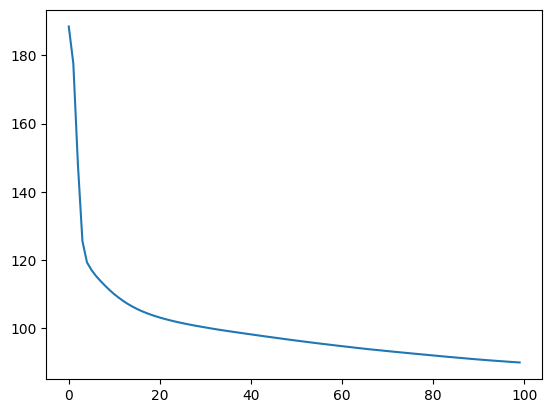

[  28.74   26.56   27.65   28.9  -268.24   31.63   26.73   21.85   88.38
  100.06    2.09  175.88    3.96    5.14    3.06] -> [10.856878] (expected [5.67])
[  31.08   22.51   26.8    32.44 -260.75   37.56   25.16   17.21   64.81
  100.22    5.43  148.88    2.3     6.22    0.79] -> [2.0590653] (expected [0.09])
[ 2.2620e+01  1.1160e+01  1.6900e+01  2.1340e+01 -2.6048e+02  2.9750e+01
  1.7080e+01  8.2400e+00  5.0310e+01  1.0115e+02  3.1200e+00  2.0119e+02
  1.3200e+00  3.3000e+00  1.8000e-01] -> [0.46604177] (expected [0.])
[  14.51    9.13   11.83   14.88 -259.16   22.1     8.11    7.14   73.06
  101.74    2.52  283.94    3.38    4.29    1.77] -> [-0.10361382] (expected [0.])
[  28.99   27.3    28.15   29.06 -268.24   31.85   26.94   22.95   90.81
   99.82    3.71  147.31    4.62    6.38    2.66] -> [11.95381] (expected [2.23])


In [18]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Read data
# data = fetch_california_housing()
# X, y = data.data, data.target

# train-test split for model evaluation
# X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
train_data = np.load('data/Dhaka/train.npy')
test_data = np.load('data/Dhaka/test.npy')

selected_idx = np.array(list(set(range(19)) - set(list(range(3))+[12])))
X_train_raw = train_data[:,selected_idx]
X_test_raw = test_data[:,selected_idx]
y_train = train_data[:,12]
y_test = test_data[:,12]


# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Define the model
model = nn.Sequential(
    nn.Linear(15, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

for epoch in range(n_epochs):
    print(epoch)
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

model.eval()
with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(5):
        X_sample = X_test_raw[i: i+1]
        X_sample = scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample)
        print(f"{X_test_raw[i]} -> {y_pred[0].numpy()} (expected {y_test[i].numpy()})")